In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$(document).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Содержание <a class="anchor" id="content"></a>

1. [Подготовка](#1.-Preparation)<br>
    1.1 [Установка и импорт зависимостей](#1.1-Installing-requirements)<br>
    1.2 [Объявление класса генератора данных](#1.2-Generator-define)<br>
2. [BQY (Brito-Quiroz-Yukich)](#2.-Brito-Quiroz-Yukich)<br>
    2.1 [Объявление класса модели предсказания размерности](#2.1-Estimator-define)<br>
    2.2 [Тестирование на синтетических данных](#2.2-Synthetic-testing)<br>
    &emsp;2.2.1 [9-мерное наблюдаемое пространство, 2-мерное истинное топологическое](#2.2.1-9d-2d)<br>
    &emsp;2.2.2 [18-мерное наблюдаемое пространство, 5-мерное истинное топологическое](#2.2.2-18d-5d)<br>
    &emsp;2.2.3 [27-мерное наблюдаемое пространство, 8-мерное истинное топологическое](#2.2.3-27d-8d)<br>
    &emsp;2.2.4 [Тестирование в динамике](#2.2.4-Dynamic-testing)<br>
    &emsp;&emsp;2.2.4.1 [Эксперимент №1](#2.2.4.1-Experiment-1)<br>
    &emsp;&emsp;2.2.4.2 [Эксперимент №2](#2.2.4.2-Experiment-2)<br>
    &emsp;2.2.5 ["Многоразмерный объект"](#2.2.5-Multidim-object)<br>
    &emsp;&emsp;2.2.5.1 ["Сфера с ручкой"](#2.2.5.1-Sphere-with-handle)<br>
    &emsp;&emsp;2.2.5.2 [Зашумлённая "Сфера с ручкой", std=0.001](#2.2.5.2-Sphere-with-handle-std-0.001)<br>
    &emsp;&emsp;2.2.5.3 [Зашумлённая "Сфера с ручкой", std=0.0025](#2.2.5.3-Sphere-with-handle-std-0.0025)<br>
    &emsp;&emsp;2.2.5.4 [Зашумлённая "Сфера с ручкой", std=0.005](#2.2.5.4-Sphere-with-handle-std-0.005)<br>
    &emsp;&emsp;2.2.5.5 [Зашумлённая "Сфера с ручкой", std=0.01](#2.2.5.5-Sphere-with-handle-std-0.01)<br>
    &emsp;&emsp;2.2.5.6 [Зашумлённая "Сфера с ручкой", std=0.025](#2.2.5.6-Sphere-with-handle-std-0.025)<br>
    &emsp;&emsp;2.2.5.7 [Зашумлённая "Сфера с ручкой", std=0.05](#2.2.5.7-Sphere-with-handle-std-0.05)<br>
    &emsp;&emsp;2.2.5.8 [Зашумлённая "Сфера с ручкой", std=0.1](#2.2.5.8-Sphere-with-handle-std-0.1)<br>
    &emsp;&emsp;2.2.5.9 [Зашумлённая "Сфера с ручкой", std=0.25](#2.2.5.9-Sphere-with-handle-std-0.25)<br>
    &emsp;&emsp;2.2.5.10 [Зашумлённая "Сфера с ручкой", std=0.5](#2.2.5.10-Sphere-with-handle-std-0.5)<br>
3. [Schweinhart](#3.-Schweinhart)<br>
    3.1 [Объявление класса модели предсказания размерности](#3.1-Define-estimator)<br>
    3.2 [Тестирование на синтетических данных](#3.2-Synthetic-testing)<br>
    &emsp;3.2.1 [Эксперимент с предсказанием размерности "единичной плоскости"](#3.2.1-square)<br>
    &emsp;&emsp;3.2.1.1 [Истинная топологическая размерность - 2, наблюдаемая размерность - 2](#3.2.1.1-2d-2d)<br>
    &emsp;&emsp;3.2.1.2 [Истинная топологическая размерность - 2, наблюдаемая размерность - 6](#3.2.1.2-2d-6d)<br>
    &emsp;3.2.2 [Эксперимент с предсказанием размерности единичного куба](#3.2.2-cube)<br>
    &emsp;&emsp;3.2.2.1 [Истинная топологическая размерность - 3, наблюдаемая размерность - 3](#3.2.2.1-3d-3d)<br>
    &emsp;&emsp;3.2.2.2 [Истинная топологическая размерность - 3, наблюдаемая размерность - 9](#3.2.2.2-3d-9d)<br>
    &emsp;3.2.3 [Эксперимент с предсказанием размерности единичной сферы](#3.2.3-sphere)<br>
    &emsp;&emsp;3.2.3.1 [Истинная топологическая размерность - 2, наблюдаемая размерность - 3](#3.2.3.1-2d-3d)<br>
    &emsp;&emsp;3.2.3.2 [Истинная топологическая размерность - 2, наблюдаемая размерность - 9](#3.2.3.2-2d-9d)<br>
    &emsp;&emsp;3.2.3.3 [Истинная топологическая размерность - 5, наблюдаемая размерность - 18](#3.2.3.3-5d-18d)<br>
    &emsp;&emsp;3.2.3.4 [Истинная топологическая размерность - 8, наблюдаемая размерность - 27](#3.2.3.4-8d-27d)<br>
    &emsp;3.2.4 [Эксперимент с предсказанием размерности параболоида](#3.2.4-paraboloid)<br>
    &emsp;&emsp;3.2.4.1 [Истинная топологическая размерность - 2, наблюдаемая размерность - 3](#3.2.4.1-2d-3d)<br>
    &emsp;&emsp;3.2.4.2 [Истинная топологическая размерность - 2, наблюдаемая размерность - 9](#3.2.4.2-2d-9d)<br>
    &emsp;&emsp;3.2.4.3 [Истинная топологическая размерность - 8, наблюдаемая размерность - 27](#3.2.4.3-8d-27d)<br>
    &emsp;3.2.5 [Эксперимент с предсказанием размерности множества Кантора](#3.2.5-Cantor-set)<br>
    &emsp;&emsp;3.2.5.1 [Истинная фрактальная размерность ~ 0.63, наблюдаемая размерность - 1](#3.2.5.1-0.63d-1d)<br>
    &emsp;3.2.6 [Эксперимент с предсказанием размерности треугольника Серпинского](#3.2.6-Sierpinsky-carpet)<br>
    &emsp;&emsp;3.2.6.1 [Истинная фрактальная размерность ~ 1.58, наблюдаемая размерность - 2](#3.2.6.1-1.58d-2d)<br>
    &emsp;3.2.7 [Эксперимент с предсказанием размерности ленты Мёбиуса](#3.2.7-Mobius)<br>
    &emsp;&emsp;3.2.7.1 [Истинная топологическая размерность - 2, наблюдаемая размерность - 3](#3.2.7.1-2d-3d)<br>
    &emsp;3.2.8 [Эксперимент с предсказанием размерности "Swiss-roll"](#3.2.8-Swiss-roll)<br>
    &emsp;&emsp;3.2.8.1 [Истинная топологическая размерность - 2, наблюдаемая размерность - 3](#3.2.8.1-2d-3d)<br>
    &emsp;3.2.9 [Тестирование в динамике](#3.2.9-Dynamic-testing)<br>
    &emsp;&emsp;3.2.9.1 [Эксперимент №1](#3.2.9.1-Experiment-1)<br>
    &emsp;&emsp;3.2.9.2 [Эксперимент №2](#3.2.9.2-Experiment-2)<br>
    &emsp;3.2.10 [Тест на устойчивость к шуму](#3.2.10-Noise-testing)<br>
    &emsp;&emsp;3.2.10.1 [Двумерное многообразие, std=0.001](#3.2.10.1-Swiss-roll-std-0.001)<br>
    &emsp;&emsp;3.2.10.2 [Двумерное многообразие, std=0.01](#3.2.10.2-Swiss-roll-std-0.01)<br>
    &emsp;&emsp;3.2.10.3 [Двумерное многообразие, std=0.1](#3.2.10.3-Swiss-roll-std-0.1)<br>
    &emsp;&emsp;3.2.10.4 [Двумерное многообразие, std=1](#3.2.10.4-Swiss-roll-std-1)<br>
    &emsp;&emsp;3.2.10.5 [Двумерное многообразие, зашумлённое пространство](#3.2.10.5-Swiss-roll-clean-noise)<br>
    &emsp;&emsp;3.2.10.6 [Фрактал, std=0.001](#3.2.10.6-Sierpinsky-std-0.001)<br>
    &emsp;&emsp;3.2.10.7 [Фрактал, std=0.01](#3.2.10.7-Sierpinsky-std-0.01)<br>
    &emsp;&emsp;3.2.10.8 [Фрактал, зашумлённое пространство](#3.2.10.8-Sierpinsky-clean-noise)<br>
4. [Размерность выборок SVD (2-8) биграмм русского языка](#4-SVD-Russian-uniform)<br>
    4.1 [Литературный датасет](#4.1-literature)<br>
    &emsp;4.1.1 [BQY, KNN](#4.1.1-BQY-KNN)<br>
    &emsp;4.1.2 [BQY, MST](#4.1.2-BQY-MST)<br>
    &emsp;&emsp;4.1.2.1 [Размер выборки для подсчёта статистики - 1000](#4.1.2.1-1000)<br>
    &emsp;&emsp;4.1.2.2 [Размер выборки для подсчёта статистики - 10000](#4.1.2.2-10000)<br>
    &emsp;&emsp;4.1.2.3 [Размер выборки для подсчёта статистики - 100000](#4.1.2.3-100000)<br>
    &emsp;&emsp;4.1.2.4 [Размер выборки для подсчёта статистики - 1000000](#4.1.2.4-1000000)<br>
    &emsp;4.1.3 [BQY, SOI](#4.1.3-BQY-SOI)<br>
    &emsp;4.1.4 [Schweinhart](#4.1.4-Schweinhart)<br>
    4.2 [Датасет с большим количеством лирики](#4.2-lyrics)<br>
    &emsp;4.2.1 [BQY, KNN](#4.2.1-BQY-KNN)<br>
    &emsp;4.2.2 [BQY, MST](#4.2.2-BQY-MST)<br>
    &emsp;&emsp;4.2.2.1 [Размер выборки для подсчёта статистики - 1000](#4.2.2.1-1000)<br>
    &emsp;&emsp;4.2.2.2 [Размер выборки для подсчёта статистики - 10000](#4.2.2.2-10000)<br>
    &emsp;&emsp;4.2.2.3 [Размер выборки для подсчёта статистики - 100000](#4.2.2.3-100000)<br>
    &emsp;&emsp;4.2.2.4 [Размер выборки для подсчёта статистики - 1000000](#4.2.2.4-1000000)<br>
    &emsp;4.2.3 [BQY, SOI](#4.2.3-BQY-SOI)<br>
    &emsp;4.2.4 [Schweinhart](#4.2.4-Schweinhart)<br>

# [▲](#content) 1. Подготовка <a class="anchor" id="1.-Preparation"></a>

## [▲](#content) 1.1 Установка и импорт зависимостей: <a class="anchor" id="1.1-Installing-requirements"></a>

In [5]:
pip install -U kaleido

     ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/65.9 MB 1.3 MB/s eta 0:00:52
     ---------------------------------------- 0.1/65.9 MB 1.7 MB/s eta 0:00:39
     ---------------------------------------- 0.4/65.9 MB 3.2 MB/s eta 0:00:21
      --------------------------------------- 1.0/65.9 MB 5.7 MB/s eta 0:00:12
     - -------------------------------------- 2.0/65.9 MB 9.0 MB/s eta 0:00:08
     -- ------------------------------------- 4.4/65.9 MB 16.7 MB/s eta 0:00:04
     ---- ----------------------------------- 7.6/65.9 MB 23.3 MB/s eta 0:00:03
     ----- ---------------------------------- 8.8/65.9 MB 26.8 MB/s eta 0:00:03
     --------- ----------------------------- 15.8/65.9 MB 81.8 MB/s eta 0:00:01
     ------------ ------------------------- 20.9/65.9 MB 222.4 MB/s eta 0:00:01
     ------------- ------------------------ 22.7/65.9 MB 131.2 MB/s eta 0:00:01
     ------------- ------------------------ 22.7/65.9

In [2]:
!pip install --upgrade git+https://github.com/whiteroomlz/mst-clustering.git

  Running command git clone --filter=blob:none --quiet https://github.com/whiteroomlz/mst-clustering.git 'C:\Users\User\AppData\Local\Temp\pip-req-build-vqspp9p1'



  Cloning https://github.com/whiteroomlz/mst-clustering.git to c:\users\user\appdata\local\temp\pip-req-build-vqspp9p1
  Resolved https://github.com/whiteroomlz/mst-clustering.git to commit 1e4e5ba3606338db8b1b03b3edb10dc0c2582390
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached wincertstore-0.2-py2.py3-none-any.whl (8.8 kB)
  Obtaining dependency information for pybind11 from https://files.pythonhosted.org/packages/06/55/9f73c32dda93fa4f539fafa268f9504e83c489f460c380371d94296126cd/pybind11-2.11.1-py3-none-any.whl.metadata
  Using cached pybind11-2.11.1-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for mst-clustering: filename=mst_clus

In [7]:
import numpy as np
import warnings

np.warnings = warnings

In [8]:
import re
import math
import scipy
import sklearn
import pandas as pd
import seaborn as sns
import multiprocessing
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from mst_clustering.cpp_adapters import MstBuilder, SpanningForest, DistanceMeasure
from mst_clustering.clustering_models import ZahnModel
from matplotlib.animation import FuncAnimation
from sklearn.neighbors import kneighbors_graph
from mst_clustering.pipeline import Pipeline
from scipy.sparse.csgraph import dijkstra
from plotly.subplots import make_subplots
from IPython.display import clear_output
from IPython.display import HTML
from mpl_toolkits import mplot3d
from scipy.spatial import KDTree
from scipy.special import comb
from itertools import repeat
from sklearn import datasets
from IPython import display
from pathlib import Path
from scipy import stats
from tqdm import tqdm
from enum import Enum


sns.set_style('whitegrid')

multiprocessing.freeze_support()

%matplotlib inline

## [▲](#content) 1.2 Объявление класса генератора данных <a class="anchor" id="1.2-Generator-define"></a>

In [9]:
class SampleDataGenerator(object):
    __add_n_dims: int
    __add_sin: bool
    __add_quad: bool
    
    def __init__(self, add_n_dims=None, add_sin=False, add_quad=False):
        self.__add_n_dims = add_n_dims
        self.__add_sin = add_sin
        self.__add_quad = add_quad
    
    def __increasing_dim_decorator(func):
        def _wrapper(self, *args, **kwargs):
            x = func(*args, **kwargs)
            
            output = x.copy()
            
            if self.__add_n_dims is None:
                if self.__add_sin:
                    x_sin = np.sin(x)
                    output = np.hstack((output, x_sin))
                    
                if self.__add_quad:
                    x_quad = x ** 2
                    output = np.hstack((output, x_quad))
            else:
                for additional_dim_index in range(self.__add_n_dims):
                    random_column = np.random.randint(x.shape[1], size=1)
                    additional_dim = (x[:, random_column] ** (additional_dim_index + 2))
                    output = np.hstack((output, additional_dim))
                
            return output
        return _wrapper
    
    @__increasing_dim_decorator
    @staticmethod
    def unit_cube(size, intrinsic_dimension=3):
        x = np.random.uniform(size=(size, intrinsic_dimension)) * 2
    
        return x
        
    @__increasing_dim_decorator
    @staticmethod
    def mobius(size):
        u = np.random.uniform(-0.5, 0.5, size)
        v = np.random.uniform(0, 2 * np.pi, size)
    
        x1 = (1 + u * np.cos(5 * v)) * np.cos(v)
        x2 = (1 + u * np.cos(5 * v)) * np.sin(v)
        x3 = u * np.sin(5 * v)
    
        x = np.hstack((x1[:, np.newaxis], x2[:, np.newaxis], x3[:, np.newaxis]))
    
        return x

    @__increasing_dim_decorator
    @staticmethod
    def swiss_roll(size):
        x = sklearn.datasets.make_swiss_roll(size)[0]
    
        return x
    
    @__increasing_dim_decorator
    @staticmethod
    def unit_sphere(size, intrinsic_dimension=2):
        x = np.zeros((size, intrinsic_dimension + 1))
    
        radius = 1
    
        x[:, 0] = np.random.uniform(-radius, radius, size)
        for dim_index in np.arange(1, intrinsic_dimension):
            upper_bound = np.sqrt(radius ** 2 - np.sum(x[:, :dim_index] ** 2, axis=1))
            x[:, dim_index] = np.random.uniform(-upper_bound, upper_bound, size)
        x[:, -1] = ((-1) ** np.random.randint(2, size=size)) * np.sqrt(radius ** 2 - np.sum(x[:, :-1] ** 2, axis=1))
    
        for point_index in np.arange(size):
            np.random.shuffle(x[point_index, :])
    
        return x
    
    @__increasing_dim_decorator
    @staticmethod
    def diff_density_unit_sphere(size, intrinsic_dimension=2):
        x = np.zeros((size, intrinsic_dimension + 1))
    
        radius = 1
        
        x[:, 0] = ((-1) ** np.random.randint(2, size=size)) * (-1 * stats.halfnorm(
            loc=-radius, scale=(radius / 3)).rvs(size=size))
        
        for dim_index in np.arange(1, intrinsic_dimension):
            upper_bound = np.sqrt(radius ** 2 - np.sum(x[:, :dim_index] ** 2, axis=1))
            x[:, dim_index] = np.random.uniform(-upper_bound, upper_bound, size)
        x[:, -1] = ((-1) ** np.random.randint(2, size=size)) * np.sqrt(radius ** 2 - np.sum(x[:, :-1] ** 2, axis=1))
        
        for point_index in np.arange(size):
            np.random.shuffle(x[point_index, 1:])
    
        return x
    
    @__increasing_dim_decorator
    @staticmethod
    def paraboloid(size, intrinsic_dimension=2):
        exp_variables = stats.expon(1).rvs(size=(size, intrinsic_dimension + 1))
    
        x_without_last = (1 + exp_variables[:, 1:] / exp_variables[:, 0][:, np.newaxis]) ** -1
        x_last = np.sum(x_without_last ** 2, axis=1)
        x = np.hstack((x_without_last, x_last[:, np.newaxis]))
    
        return x
    
    @__increasing_dim_decorator
    @staticmethod
    def cantor_set(size):
        current = np.array([[0, 1]])
        while np.abs(current[0][0] - current[0][1]) > 1e-8:
            current = np.vstack((
                np.hstack((
                    current[:, 0][:, np.newaxis], 
                    (current[:, 0] + (current[:, 1] - current[:, 0]) / 3)[:, np.newaxis]
                )), 
                np.hstack((
                    (current[:, 0] + 2 * (current[:, 1] - current[:, 0]) / 3)[:, np.newaxis],
                    current[:, 1][:, np.newaxis]
                ))
            ))
        full_set = current[:, 0].ravel()
        
        x = np.random.choice(full_set, size=size, replace=True)
        
        return x
    
    @__increasing_dim_decorator
    @staticmethod
    def sierpinski_triangle(size):
        attr_1 = np.array([0, 0])
        attr_2 = np.array([0.5, np.sqrt(0.75)])
        attr_3 = np.array([1, 0])
        
        x = np.zeros((size, 2))
        
        x[0] = attr_1
        for index in np.arange(1, size):
            random_sample = np.random.uniform()
            active_attractor = attr_1 if random_sample < 1 / 3 else (attr_3 if random_sample > 2 / 3 else attr_2)
            x[index] = (x[index - 1] + active_attractor) / 2
            
        return x
    
    @__increasing_dim_decorator
    @staticmethod
    def menger_sponge(size):
        attractors = [
            np.array([0, 0, 0]),        
            np.array([1, 0, 0]),        
            np.array([0, 1, 0]),
            np.array([0, 0, 1]),        
            np.array([1, 1, 0]),        
            np.array([0, 1, 1]),        
            np.array([1, 0, 1]),
            np.array([1, 1, 1]), 
            #
            np.array([0.5, 0, 0]), # 1
            # 1 0 0
            # 0 0 0
            np.array([0, 0.5, 0]), # 2
            # 0 1 0
            # 0 0 0
            np.array([0, 0, 0.5]), # 3 
            # 0 0 1
            # 0 0 0
            np.array([1, 1, 0.5]), # 4
            # 1 1 1
            # 1 1 0
            np.array([1, 0.5, 1]), # 5
            # 1 1 1
            # 1 0 1
            np.array([0.5, 1, 1]), # 6
            # 1 1 1
            # 0 1 1
            np.array([1, 0, 0.5]), # 7
            # 1 0 1
            # 1 0 0
            np.array([1, 0.5, 0]), # 8
            # 1 1 0
            # 1 0 0
            np.array([0, 1, 0.5]), # 9 
            # 0 1 1
            # 0 1 0
            np.array([0.5, 1, 0]), # 10
            # 0 1 0
            # 1 1 0
            np.array([0, 0.5, 1]), # 11
            # 0 1 1
            # 0 0 1
            np.array([0.5, 0, 1]), # 12
            # 1 0 1
            # 0 0 1
        ]
        
        dataset = np.zeros((int(1e+5), 3))
        dataset[0] = attractors[0]
        for index in np.arange(1, dataset.shape[0]):
            random_sample = np.random.randint(0, 20)
            dataset[index] = (dataset[index - 1] + 2 * attractors[random_sample]) / 3
        indices = np.random.choice(np.arange(10000, dataset.shape[0]), size=size, replace=False)
        x = dataset[indices]
        
        return x

In [ ]:
size = 1000
generator = SampleDataGenerator()
labels = [
    f'mobius',
    f'swiss roll',
    f'unit cube',
    f'paraboloid',
    f'unit sphere',
    f'diff. density unit sphere',
    f'menger sponge',
    f'sierpinski triangle',
    f'log-normal wavelet cascade',
]
datasets = [
    generator.mobius(size),
    generator.swiss_roll(size),
    generator.unit_cube(size),
    generator.paraboloid(size),
    generator.unit_sphere(size),
    generator.diff_density_unit_sphere(size),
    generator.menger_sponge(size),
    generator.sierpinski_triangle(size),
    data.T,
]

fig = make_subplots(
    rows=3, cols=3,
    specs=[
        [{'type': 'scene'}, {'type': 'scene'}, {'type': 'scene'}],
        [{'type': 'scene'}, {'type': 'scene'}, {'type': 'scene'}],
        [{'type': 'scene'}, {'type': 'xy'}, {'type': 'xy'}],
    ],
    horizontal_spacing=0.02,
    vertical_spacing=0.02
)
for index, (label, dataset) in enumerate(zip(labels, datasets)):
    row = index // 3 + 1
    col = index % 3 + 1
    
    if len(dataset.shape) == 1:
        fig.add_trace(go.Scatter(
            x=dataset, 
            y=np.zeros(dataset.size), 
            name=label,
            mode ='markers',
            marker=dict(size=1),
        ), row=row, col=col)
        
    elif dataset.shape[1] == 2:
        fig.add_trace(go.Scatter(
            x=dataset[:, 0], 
            y=dataset[:, 1], 
            name=label,
            mode ='markers',
            marker=dict(size=1),
        ), row=row, col=col)
        
    else:
        fig.add_trace(go.Scatter3d(
            x=dataset[:, 0], 
            y=dataset[:, 1], 
            z=dataset[:, 2],
            name=label,
            mode ='markers',
            marker=dict(size=1),
        ), row=row, col=col)

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0), 
    width=800,
    height=800,
    showlegend=False,
)
for key in ['scene', 'scene2', 'scene3', 'scene4', 'scene5', 'scene6', 'scene7']:
    fig['layout'][key].camera = {
        'up': dict(x=0, y=0, z=1),
        'center': dict(x=0, y=0, z=0),
        'eye': dict(x=0., y=2, z=0.1)
    }
fig

# [▲](#content) 2. BQY (Brito-Quiroz-Yukich) <a class="anchor" id="2.-Brito-Quiroz-Yukich"></a>

## [▲](#content) 2.1 Объявление класса модели предсказания размерности: <a class="anchor" id="2.1-Estimator-define"></a>

In [93]:
class BqyIntrinsicDimensionEstimator(object):
    candidate_dimensions: np.ndarray
    sample_size: int
    samples_count: int
    workers_count: int
    batch_weight_in_gb: float
    
    knn_candidate_dim_means: np.ndarray
    knn_candidate_dim_vars: np.ndarray
    
    mst_candidate_dim_means: np.ndarray
    mst_candidate_dim_vars: np.ndarray
    
    soi_candidate_dim_means: np.ndarray
    soi_candidate_dim_vars: np.ndarray
    
    class StatType(Enum):
        KNN = 0
        MST = 1
        SOI = 2
    
    def __init__(self, 
                 candidate_dimensions, 
                 sample_size=1000, 
                 samples_count=100, 
                 workers_count=1,
                 batch_weight_in_gb=1.0,
                 knn_k_neighbours=1, knn_path_limit=1,
                 knn_candidate_dim_means=None, knn_candidate_dim_vars=None,
                 mst_candidate_dim_means=None, mst_candidate_dim_vars=None,
                 soi_k_neighbours=1,
                 soi_candidate_dim_means=None, soi_candidate_dim_vars=None,
                 stat_types=[StatType.MST]):
        
        self.candidate_dimensions = candidate_dimensions
        self.sample_size = sample_size
        self.samples_count = samples_count
        self.workers_count = workers_count
        self.batch_weight_in_gb = batch_weight_in_gb
        self.knn_k_neighbours = knn_k_neighbours
        self.knn_path_limit = knn_path_limit
        self.soi_k_neighbours = soi_k_neighbours
        
        if self.StatType.KNN in stat_types:
            if not (knn_candidate_dim_means is None or knn_candidate_dim_vars is None):
                self.knn_candidate_dim_means = knn_candidate_dim_means
                self.knn_candidate_dim_vars = knn_candidate_dim_vars
            else:
                self.init_knn_stat(knn_k_neighbours, knn_path_limit)
        
        if self.StatType.MST in stat_types:
            if not (mst_candidate_dim_means is None or mst_candidate_dim_vars is None):
                self.mst_candidate_dim_means = mst_candidate_dim_means
                self.mst_candidate_dim_vars = mst_candidate_dim_vars
            else:
                self.init_mst_stat()
                
        if self.StatType.SOI in stat_types:
            if not (soi_candidate_dim_means is None or soi_candidate_dim_vars is None):
                self.soi_candidate_dim_means = soi_candidate_dim_means
                self.soi_candidate_dim_vars = soi_candidate_dim_vars
            else:
                self.init_soi_stat(soi_k_neighbours)
    
    def init_knn_stat(self, knn_k_neighbours, knn_path_limit):
        self.knn_candidate_dim_means = np.zeros(self.candidate_dimensions.size)
        self.knn_candidate_dim_vars = np.zeros(self.candidate_dimensions.size)
        
        for candidate_dim_index, candidate_dimension in tqdm(
            enumerate(self.candidate_dimensions), 
            total=len(self.candidate_dimensions), 
            desc="Computing KNN candidate-dimension statistics..."):
            
            knn_candidate_dim_stats = np.zeros(self.samples_count)
            
            for sample_index in np.arange(self.samples_count):
                sample = np.random.uniform(size=(self.sample_size, candidate_dimension))
                knn_graph = kneighbors_graph(
                    sample, knn_k_neighbours, n_jobs=self.workers_count, mode='connectivity', include_self=False
                )
                knn_candidate_dim_stat = self.compute_knn_stat(knn_graph, knn_path_limit, self.batch_weight_in_gb)
                knn_candidate_dim_stats[sample_index] = knn_candidate_dim_stat
            
            self.knn_candidate_dim_means[candidate_dim_index] = np.mean(knn_candidate_dim_stats)
            self.knn_candidate_dim_vars[candidate_dim_index] = np.var(knn_candidate_dim_stats) * self.sample_size
            
    def init_mst_stat(self):
        self.mst_candidate_dim_means = np.zeros(self.candidate_dimensions.size)
        self.mst_candidate_dim_vars = np.zeros(self.candidate_dimensions.size)
        
        for candidate_dim_index, candidate_dimension in tqdm(
            enumerate(self.candidate_dimensions), 
            total=len(self.candidate_dimensions), 
            desc="Computing MST candidate-dimension statistics..."):
            
            mst_candidate_dim_stats = np.zeros(self.samples_count)
        
            for sample_index in np.arange(self.samples_count):
                sample = np.random.uniform(size=(self.sample_size, candidate_dimension))
                mst = MstBuilder(sample.tolist()).build(
                    workers_count=self.workers_count, 
                    distance_measure=DistanceMeasure.EUCLIDEAN
                )
                mst_candidate_dim_stat = self.compute_mst_stat(mst)[0]
                mst_candidate_dim_stats[sample_index] = mst_candidate_dim_stat
                
            self.mst_candidate_dim_means[candidate_dim_index] = np.mean(mst_candidate_dim_stats)
            self.mst_candidate_dim_vars[candidate_dim_index] = np.var(mst_candidate_dim_stats) * self.sample_size
            
    def init_soi_stat(self, soi_k_neighbours):
        self.soi_candidate_dim_means = np.zeros(self.candidate_dimensions.size)
        self.soi_candidate_dim_vars = np.zeros(self.candidate_dimensions.size)
        
        for candidate_dim_index, candidate_dimension in tqdm(
            enumerate(self.candidate_dimensions), 
            total=len(self.candidate_dimensions), 
            desc="Computing SOI candidate-dimension statistics..."):
            
            soi_candidate_dim_stats = np.zeros(self.samples_count)
            
            for sample_index in np.arange(self.samples_count):
                sample = np.random.uniform(size=(self.sample_size, candidate_dimension))
                knn_graph = kneighbors_graph(
                    sample, soi_k_neighbours, n_jobs=self.workers_count, mode='connectivity', include_self=False
                )
                soi_candidate_dim_stat = self.compute_soi_stat(knn_graph)
                soi_candidate_dim_stats[sample_index] = soi_candidate_dim_stat
            
            self.soi_candidate_dim_means[candidate_dim_index] = np.mean(soi_candidate_dim_stats)
            self.soi_candidate_dim_vars[candidate_dim_index] = np.var(soi_candidate_dim_stats) * self.sample_size
            
    def compute_probabilities(self, stat, sample_size, stat_type):
        if stat_type is self.StatType.KNN:
            candidate_dim_means, candidate_dim_vars = self.knn_candidate_dim_means, self.knn_candidate_dim_vars
        elif stat_type is self.StatType.MST:
            candidate_dim_means, candidate_dim_vars = self.mst_candidate_dim_means, self.mst_candidate_dim_vars
        elif stat_type is self.StatType.SOI: 
            candidate_dim_means, candidate_dim_vars = self.soi_candidate_dim_means, self.soi_candidate_dim_vars
            
        probabilities = np.fromiter(map(
            lambda mean_var: stats.norm(loc=mean_var[0], scale=np.sqrt(mean_var[1] / sample_size)).pdf(stat), 
            zip(candidate_dim_means, candidate_dim_vars)
        ), dtype=np.float64)
        
        error_message = "The variances are too small."
        assert not np.sum(probabilities) == 0, error_message
        
        return probabilities
    
    def estimate_by_knn(self, knn_graph: scipy.sparse._csr.csr_matrix, round_result=True):
        vertex_count = knn_graph.shape[0]
        knn_stat = self.compute_knn_stat(knn_graph, self.knn_path_limit, self.workers_count)
        
        return self.estimate_by_stat(knn_stat, vertex_count, self.StatType.KNN,round_result)
    
    def estimate_by_mst(self, mst, round_result=True):
        mst_stat, vertex_count = self.compute_mst_stat(mst)
        
        return self.estimate_by_stat(mst_stat, vertex_count, self.StatType.MST, round_result)
    
    def estimate_by_soi(self, knn_graph: scipy.sparse._csr.csr_matrix, round_result=True):
        vertex_count = knn_graph.shape[0]
        soi_stat = self.compute_soi_stat(knn_graph)
        
        return self.estimate_by_stat(soi_stat, vertex_count, self.StatType.SOI, round_result)
    
    def estimate_by_stat(self, stat, vertex_count, stat_type, round_result=True):
        probabilities = self.compute_probabilities(stat, vertex_count, stat_type)
        
        return self.estimate(probabilities, round_result)
    
    def estimate(self, probabilities, round_result=True):
        mathematical_expectation = np.sum(self.candidate_dimensions * probabilities) / np.sum(probabilities)
        intrinsic_dimension = np.round(mathematical_expectation) if round_result else mathematical_expectation
        
        return intrinsic_dimension
    
    @staticmethod
    def compute_knn_stat(knn_graph: scipy.sparse._csr.csr_matrix, path_limit, batch_weight_in_gb=1.0) -> float:
        batch_size = batch_weight_in_gb * (1024 ** 3) // 8
        batches_count = knn_graph.shape[0] // (batch_size // knn_graph.shape[0])
        if batches_count == 0:
            batches_count = 1
    
        all_indices = np.arange(knn_graph.shape[0])

        knn_counts = np.zeros(knn_graph.shape[0])
        for batch_indices in np.array_split(all_indices, batches_count):
            distances = dijkstra(knn_graph, directed=False, limit=path_limit, indices=batch_indices)
            knn_counts[batch_indices] = np.sum(distances != np.inf, axis=1)

        knn_stat = np.mean(knn_counts)
        
        return knn_stat
        
    @staticmethod
    def compute_mst_stat(mst: SpanningForest) -> float:
        assert mst.is_spanning_tree, "Spanning forest contains multiple connectivity components."
    
        edges = np.array(mst.get_edges(*mst.get_roots()))
        extract_nodes = np.vectorize(lambda edge: (edge.first_node, edge.second_node))
        nodes = np.array(extract_nodes(edges))
        
        vertex_count = edges.size + 1
        vertex_degrees = np.unique(nodes, return_counts=True)[1]
    
        mst_stat = np.sum(vertex_degrees ** 2) / vertex_count
    
        return mst_stat, vertex_count
    
    @staticmethod
    def compute_soi_stat(knn_graph: scipy.sparse._csr.csr_matrix) -> float:
        cardinalities = knn_graph.sum(axis=0)
        soi_stat = np.sum(comb(cardinalities, 2)) / knn_graph.shape[0]
        
        return soi_stat

## [▲](#content) 2.2 Тестирование на синтетических данных <a class="anchor" id="2.2-Synthetic-testing"></a>

In [7]:
gen = SampleDataGenerator(add_sin=True, add_quad=True)

In [52]:
def fold_estimate(estimator, gen_funcs, size, stat_type):
    datasets = [gen_func(size) for gen_func in gen_funcs]
    
    estimated = np.zeros(len(datasets))
    for index, dataset in enumerate(datasets):
        try:
            if stat_type is BqyIntrinsicDimensionEstimator.StatType.KNN:
                knn_graph = kneighbors_graph(dataset, 4, n_jobs=6, mode='connectivity', include_self=False)
                estimated[index] = estimator.estimate_by_knn(knn_graph, round_result=False)
                
            elif stat_type is BqyIntrinsicDimensionEstimator.StatType.MST:
                mst = MstBuilder(dataset.tolist()).build(
                    workers_count=6, 
                    distance_measure=DistanceMeasure.EUCLIDEAN
                )
                estimated[index] = estimator.estimate_by_mst(mst, round_result=False)
                
            elif stat_type is BqyIntrinsicDimensionEstimator.StatType.SOI:
                knn_graph = kneighbors_graph(dataset, 1, n_jobs=6, mode='connectivity', include_self=False)
                estimated[index] = estimator.estimate_by_soi(knn_graph, round_result=False)
                
        except AssertionError as error:
            estimated[index] = np.nan
            
    return estimated

In [9]:
def test_and_draw(estimator, gen_funcs, labels, sizes, n_iters, stat_type, title):
    fig = plt.figure(figsize=(12, 8))
    
    desc = "Folds testing..."
    test_results = [list(zip(*[fold_estimate(estimator, gen_funcs, size, stat_type) for size in sizes])) \
                    for _ in tqdm(np.arange(n_iters), desc=desc)]
    
    mean_test_results = np.nanmean(np.array(test_results), axis=0)

    for test_result, label in zip(mean_test_results, labels):
        plt.plot(sizes, test_result, label=label)
    
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlabel("dataset size", fontsize=14)
    plt.ylabel("estimated intrinsic dimension", fontsize=14)
    plt.title(title, fontsize=16)

    plt.show()

In [10]:
knn_candidate_dim_means = np.load('saves/knn-estimator-means-10000-2-17.npy')
knn_candidate_dim_vars = np.load('saves/knn-estimator-vars-10000-2-17.npy')
mst_candidate_dim_means = np.load('saves/mst-estimator-means-10000-2-17.npy')
mst_candidate_dim_vars = np.load('saves/mst-estimator-vars-10000-2-17.npy')
soi_candidate_dim_means = np.load('saves/soi-estimator-means-10000-2-17.npy')
soi_candidate_dim_vars = np.load('saves/soi-estimator-vars-10000-2-17.npy')

### [▲](#content) 2.2.1 9-мерное наблюдаемое пространство, 2-мерное истинное топологическое <a class="anchor" id="2.2.1-9d-2d"></a>

In [21]:
estimator = BqyIntrinsicDimensionEstimator(
    np.arange(2, 10), 
    samples_count=100, 
    sample_size=10000,
    workers_count=6, 
    batch_weight_in_gb=5,
    knn_k_neighbours=4, knn_path_limit=2,
    soi_k_neighbours=1,
    knn_candidate_dim_means=knn_candidate_dim_means[:8], knn_candidate_dim_vars=knn_candidate_dim_vars[:8],
    mst_candidate_dim_means=mst_candidate_dim_means[:8], mst_candidate_dim_vars=mst_candidate_dim_vars[:8],
    soi_candidate_dim_means=soi_candidate_dim_means[:8], soi_candidate_dim_vars=soi_candidate_dim_vars[:8],
    stat_types=[
        BqyIntrinsicDimensionEstimator.StatType.KNN, 
        BqyIntrinsicDimensionEstimator.StatType.MST,
        BqyIntrinsicDimensionEstimator.StatType.SOI
    ]
)

In [22]:
gen_funcs = [gen.mobius, gen.swiss_roll, gen.unit_sphere, gen.diff_density_unit_sphere, gen.paraboloid]
labels = ["mobius", "swiss roll", "unit sphere", "diff. density unit sphere", "paraboloid"]
sizes = np.round(np.linspace(1000, 10000, 10)).astype(np.int64)
n_iters = 100

In [ ]:
test_and_draw(estimator, gen_funcs, labels, sizes, n_iters, estimator.StatType.KNN, 
              "KNN, 2D intrinsic in 9D observable")

In [ ]:
test_and_draw(estimator, gen_funcs, labels, sizes, n_iters, estimator.StatType.MST, 
              "MST, 2D intrinsic in 9D observable")

In [ ]:
test_and_draw(estimator, gen_funcs, labels, sizes, n_iters, estimator.StatType.SOI, 
              "SOI, 2D intrinsic in 9D observable")

### [▲](#content) 2.2.2 18-мерное наблюдаемое пространство, 5-мерное истинное топологическое <a class="anchor" id="2.2.2-18d-5d"></a>

In [11]:
estimator = BqyIntrinsicDimensionEstimator(
    np.arange(2, 17), 
    samples_count=100, 
    sample_size=10000,
    workers_count=6, 
    batch_weight_in_gb=5,
    knn_k_neighbours=4, knn_path_limit=2,
    soi_k_neighbours=1,
    knn_candidate_dim_means=knn_candidate_dim_means, knn_candidate_dim_vars=knn_candidate_dim_vars,
    mst_candidate_dim_means=mst_candidate_dim_means, mst_candidate_dim_vars=mst_candidate_dim_vars,
    soi_candidate_dim_means=soi_candidate_dim_means, soi_candidate_dim_vars=soi_candidate_dim_vars,
    stat_types=[
        BqyIntrinsicDimensionEstimator.StatType.KNN, 
        BqyIntrinsicDimensionEstimator.StatType.MST,
        BqyIntrinsicDimensionEstimator.StatType.SOI
    ]
)

In [13]:
gen_funcs = [
    lambda size: gen.unit_sphere(size, 5), 
    lambda size: gen.diff_density_unit_sphere(size, 5), 
    lambda size: gen.paraboloid(size, 5)
]
labels = ["unit sphere", "diff. density unit sphere", "paraboloid"]
sizes = np.round(np.linspace(1000, 50000, 25)).astype(np.int64)
n_iters = 25

In [ ]:
test_and_draw(estimator, gen_funcs, labels, sizes, n_iters, estimator.StatType.KNN, 
              "KNN, 5D intrinsic in 18D observable")

In [ ]:
test_and_draw(estimator, gen_funcs, labels, sizes, n_iters, estimator.StatType.MST, 
              "MST, 5D intrinsic in 18D observable")

In [ ]:
test_and_draw(estimator, gen_funcs, labels, sizes, n_iters, estimator.StatType.SOI, 
              "SOI, 5D intrinsic in 18D observable")

### [▲](#content) 2.2.3 27-мерное наблюдаемое пространство, 8-мерное истинное топологическое <a class="anchor" id="2.2.3-27d-8d"></a>

In [12]:
gen_funcs = [
    lambda size: gen.unit_sphere(size, 8), 
    lambda size: gen.diff_density_unit_sphere(size, 8), 
    lambda size: gen.paraboloid(size, 8)
]
labels = ["unit sphere", "diff. density unit sphere", "paraboloid"]
sizes = np.round(np.linspace(1000, 100000, 25)).astype(np.int64)
n_iters = 10

In [ ]:
test_and_draw(estimator, gen_funcs, labels, sizes, n_iters, estimator.StatType.KNN, 
              "KNN, 8D intrinsic in 27D observable")

In [ ]:
test_and_draw(estimator, gen_funcs, labels, sizes, n_iters, estimator.StatType.MST, 
              "MST, 8D intrinsic in 27D observable")

In [ ]:
test_and_draw(estimator, gen_funcs, labels, sizes, n_iters, estimator.StatType.SOI, 
              "SOI, 8D intrinsic in 27D observable")

### [▲](#content) 2.2.4 Тестирование в динамике <a class="anchor" id="2.2.4-Dynamic-testing"></a>

Имеется проблема завышенным прогнозом для больших размерностей. Эксперименты ниже должны подсказать решение этих проблем.

#### [▲](#content) 2.2.4.1 Эксперимент №1 <a class="anchor" id="2.2.4.1-Experiment-1"></a>

Многообразие с одной и той же внутренней размерностью помещается в пространства с различной размерностью. Результаты указывают на тенденцию к решению проблемы завышенного прогноза при расширении содержащего пространства.

In [12]:
sizes = np.round(np.linspace(1000, 10000, 25)).astype(np.int64)
intrinsic_dimension = 8
container_dimensions = np.arange(intrinsic_dimension, 27)
n_iters = 20

In [13]:
def draw_dymanic_test1(estimator, n_iters, sizes, stat_type, container_dimensions, intrinsic_dimension, title):
    estimated = np.zeros((n_iters, container_dimensions.size, sizes.size))

    for iteration in tqdm(np.arange(n_iters)):
        for row, container_dimension in enumerate(container_dimensions):
            for col, size in enumerate(sizes):
                dataset = SampleDataGenerator(container_dimension - intrinsic_dimension).unit_sphere(
                    size, intrinsic_dimension)
        
                try:
                    if stat_type is BqyIntrinsicDimensionEstimator.StatType.KNN:
                        knn_graph = kneighbors_graph(dataset, 4, n_jobs=6, mode='connectivity', include_self=False)
                        estimated[iteration, row, col] = estimator.estimate_by_knn(knn_graph, round_result=False)
                
                    elif stat_type is BqyIntrinsicDimensionEstimator.StatType.MST:
                        mst = MstBuilder(dataset.tolist()).build(
                            workers_count=6, 
                            distance_measure=DistanceMeasure.EUCLIDEAN
                        )
                        estimated[iteration, row, col] = estimator.estimate_by_mst(mst, round_result=False)
                
                    elif stat_type is BqyIntrinsicDimensionEstimator.StatType.SOI:
                        knn_graph = kneighbors_graph(dataset, 1, n_jobs=6, mode='connectivity', include_self=False)
                        estimated[iteration, row, col] = estimator.estimate_by_soi(knn_graph, round_result=False)
                
                except AssertionError as error:
                    estimated[iteration, row, col] = np.nan
                    
    mean_estimated = np.nanmean(np.array(estimated), axis=0)
                
    figure = plt.figure(figsize=(12, 8))
    plot = plt.plot([])[0]

    plt.xlim(0.9 * sizes.min(), sizes.max() + 0.1 * sizes.min()) 
    plt.ylim(0.9 * np.nanmin(mean_estimated), np.nanmax(mean_estimated) + 0.1 * np.nanmin(mean_estimated)) 
                
    plt.xlabel('dataset size', fontsize=14)
    plt.ylabel('estimated intrinsic dimension', fontsize=14)
    plt.title(title, fontsize=16)

    animation_function = lambda frame: plot.set_data((sizes, mean_estimated[frame]))
    animation = FuncAnimation(figure, animation_function, frames=mean_estimated.shape[0]).to_jshtml()
    clear_output()

    return mean_estimated, animation

In [147]:
mean_estimated, animation = draw_dymanic_test1(
    estimator, n_iters, sizes, estimator.StatType.KNN, container_dimensions, 
    intrinsic_dimension, 'BQY, KNN - fixed intrinsic=8, dynamic container=[8; 27]')

with open(f'saves/knn-dynamic-test.jshtml', 'w', encoding='utf-8') as stream_writer:
    stream_writer.write(animation)

In [ ]:
%matplotlib notebook

with open(f'saves/knn-dynamic-test.jshtml', 'r', encoding='utf-8') as stream_reader:
    animation = stream_reader.read()

%matplotlib notebook
HTML(animation)

In [152]:
mean_estimated, animation = draw_dymanic_test1(
    estimator, n_iters, sizes, estimator.StatType.MST, container_dimensions, 
    intrinsic_dimension, 'BQY, MST - fixed intrinsic=8, dynamic container=[8; 27]')

with open(f'saves/mst-dynamic-test.jshtml', 'w', encoding='utf-8') as stream_writer:
    stream_writer.write(animation)

In [ ]:
%matplotlib notebook

with open(f'saves/mst-dynamic-test.jshtml', 'r', encoding='utf-8') as stream_reader:
    animation = stream_reader.read()

HTML(animation)

In [ ]:
mean_estimated, animation = draw_dymanic_test1(
    estimator, n_iters, sizes, estimator.StatType.SOI, container_dimensions, 
    intrinsic_dimension, 'BQY, SOI - fixed intrinsic=8, dynamic container=[8; 27]')

with open(f'saves/soi-dynamic-test.jshtml', 'w', encoding='utf-8') as stream_writer:
    stream_writer.write(animation)

In [ ]:
%matplotlib notebook

with open(f'saves/soi-dynamic-test.jshtml', 'r', encoding='utf-8') as stream_reader:
    animation = stream_reader.read()

HTML(animation)

#### [▲](#content) 2.2.4.2 Эксперимент №2 <a class="anchor" id="2.2.4.2-Experiment-2"></a>

Постепенно увеличиваются как внутренняя, так и "объемлющая" размерности. Здесь заметна тенденция к завышению прогноза при увеличении размерностей.

In [16]:
sizes = np.round(np.linspace(1000, 10000, 25)).astype(np.int64)
intrinsic_dimensions = np.arange(2, 17)
n_iters = 20

In [19]:
def draw_dymanic_test2(estimator, n_iters, sizes, stat_type, intrinsic_dimensions, title):
    estimated = np.zeros((n_iters, intrinsic_dimensions.size, sizes.size))

    for iteration in tqdm(np.arange(n_iters)):
        for row, intrinsic_dimension in enumerate(intrinsic_dimensions):
            for col, size in enumerate(sizes):
                dataset = SampleDataGenerator(None, False, False).unit_sphere(size, intrinsic_dimension)
        
                try:
                    if stat_type is BqyIntrinsicDimensionEstimator.StatType.KNN:
                        knn_graph = kneighbors_graph(dataset, 4, n_jobs=6, mode='connectivity', include_self=False)
                        estimated[iteration, row, col] = estimator.estimate_by_knn(knn_graph, round_result=False)
                
                    elif stat_type is BqyIntrinsicDimensionEstimator.StatType.MST:
                        mst = MstBuilder(dataset.tolist()).build(
                            workers_count=6, 
                            distance_measure=DistanceMeasure.EUCLIDEAN
                        )
                        estimated[iteration, row, col] = estimator.estimate_by_mst(mst, round_result=False)
                
                    elif stat_type is BqyIntrinsicDimensionEstimator.StatType.SOI:
                        knn_graph = kneighbors_graph(dataset, 1, n_jobs=6, mode='connectivity', include_self=False)
                        estimated[iteration, row, col] = estimator.estimate_by_soi(knn_graph, round_result=False)
                
                except AssertionError as error:
                    estimated[iteration, row, col] = np.nan
                    
    mean_estimated = np.nanmean(np.array(estimated), axis=0)
                
    figure = plt.figure(figsize=(12, 8))
    plot = plt.plot([])[0]

    plt.xlim(0.9 * sizes.min(), sizes.max() + 0.1 * sizes.min()) 
    plt.ylim(0.9 * np.nanmin(mean_estimated), np.nanmax(mean_estimated) + 0.1 * np.nanmin(mean_estimated)) 
                
    plt.xlabel('dataset size', fontsize=14)
    plt.ylabel('estimated intrinsic dimension', fontsize=14)
    plt.title(title, fontsize=16)

    animation_function = lambda frame: plot.set_data((sizes, mean_estimated[frame]))
    animation = FuncAnimation(figure, animation_function, frames=mean_estimated.shape[0]).to_jshtml()
    clear_output()

    return mean_estimated, animation

In [20]:
mean_estimated, animation = draw_dymanic_test2(
    estimator, n_iters, sizes, estimator.StatType.KNN, intrinsic_dimensions, 
    'BQY, KNN - dynamic intrinsic=[2; 16], dynamic container=[3; 17]')

with open(f'saves/knn-dynamic-test-2.jshtml', 'w', encoding='utf-8') as stream_writer:
    stream_writer.write(animation)

In [ ]:
%matplotlib notebook

with open(f'saves/knn-dynamic-test-2.jshtml', 'r', encoding='utf-8') as stream_reader:
    animation = stream_reader.read()

HTML(animation)

In [22]:
mean_estimated, animation = draw_dymanic_test2(
    estimator, n_iters, sizes, estimator.StatType.MST, intrinsic_dimensions, 
    'BQY, MST - dynamic intrinsic=[2; 16], dynamic container=[3; 17]')

with open(f'saves/mst-dynamic-test-2.jshtml', 'w', encoding='utf-8') as stream_writer:
    stream_writer.write(animation)

In [ ]:
%matplotlib notebook

with open(f'saves/mst-dynamic-test-2.jshtml', 'r', encoding='utf-8') as stream_reader:
    animation = stream_reader.read()

HTML(animation)

In [24]:
mean_estimated, animation = draw_dymanic_test2(
    estimator, n_iters, sizes, estimator.StatType.SOI, intrinsic_dimensions, 
    'BQY, SOI - dynamic intrinsic=[2; 16], dynamic container=[3; 17]')

with open(f'saves/soi-dynamic-test-2.jshtml', 'w', encoding='utf-8') as stream_writer:
    stream_writer.write(animation)

In [ ]:
%matplotlib notebook

with open(f'saves/soi-dynamic-test-2.jshtml', 'r', encoding='utf-8') as stream_reader:
    animation = stream_reader.read()

HTML(animation)

### [▲](#content) 2.2.5 "Многоразмерный объект" <a class="anchor" id="2.2.5-Multidim-object"></a>

#### [▲](#content) 2.2.5.1 "Сфера с ручкой" <a class="anchor" id="2.2.5.1-Sphere-with-handle"></a>

Создадим "сферу с ручкой" и будем делать с ней всякое.

In [3]:
sphere = SampleDataGenerator(None, False, False).unit_sphere(10000)

In [7]:
# Центр окружности, которая будет "ручкой", поместим в "верхний полюс" сферы (0, 0, 1).
# Окружность будет располагаться в плоскости ZY. Радиус сделаем единичным, как у сферы.
# Таким образом, уравнение окружности: y^2 + (z - 1)^2 = 1.
# Точки пересечения: {y=-sqrt(3)/2; z=0.5}, {y=sqrt(3)/2; z=0.5}

handle = np.zeros((10000, 3))
handle[:, 2] = np.random.uniform(-1, 1, handle.shape[0])
handle[:, 1] = ((-1) ** np.random.randint(2, size=handle.shape[0])) * np.sqrt(1 - handle[:, 2] ** 2)
for point_index in np.arange(handle.shape[0]):
    np.random.shuffle(handle[point_index, 1:])
handle[:, 2] += 1
handle = handle[handle[:, 2] >= 0.5]

In [8]:
sphere_with_handle = np.vstack((sphere, handle))

In [ ]:
fig = go.Figure(
    data=[go.Scatter3d(
        x=sphere_with_handle[:, 0], 
        y=sphere_with_handle[:, 1], 
        z=sphere_with_handle[:, 2],
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text="\"Сфера с ручкой\"")
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [90]:
clustering = Pipeline(clustering_models=[
        ZahnModel(cutting_condition=6, max_num_of_clusters=10, hv_condition=1e-4),
])
clustering.fit(data=sphere_with_handle, workers_count=6)
labels = clustering.labels
pd.Series(labels).value_counts()

1    9876
9    4560
0    2124
dtype: int64

In [ ]:
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text="\"Сфера с ручкой\"")
    )
)
for label in np.unique(labels):
    fig.add_trace(
        go.Scatter3d(
            x=sphere_with_handle[labels == label, 0], 
            y=sphere_with_handle[labels == label, 1], 
            z=sphere_with_handle[labels == label, 2],
            mode='markers',
            name=str(label),
            marker=dict(
                size=1, 
            ))
    )
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)
fig.show()

In [95]:
estimator = BqyIntrinsicDimensionEstimator(
    np.arange(1, 4), 
    samples_count=100, 
    sample_size=sphere_with_handle.shape[0],
    workers_count=6, 
    batch_weight_in_gb=5,
    knn_k_neighbours=4, knn_path_limit=2,
    soi_k_neighbours=1,
    stat_types=[
        BqyIntrinsicDimensionEstimator.StatType.KNN, 
        BqyIntrinsicDimensionEstimator.StatType.MST,
        BqyIntrinsicDimensionEstimator.StatType.SOI
    ]
)

Computing SOI candidate-dimension statistics...: 100%|██████| 3/3 [00:08<00:00,  2.83s/it]


In [119]:
knn_graph = kneighbors_graph(sphere_with_handle[labels == 1], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(sphere_with_handle[labels == 9], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(sphere_with_handle[labels == 0], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

expected: 2; got: 2.0
expected: 1; got: 1.0
expected: 1; got: 1.0


In [117]:
mst = MstBuilder(sphere_with_handle[labels == 1].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 2; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(sphere_with_handle[labels == 9].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(sphere_with_handle[labels == 0].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)

expected: 2; got: 2.0
The variances are too small.
expected: 1; got: 1.0


In [120]:
knn_graph = kneighbors_graph(sphere_with_handle[labels == 1], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(sphere_with_handle[labels == 9], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(sphere_with_handle[labels == 0], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

expected: 2; got: 2.0
expected: 1; got: 1.0
expected: 1; got: 1.0


Будем потихоньку добавлять шум и смотреть, как меняются истинные размерности для кластеров.

In [ ]:
noise_stds = np.array([0, 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5])
noise = np.array(list(map(lambda std: np.random.normal(0, std, sphere_with_handle.shape), noise_stds)))

labels = [
    f'std: {noise_stds[1]}',
    f'std: {noise_stds[2]}',
    f'std: {noise_stds[3]}',
    f'std: {noise_stds[4]}',
    f'std: {noise_stds[5]}',
    f'std: {noise_stds[6]}',
    f'std: {noise_stds[6]}',
    f'std: {noise_stds[7]}',
    f'std: {noise_stds[8]}',
]
fig = make_subplots(
    rows=3, cols=3,
    specs=[
        [{'type': 'scene'}, {'type': 'scene'}, {'type': 'scene'}],
        [{'type': 'scene'}, {'type': 'scene'}, {'type': 'scene'}],
        [{'type': 'scene'}, {'type': 'scene'}, {'type': 'scene'}],
    ],
    vertical_spacing=0.02
)
for index, (label, noise_instance) in enumerate(zip(labels, noise[1:])):
    row = index // 3 + 1
    col = index % 3 + 1
    
    noised_sphere_with_handle = sphere_with_handle + noise_instance
    
    fig.add_trace(go.Scatter3d(
        x=noised_sphere_with_handle[:, 0], 
        y=noised_sphere_with_handle[:, 1], 
        z=noised_sphere_with_handle[:, 2],
        name=label,
        mode ='markers',
        marker=dict(size=1)
    ), row=row, col=col)
        
fig.update_layout(scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z',
    ), 
    margin=dict(l=0, r=0, b=0, t=0), 
    width=800,
    height=600
)
fig.show()

#### [▲](#content) 2.2.5.2 Зашумлённая "Сфера с ручкой", std=0.001 <a class="anchor" id="2.2.5.2-Sphere-with-handle-std-0.001"></a>

In [387]:
noised_sphere_with_handle = sphere_with_handle + noise[1]

In [391]:
clustering = Pipeline(clustering_models=[
        ZahnModel(cutting_condition=3, max_num_of_clusters=50, hv_condition=1e-4, 
                  use_second_criterion=False, use_third_criterion=False),
], fuzzy_noise_criterion=0)
clustering.fit(data=noised_sphere_with_handle, workers_count=6)
labels = clustering.labels
pd.Series(labels).value_counts()

1     16458
24       26
23       12
5        11
33       10
20        6
2         5
15        4
13        3
50        3
17        3
22        3
16        2
45        2
19        2
44        2
47        2
10        2
9         2
11        1
39        1
34        1
35        1
36        1
37        1
38        1
41        1
40        1
32        1
42        1
43        1
46        1
48        1
3         1
30        1
31        1
12        1
29        1
28        1
4         1
27        1
26        1
25        1
21        1
6         1
7         1
18        1
8         1
14        1
49        1
dtype: int64

In [ ]:
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text="\"Зашумлённая сфера с ручкой\"")
    )
)
for label in np.unique(labels):
    fig.add_trace(
        go.Scatter3d(
            x=noised_sphere_with_handle[labels == label, 0], 
            y=noised_sphere_with_handle[labels == label, 1], 
            z=noised_sphere_with_handle[labels == label, 2],
            mode='markers',
            name=str(label),
            marker=dict(
                size=1, 
            ))
    )
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)
fig.show()

In [170]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

expected: 2; got: 2.0
expected: 1; got: 2.0


In [171]:
mst = MstBuilder(sphere_with_handle[labels == 0].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 2; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(noised_sphere_with_handle[labels == 500].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)

expected: 2; got: 2.0
expected: 1; got: 3.0


In [187]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

expected: 2; got: 2.0
expected: 1; got: 3.0


#### [▲](#content) 2.2.5.3 Зашумлённая "Сфера с ручкой", std=0.0025 <a class="anchor" id="2.2.5.3-Sphere-with-handle-std-0.0025"></a>

In [190]:
noised_sphere_with_handle = sphere_with_handle + noise[2]

In [191]:
clustering = Pipeline(clustering_models=[
        ZahnModel(cutting_condition=3, max_num_of_clusters=500, hv_condition=1e-4),
], fuzzy_noise_criterion=0.1)
clustering.fit(data=noised_sphere_with_handle, workers_count=6)
labels = clustering.labels
pd.Series(labels).value_counts()

0      6629
500    6628
1      3303
dtype: int64

In [ ]:
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text="\"Зашумлённая сфера с ручкой\"")
    )
)
for label in np.unique(labels):
    fig.add_trace(
        go.Scatter3d(
            x=noised_sphere_with_handle[labels == label, 0], 
            y=noised_sphere_with_handle[labels == label, 1], 
            z=noised_sphere_with_handle[labels == label, 2],
            mode='markers',
            name=str(label),
            marker=dict(
                size=1, 
            ))
    )
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)
fig.show()

In [193]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

expected: 2; got: 2.0
expected: 1; got: 3.0


In [194]:
mst = MstBuilder(sphere_with_handle[labels == 0].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 2; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(noised_sphere_with_handle[labels == 500].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)

expected: 2; got: 2.0
expected: 1; got: 3.0


In [195]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

expected: 2; got: 2.0
expected: 1; got: 3.0


#### [▲](#content) 2.2.5.4 Зашумлённая "Сфера с ручкой", std=0.005 <a class="anchor" id="2.2.5.4-Sphere-with-handle-std-0.005"></a>

In [196]:
noised_sphere_with_handle = sphere_with_handle + noise[3]

In [217]:
clustering = Pipeline(clustering_models=[
        ZahnModel(cutting_condition=2, max_num_of_clusters=100, hv_condition=0, use_first_criterion=False, 
                  use_third_criterion=False),
], fuzzy_noise_criterion=0.1)
clustering.fit(data=noised_sphere_with_handle, workers_count=6)
labels = clustering.labels
pd.Series(labels).value_counts()

1    16549
0       11
dtype: int64

In [ ]:
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text="\"Зашумлённая сфера с ручкой\"")
    )
)
for label in np.unique(labels):
    fig.add_trace(
        go.Scatter3d(
            x=noised_sphere_with_handle[labels == label, 0], 
            y=noised_sphere_with_handle[labels == label, 1], 
            z=noised_sphere_with_handle[labels == label, 2],
            mode='markers',
            name=str(label),
            marker=dict(
                size=1, 
            ))
    )
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)
fig.show()

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
mst = MstBuilder(sphere_with_handle[labels == 0].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 2; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(noised_sphere_with_handle[labels == 500].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

#### [▲](#content) 2.2.5.5 Зашумлённая "Сфера с ручкой", std=0.01 <a class="anchor" id="2.2.5.5-Sphere-with-handle-std-0.01"></a>

In [ ]:
noised_sphere_with_handle = sphere_with_handle + noise[4]

In [ ]:
clustering = Pipeline(clustering_models=[
        ZahnModel(cutting_condition=3, max_num_of_clusters=500, hv_condition=1e-4),
], fuzzy_noise_criterion=0.1)
clustering.fit(data=noised_sphere_with_handle, workers_count=6)
labels = clustering.labels
pd.Series(labels).value_counts()

In [ ]:
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text="\"Зашумлённая сфера с ручкой\"")
    )
)
for label in np.unique(labels):
    fig.add_trace(
        go.Scatter3d(
            x=noised_sphere_with_handle[labels == label, 0], 
            y=noised_sphere_with_handle[labels == label, 1], 
            z=noised_sphere_with_handle[labels == label, 2],
            mode='markers',
            name=str(label),
            marker=dict(
                size=1, 
            ))
    )
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)
fig.show()

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
mst = MstBuilder(sphere_with_handle[labels == 0].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 2; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(noised_sphere_with_handle[labels == 500].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

#### [▲](#content) 2.2.5.6 Зашумлённая "Сфера с ручкой", std=0.025 <a class="anchor" id="2.2.5.6-Sphere-with-handle-std-0.025"></a>

In [ ]:
noised_sphere_with_handle = sphere_with_handle + noise[5]

In [ ]:
clustering = Pipeline(clustering_models=[
        ZahnModel(cutting_condition=3, max_num_of_clusters=500, hv_condition=1e-4),
], fuzzy_noise_criterion=0.1)
clustering.fit(data=noised_sphere_with_handle, workers_count=6)
labels = clustering.labels
pd.Series(labels).value_counts()

In [ ]:
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text="\"Зашумлённая сфера с ручкой\"")
    )
)
for label in np.unique(labels):
    fig.add_trace(
        go.Scatter3d(
            x=noised_sphere_with_handle[labels == label, 0], 
            y=noised_sphere_with_handle[labels == label, 1], 
            z=noised_sphere_with_handle[labels == label, 2],
            mode='markers',
            name=str(label),
            marker=dict(
                size=1, 
            ))
    )
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)
fig.show()

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
mst = MstBuilder(sphere_with_handle[labels == 0].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 2; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(noised_sphere_with_handle[labels == 500].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

#### [▲](#content) 2.2.5.7 Зашумлённая "Сфера с ручкой", std=0.05 <a class="anchor" id="2.2.5.7-Sphere-with-handle-std-0.05"></a>

In [ ]:
noised_sphere_with_handle = sphere_with_handle + noise[6]

In [ ]:
clustering = Pipeline(clustering_models=[
        ZahnModel(cutting_condition=3, max_num_of_clusters=500, hv_condition=1e-4),
], fuzzy_noise_criterion=0.1)
clustering.fit(data=noised_sphere_with_handle, workers_count=6)
labels = clustering.labels
pd.Series(labels).value_counts()

In [ ]:
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text="\"Зашумлённая сфера с ручкой\"")
    )
)
for label in np.unique(labels):
    fig.add_trace(
        go.Scatter3d(
            x=noised_sphere_with_handle[labels == label, 0], 
            y=noised_sphere_with_handle[labels == label, 1], 
            z=noised_sphere_with_handle[labels == label, 2],
            mode='markers',
            name=str(label),
            marker=dict(
                size=1, 
            ))
    )
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)
fig.show()

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
mst = MstBuilder(sphere_with_handle[labels == 0].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 2; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(noised_sphere_with_handle[labels == 500].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

#### [▲](#content) 2.2.5.8 Зашумлённая "Сфера с ручкой", std=0.1 <a class="anchor" id="2.2.5.8-Sphere-with-handle-std-0.1"></a>

In [ ]:
noised_sphere_with_handle = sphere_with_handle + noise[7]

In [ ]:
clustering = Pipeline(clustering_models=[
        ZahnModel(cutting_condition=3, max_num_of_clusters=500, hv_condition=1e-4),
], fuzzy_noise_criterion=0.1)
clustering.fit(data=noised_sphere_with_handle, workers_count=6)
labels = clustering.labels
pd.Series(labels).value_counts()

In [ ]:
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text="\"Зашумлённая сфера с ручкой\"")
    )
)
for label in np.unique(labels):
    fig.add_trace(
        go.Scatter3d(
            x=noised_sphere_with_handle[labels == label, 0], 
            y=noised_sphere_with_handle[labels == label, 1], 
            z=noised_sphere_with_handle[labels == label, 2],
            mode='markers',
            name=str(label),
            marker=dict(
                size=1, 
            ))
    )
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)
fig.show()

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
mst = MstBuilder(sphere_with_handle[labels == 0].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 2; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(noised_sphere_with_handle[labels == 500].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

#### [▲](#content) 2.2.5.9 Зашумлённая "Сфера с ручкой", std=0.25 <a class="anchor" id="2.2.5.9-Sphere-with-handle-std-0.25"></a>

In [ ]:
noised_sphere_with_handle = sphere_with_handle + noise[8]

In [ ]:
clustering = Pipeline(clustering_models=[
        ZahnModel(cutting_condition=3, max_num_of_clusters=500, hv_condition=1e-4),
], fuzzy_noise_criterion=0.1)
clustering.fit(data=noised_sphere_with_handle, workers_count=6)
labels = clustering.labels
pd.Series(labels).value_counts()

In [ ]:
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text="\"Зашумлённая сфера с ручкой\"")
    )
)
for label in np.unique(labels):
    fig.add_trace(
        go.Scatter3d(
            x=noised_sphere_with_handle[labels == label, 0], 
            y=noised_sphere_with_handle[labels == label, 1], 
            z=noised_sphere_with_handle[labels == label, 2],
            mode='markers',
            name=str(label),
            marker=dict(
                size=1, 
            ))
    )
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)
fig.show()

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
mst = MstBuilder(sphere_with_handle[labels == 0].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 2; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(noised_sphere_with_handle[labels == 500].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

#### [▲](#content) 2.2.5.10 Зашумлённая "Сфера с ручкой", std=0.5 <a class="anchor" id="2.2.5.10-Sphere-with-handle-std-0.5"></a>

In [ ]:
noised_sphere_with_handle = sphere_with_handle + noise[9]

In [ ]:
clustering = Pipeline(clustering_models=[
        ZahnModel(cutting_condition=3, max_num_of_clusters=500, hv_condition=1e-4),
], fuzzy_noise_criterion=0.1)
clustering.fit(data=noised_sphere_with_handle, workers_count=6)
labels = clustering.labels
pd.Series(labels).value_counts()

In [ ]:
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text="\"Зашумлённая сфера с ручкой\"")
    )
)
for label in np.unique(labels):
    fig.add_trace(
        go.Scatter3d(
            x=noised_sphere_with_handle[labels == label, 0], 
            y=noised_sphere_with_handle[labels == label, 1], 
            z=noised_sphere_with_handle[labels == label, 2],
            mode='markers',
            name=str(label),
            marker=dict(
                size=1, 
            ))
    )
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)
fig.show()

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 4, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_knn(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
mst = MstBuilder(sphere_with_handle[labels == 0].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 2; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)
mst = MstBuilder(noised_sphere_with_handle[labels == 500].tolist()).build(
    workers_count=6, 
    distance_measure=DistanceMeasure.EUCLIDEAN
)
try:
    print(f"expected: 1; got: {estimator.estimate_by_mst(mst, round_result=True)}")
except Exception as err:
    print(err)

In [ ]:
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 0], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 2; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)
knn_graph = kneighbors_graph(noised_sphere_with_handle[labels == 500], 1, n_jobs=6, mode='connectivity', include_self=False)
try:
    print(f"expected: 1; got: {estimator.estimate_by_soi(knn_graph, round_result=True)}")
except Exception as err:
    print(err)

# [▲](#content) 3. Schweinhart <a class="anchor" id="3.-Schweinhart"></a>

## [▲](#content) 3.1 Объявление класса модели предсказания размерности <a class="anchor" id="3.1-Define-estimator"></a>

In [11]:
class SchweinhartIntrinsicDimensionEstimator(object):
    msts: list
    sample_sizes: np.ndarray
    msts_edges_weights: list
    
    def __init__(self, msts, sample_sizes, e_stats_dict=None, msts_edges_weights=None, save_stats=True):
        self.msts = msts
        self.sample_sizes = sample_sizes
        if e_stats_dict is not None:
            self.e_stats_dict = e_stats_dict
        else:
            self.e_stats_dict = dict()
        
        self.msts_edges_weights = msts_edges_weights
        
        self.save_stats = save_stats
            
        
    def estimate(self, alpha):
        e_stat = self.get_e_stat(alpha)
            
        X = np.hstack((np.log(self.sample_sizes)[:, np.newaxis], np.ones((len(self.msts), 1))))
        y = np.log(e_stat)
        w = np.linalg.pinv(X) @ y
        
        intrinsic_dimension = alpha / (1 - w[0])
        
        return intrinsic_dimension
    
    def get_dim_conf_interval(self, alpha, conf_coefficient):
        e_stat = self.get_e_stat(alpha)
        
        X = np.hstack((np.log(self.sample_sizes)[:, np.newaxis], np.ones((len(self.msts), 1))))
        y = np.log(e_stat)
        w = np.linalg.pinv(X) @ y
        
        # Якобиан.
        J = np.hstack((
            (np.exp(w[1]) * np.log(self.sample_sizes) * self.sample_sizes ** w[0])[:, np.newaxis],
            (self.sample_sizes ** w[0])[:, np.newaxis]
        ))
        
        t_quantile = scipy.stats.t(X.shape[0] - X.shape[1]).ppf(1 - conf_coefficient / 2)
        noise_quad = np.sum((np.exp(y) - np.exp(X @ w)) ** 2) / (X.shape[0] - X.shape[1])
        # Нас интересует доверительный интервал для нулевого веса, в который входит размерность.
        delta = t_quantile * np.sqrt(noise_quad) * np.sqrt(np.linalg.inv(J.T @ J)[0, 0])
        
        w0_lower_bound = w[0] - delta
        w0_upper_bound = w[0] + delta
        
        intrinsic_dim_lower_bound = alpha / (1 - min([w0_lower_bound, 1]))
        intrinsic_dim_upper_bound = alpha / (1 - min([w0_upper_bound, 1]))
        
        conf_interval = np.array([intrinsic_dim_lower_bound, intrinsic_dim_upper_bound])
        
        return conf_interval
    
    def get_regression_conf_intervals(self, alpha, conf_coefficient):
        e_stat = self.get_e_stat(alpha)
        
        X = np.hstack((np.log(self.sample_sizes)[:, np.newaxis], np.ones((len(self.msts), 1))))
        y = np.log(e_stat)
        w = np.linalg.pinv(X) @ y
        
        # Якобиан.
        J = np.hstack((
            (np.exp(w[1]) * np.log(self.sample_sizes) * self.sample_sizes ** w[0])[:, np.newaxis],
            (self.sample_sizes ** w[0])[:, np.newaxis]
        ))
        
        t_quantile = scipy.stats.t(X.shape[0] - X.shape[1]).ppf(1 - conf_coefficient / 2)
        noise_quad = np.sum((np.exp(y) - np.exp(X @ w)) ** 2) / (X.shape[0] - X.shape[1])
        
        deltas = np.zeros(X.shape[0])
        for index in np.arange(X.shape[0]):
            deltas[index] = t_quantile * np.sqrt(noise_quad) * \
            np.sqrt(J[index] @ np.linalg.inv(J.T @ J) @ J[index].T)
        
        lower_bounds = np.exp(X @ w) - deltas
        upper_bounds = np.exp(X @ w) + deltas
        
        conf_intervals = np.hstack([lower_bounds[:, np.newaxis], upper_bounds[:, np.newaxis]])
        
        return conf_intervals, e_stat
    
    def get_regression_pred_intervals(self, alpha, conf_coefficient):
        e_stat = self.get_e_stat(alpha)
        
        X = np.hstack((np.log(self.sample_sizes)[:, np.newaxis], np.ones((len(self.msts), 1))))
        y = np.log(e_stat)
        w = np.linalg.pinv(X) @ y
        
        # Якобиан.
        J = np.hstack((
            (np.exp(w[1]) * np.log(self.sample_sizes) * self.sample_sizes ** w[0])[:, np.newaxis],
            (self.sample_sizes ** w[0])[:, np.newaxis]
        ))
        
        t_quantile = scipy.stats.t(X.shape[0] - X.shape[1]).ppf(1 - conf_coefficient / 2)
        noise_quad = np.sum((np.exp(y) - np.exp(X @ w)) ** 2) / (X.shape[0] - X.shape[1])
        
        deltas = np.zeros(X.shape[0])
        for index in np.arange(X.shape[0]):
            deltas[index] = t_quantile * np.sqrt(noise_quad) * \
            np.sqrt(1 + J[index] @ np.linalg.inv(J.T @ J) @ J[index].T)
        
        lower_bounds = np.exp(X @ w) - deltas
        upper_bounds = np.exp(X @ w) + deltas
        
        pred_intervals = np.hstack([lower_bounds[:, np.newaxis], upper_bounds[:, np.newaxis]])
        
        return pred_intervals, e_stat
    
    def get_e_stat(self, alpha):
        if alpha in self.e_stats_dict.keys() and self.e_stats_dict[alpha].size == len(self.msts):
            e_stat = self.e_stats_dict[alpha]
        else:
            if self.msts_edges_weights is None:
                self.msts_edges_weights = list()
                for mst in tqdm(self.msts, desc='Extracting weights of edges...'):
                    self.msts_edges_weights.append(self.get_mst_weights(mst))
                    
            e_stat = np.zeros(len(self.msts))
            for index, mst_weights in enumerate(self.msts_edges_weights):
                e_stat[index] = self.compute_e_stat(mst_weights, alpha)
                
            if self.save_stats:
                self.e_stats_dict[alpha] = e_stat
        
        return e_stat
            
            
    @staticmethod
    def get_mst_weights(mst):
        edges = np.array(mst.get_tree_edges(*mst.get_roots()))
        extract_weights = np.vectorize(lambda edge: edge.weight)
        weights = np.array(extract_weights(edges))
        
        return weights
    
    @staticmethod
    def compute_e_stat(mst_weights, alpha):
        e_stat = np.sum(mst_weights ** alpha)
        
        return e_stat

## [▲](#content) 3.2 Тестирование на синтетических данных <a class="anchor" id="3.2-Synthetic-testing"></a>

In [12]:
sample_sizes = np.arange(5000, 100000, 2500)

In [13]:
def plot_estimation_curve(estimator: SchweinhartIntrinsicDimensionEstimator, plot_title, alphas, 
                          conf_coefficient=0.05):
    estimated_dims = np.zeros(alphas.size)
    dim_conf_intervals = np.zeros((alphas.size, 2))
    
    for index, alpha in tqdm(enumerate(alphas)):
        estimated_dims[index] = estimator.estimate(alpha)
        dim_conf_intervals[index] = estimator.get_dim_conf_interval(alpha, conf_coefficient)
        
    logs = {
        'alphas': alphas,
        'estimated_dims': estimated_dims,
        'dim_conf_intervals_lower': dim_conf_intervals[:, 0],
        'dim_conf_intervals_upper': dim_conf_intervals[:, 1],
    }
    pd.to_pickle(logs, f'results/{plot_title}.pkl')
        
    plt.figure(figsize=(12, 8))
    
    plt.plot(alphas, estimated_dims, 'g-', label='estimated intrinsic dimension')
    plt.plot(alphas, dim_conf_intervals[:, 0], 'r--', label=f'{(1 - conf_coefficient) * 100}% lower-bound')
    plt.plot(alphas, dim_conf_intervals[:, 1], 'r--', label=f'{(1 - conf_coefficient) * 100}% upper-bound')
    
    plt.legend(fontsize=14)
    plt.xlabel(r'$\alpha$', fontsize=16)
    plt.ylabel('intrinsic dimension', fontsize=16)
    plt.title(plot_title, fontsize=18)
    
    clear_output(wait=True)
    
    plt.show()

In [14]:
def plot_regression_curve(estimator: SchweinhartIntrinsicDimensionEstimator, alpha, plot_title, conf_coefficient=0.05):
    index = np.argsort(estimator.sample_sizes)
    x = estimator.sample_sizes[index]
    
    conf_intervals, y = estimator.get_regression_conf_intervals(alpha, conf_coefficient)
    pred_intervals, _ = estimator.get_regression_pred_intervals(alpha, conf_coefficient)

    conf_intervals = conf_intervals[index]
    pred_intervals = pred_intervals[index]
    y = y[index]
        
    plt.figure(figsize=(12, 8))
    
    plt.plot(x, y, 'g-', label='real e-statistic')
    plt.plot(x, conf_intervals[:, 0], 'r--', label=f'{(1 - conf_coefficient) * 100}% conf. interval lower-bound')
    plt.plot(x, conf_intervals[:, 1], 'r--', label=f'{(1 - conf_coefficient) * 100}% conf. interval upper-bound')
    plt.plot(x, pred_intervals[:, 0], 'b--', label=f'{(1 - conf_coefficient) * 100}% pred. interval lower-bound')
    plt.plot(x, pred_intervals[:, 1], 'b--', label=f'{(1 - conf_coefficient) * 100}% pred. interval upper-bound')
    
    plt.legend(fontsize=14)
    plt.xlabel('sample size', fontsize=16)
    plt.ylabel('e-statistic', fontsize=16)
    plt.title(plot_title, fontsize=18)
    
    plt.yscale('log')
    
    clear_output(wait=True)
    
    plt.show()

### [▲](#content) 3.2.1 Эксперимент с предсказанием размерности "единичной плоскости" <a class="anchor" id="3.2.1-square"></a>

#### [▲](#content) 3.2.1.1 Истинная топологическая размерность - 2, наблюдаемая размерность - 2  <a class="anchor" id="3.2.1.1-2d-2d"></a>

In [29]:
msts_cube_2_2 = list()
gen = SampleDataGenerator(False, False)
for size in tqdm(sample_sizes):
    data = gen.unit_cube(size=size, intrinsic_dimension=2)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_cube_2_2.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [12:28<00:00, 19.70s/it]


In [30]:
estimator_cube_2_2 = SchweinhartIntrinsicDimensionEstimator(msts_cube_2_2, sample_sizes)

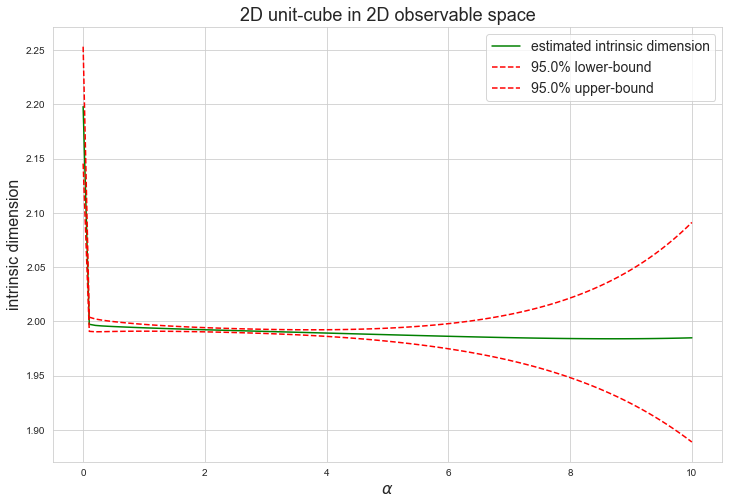

In [31]:
alphas = np.linspace(0.001, 10, 100)
plot_estimation_curve(estimator_cube_2_2, '2D unit-cube in 2D observable space', alphas)

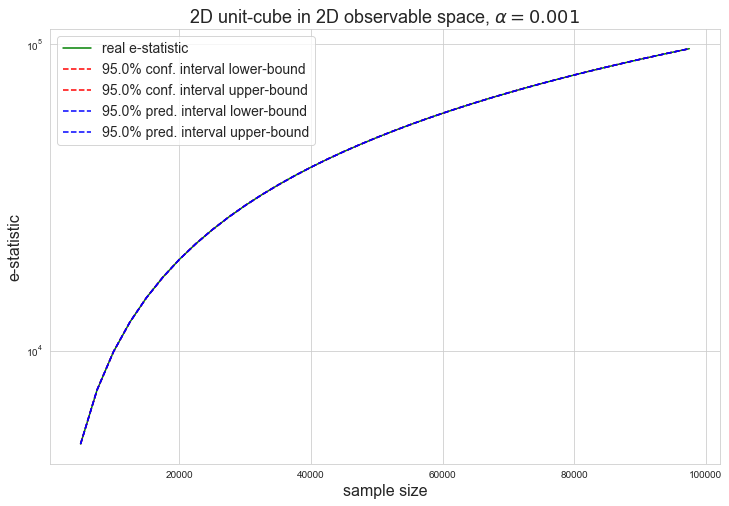

In [32]:
plot_regression_curve(estimator_cube_2_2, alphas.min(), 
                      rf'2D unit-cube in 2D observable space, $\alpha={alphas.min()}$')

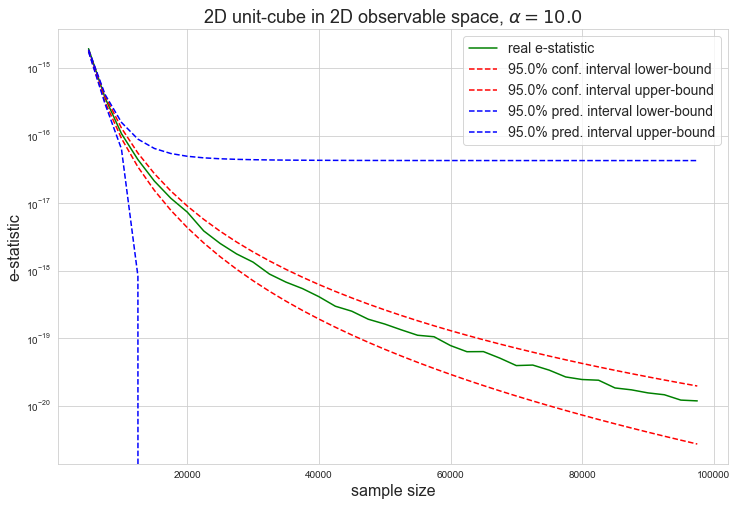

In [33]:
plot_regression_curve(estimator_cube_2_2, alphas.max(), 
                      rf'2D unit-cube in 2D observable space, $\alpha={alphas.max()}$')

#### [▲](#content) 3.2.1.2 Истинная топологическая размерность - 2, наблюдаемая размерность - 6 <a class="anchor" id="3.2.1.2-2d-6d"></a>

In [104]:
msts_cube_2_6 = list()
gen = SampleDataGenerator(True, True)
for size in tqdm(sample_sizes):
    data = gen.unit_cube(size=size, intrinsic_dimension=2)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_cube_2_6.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [11:27<00:00, 18.08s/it]


In [105]:
estimator_cube_2_6 = SchweinhartIntrinsicDimensionEstimator(msts_cube_2_6, sample_sizes)

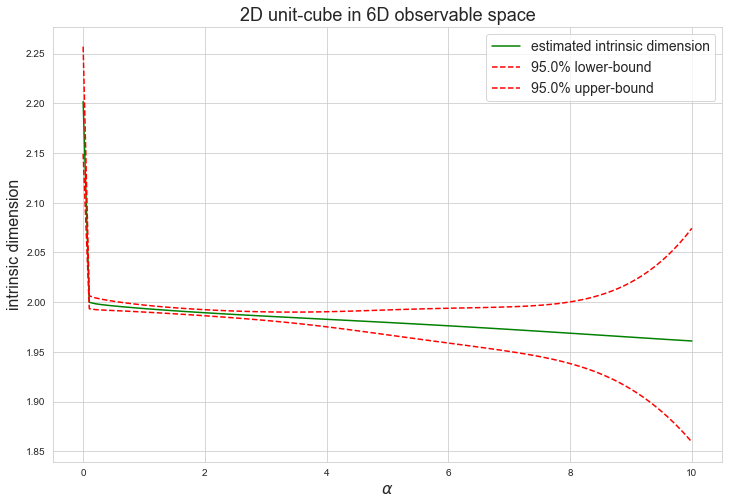

In [106]:
alphas = np.linspace(0.001, 10, 100)
plot_estimation_curve(estimator_cube_2_6, '2D unit-cube in 6D observable space', alphas)

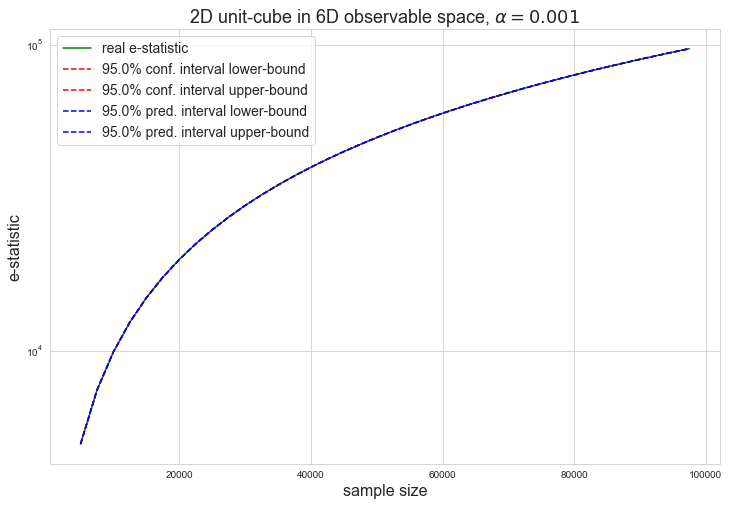

In [107]:
plot_regression_curve(estimator_cube_2_6, alphas.min(), 
                      rf'2D unit-cube in 6D observable space, $\alpha={alphas.min()}$')

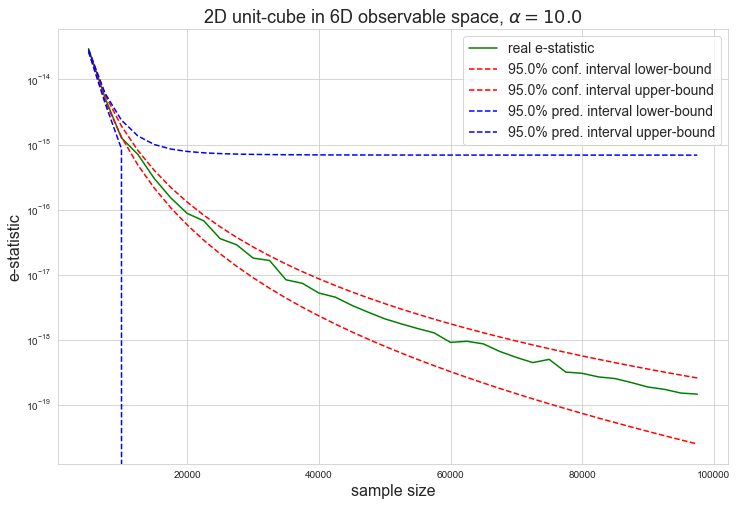

In [108]:
plot_regression_curve(estimator_cube_2_6, alphas.max(), 
                      rf'2D unit-cube in 6D observable space, $\alpha={alphas.max()}$')

### [▲](#content) 3.2.2 Эксперимент с предсказанием размерности единичного куба <a class="anchor" id="3.2.2-cube"></a>

#### [▲](#content) 3.2.2.1 Истинная топологическая размерность - 3, наблюдаемая размерность - 3 <a class="anchor" id="3.2.2.1-3d-3d"></a>

In [39]:
msts_cube_3_3 = list()
gen = SampleDataGenerator(False, False)
for size in tqdm(sample_sizes):
    data = gen.unit_cube(size=size, intrinsic_dimension=3)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_cube_3_3.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [12:00<00:00, 18.96s/it]


In [40]:
estimator_cube_3_3 = SchweinhartIntrinsicDimensionEstimator(msts_cube_3_3, sample_sizes)

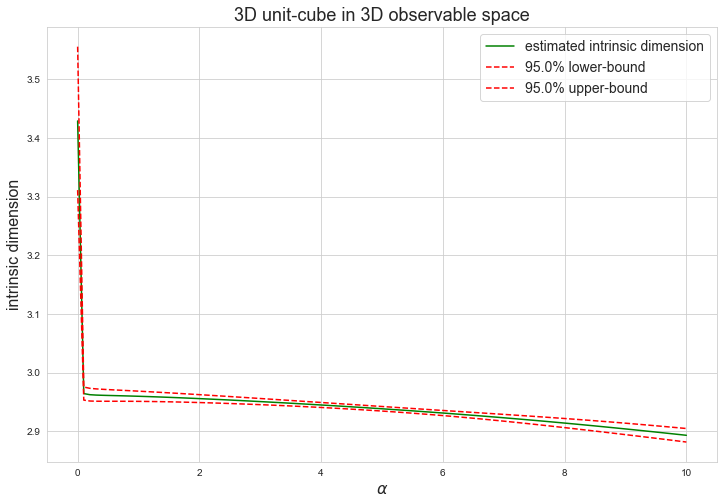

In [41]:
alphas = np.linspace(0.001, 10, 100)
plot_estimation_curve(estimator_cube_3_3, '3D unit-cube in 3D observable space', alphas)

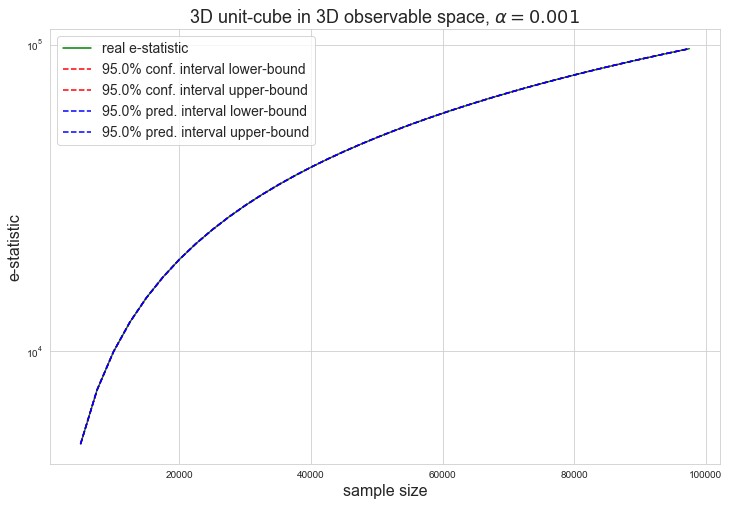

In [42]:
plot_regression_curve(estimator_cube_3_3, alphas.min(), 
                      rf'3D unit-cube in 3D observable space, $\alpha={alphas.min()}$')

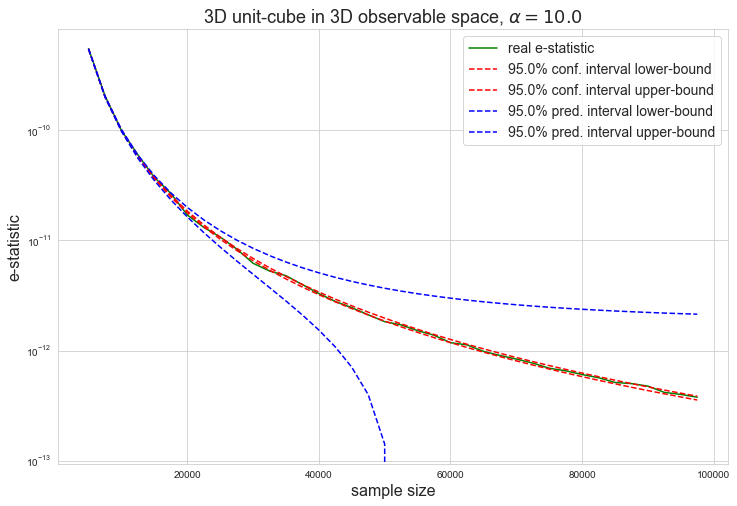

In [43]:
plot_regression_curve(estimator_cube_3_3, alphas.max(), 
                      rf'3D unit-cube in 3D observable space, $\alpha={alphas.max()}$')

#### [▲](#content) 3.2.2.2 Истинная топологическая размерность - 3, наблюдаемая размерность - 9 <a class="anchor" id="3.2.2.2-3d-9d"></a>

In [44]:
msts_cube_3_9 = list()
gen = SampleDataGenerator(True, True)
for size in tqdm(sample_sizes):
    data = gen.unit_cube(size=size, intrinsic_dimension=3)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_cube_3_9.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [11:44<00:00, 18.53s/it]


In [45]:
estimator_cube_3_9 = SchweinhartIntrinsicDimensionEstimator(msts_cube_3_9, sample_sizes)

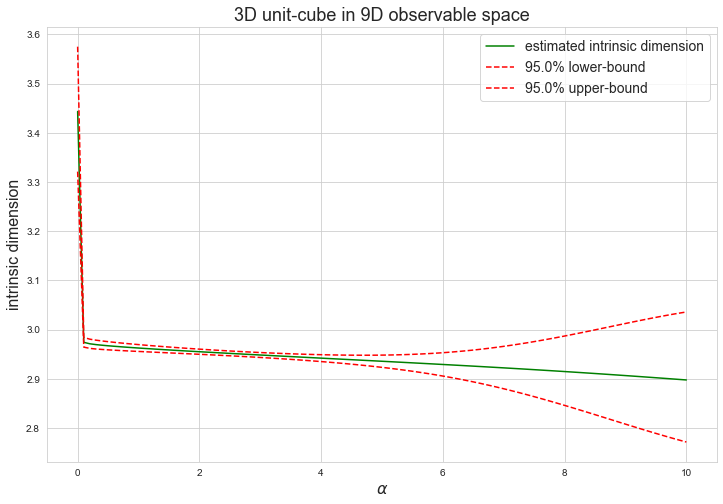

In [46]:
alphas = np.linspace(0.001, 10, 100)
plot_estimation_curve(estimator_cube_3_9, '3D unit-cube in 9D observable space', alphas)

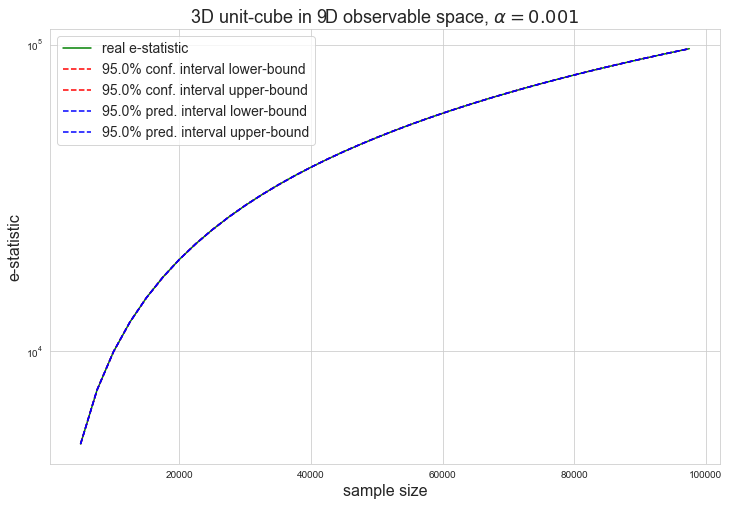

In [47]:
plot_regression_curve(estimator_cube_3_9, alphas.min(), 
                      rf'3D unit-cube in 9D observable space, $\alpha={alphas.min()}$')

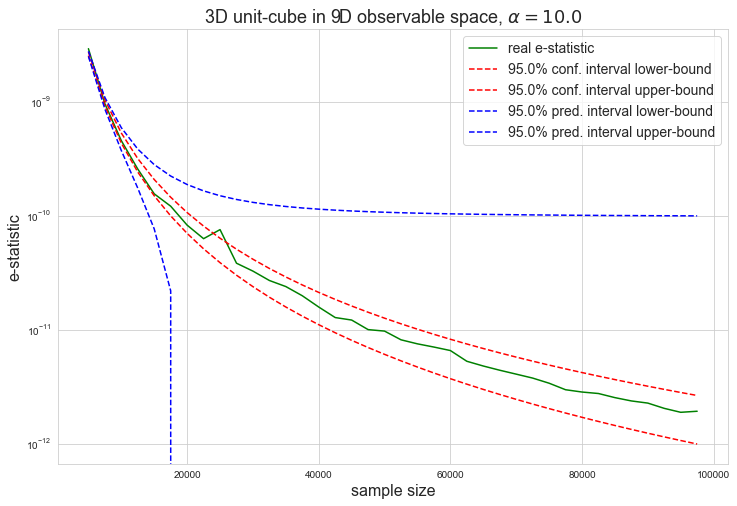

In [48]:
plot_regression_curve(estimator_cube_3_9, alphas.max(), 
                      rf'3D unit-cube in 9D observable space, $\alpha={alphas.max()}$')

### [▲](#content) 3.2.3 Эксперимент с предсказанием размерности единичной сферы <a class="anchor" id="3.2.3-sphere"></a>

#### [▲](#content) 3.2.3.1 Истинная топологическая размерность - 2, наблюдаемая размерность - 3 <a class="anchor" id="3.2.3.1-2d-3d"></a>

In [49]:
msts_sphere_2_3 = list()
gen = SampleDataGenerator(False, False)
for size in tqdm(sample_sizes):
    data = gen.unit_sphere(size=size, intrinsic_dimension=2)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_sphere_2_3.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [13:59<00:00, 22.08s/it]


In [50]:
estimator_sphere_2_3 = SchweinhartIntrinsicDimensionEstimator(msts_sphere_2_3, sample_sizes)

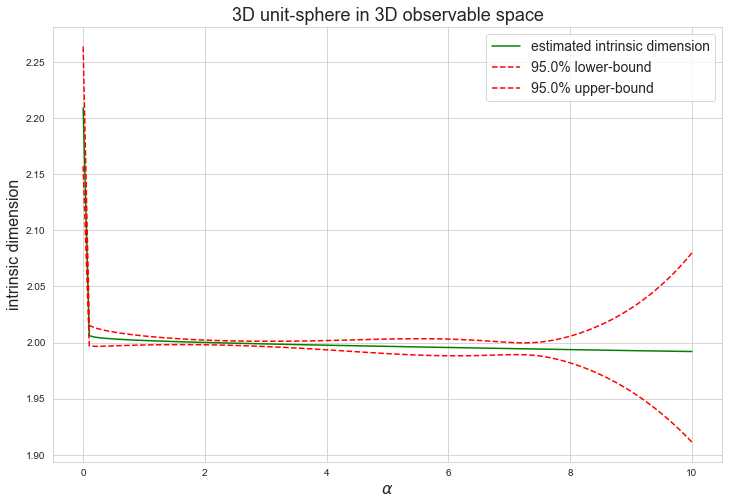

In [51]:
alphas = np.linspace(0.001, 10, 100)
plot_estimation_curve(estimator_sphere_2_3, '3D unit-sphere in 3D observable space', alphas)

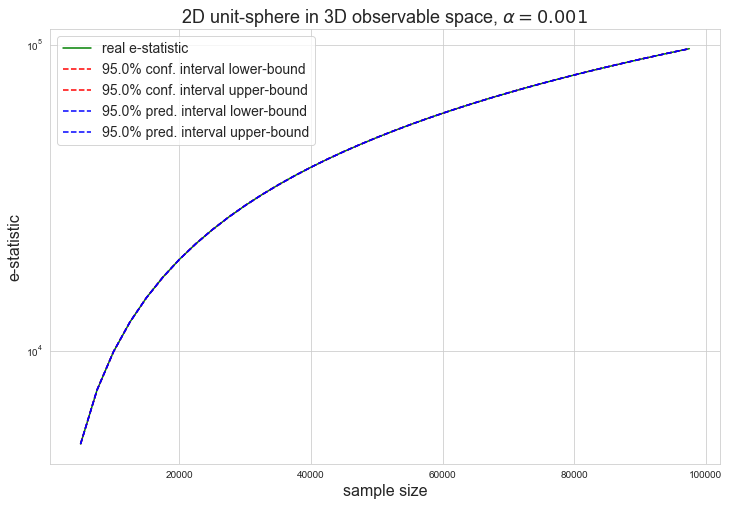

In [52]:
plot_regression_curve(estimator_sphere_2_3, alphas.min(), 
                      rf'2D unit-sphere in 3D observable space, $\alpha={alphas.min()}$')

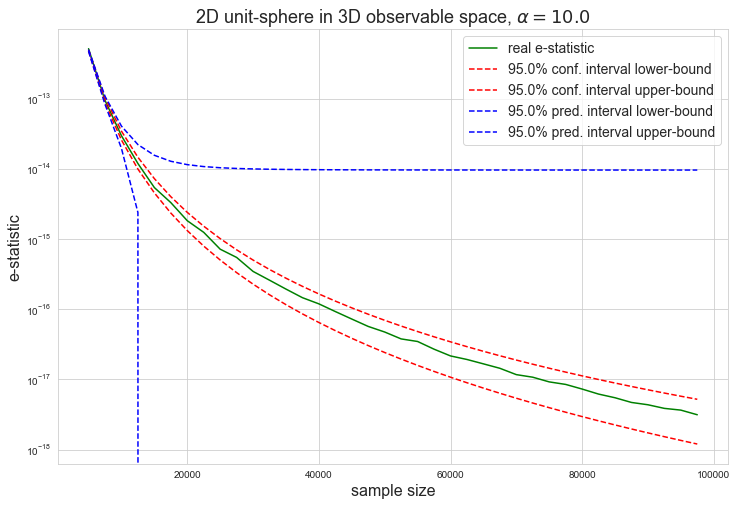

In [53]:
plot_regression_curve(estimator_sphere_2_3, alphas.max(), 
                      rf'2D unit-sphere in 3D observable space, $\alpha={alphas.max()}$')

#### [▲](#content) 3.2.3.2 Истинная топологическая размерность - 2, наблюдаемая размерность - 9 <a class="anchor" id="3.2.3.2-2d-9d"></a>

In [54]:
msts_sphere_2_9 = list()
gen = SampleDataGenerator(True, True)
for size in tqdm(sample_sizes):
    data = gen.unit_sphere(size=size, intrinsic_dimension=2)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_sphere_2_9.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [16:42<00:00, 26.38s/it]


In [55]:
estimator_sphere_2_9 = SchweinhartIntrinsicDimensionEstimator(msts_sphere_2_9, sample_sizes)

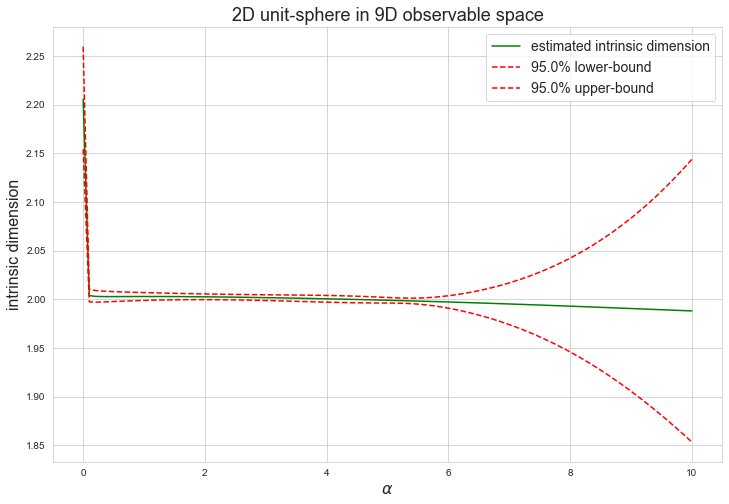

In [56]:
alphas = np.linspace(0.001, 10, 100)
plot_estimation_curve(estimator_sphere_2_9, '2D unit-sphere in 9D observable space', alphas)

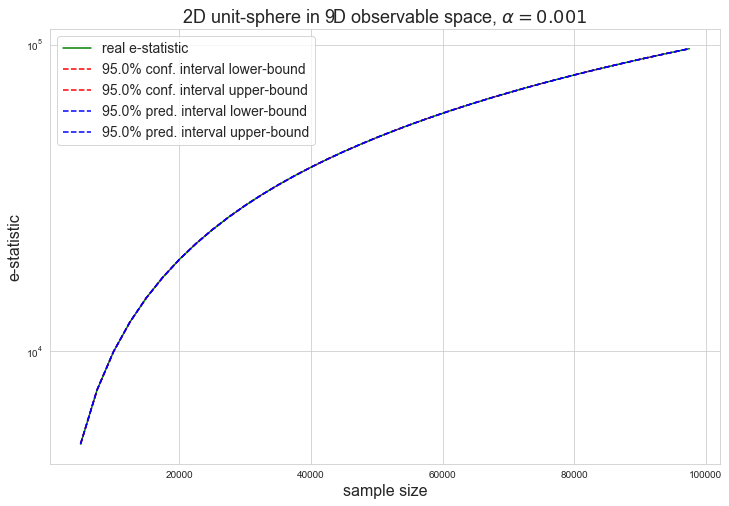

In [57]:
plot_regression_curve(estimator_sphere_2_9, alphas.min(), 
                      rf'2D unit-sphere in 9D observable space, $\alpha={alphas.min()}$')

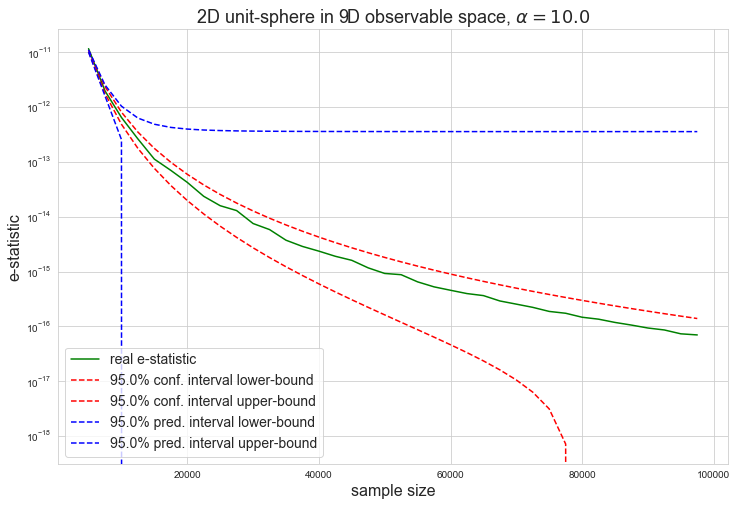

In [58]:
plot_regression_curve(estimator_sphere_2_9, alphas.max(), 
                      rf'2D unit-sphere in 9D observable space, $\alpha={alphas.max()}$')

#### [▲](#content) 3.2.3.3 Истинная топологическая размерность - 5, наблюдаемая размерность - 18 <a class="anchor" id="3.2.3.3-5d-18d"></a>

In [59]:
msts_sphere_5_18 = list()
gen = SampleDataGenerator(True, True)
for size in tqdm(sample_sizes):
    data = gen.unit_sphere(size=size, intrinsic_dimension=5)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_sphere_5_18.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [16:16<00:00, 25.69s/it]


In [60]:
estimator_sphere_5_18 = SchweinhartIntrinsicDimensionEstimator(msts_sphere_5_18, sample_sizes)

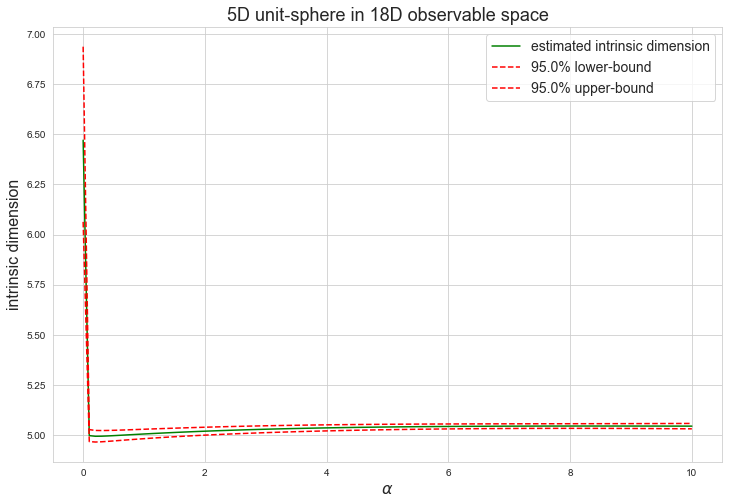

In [61]:
alphas = np.linspace(0.001, 10, 100)
plot_estimation_curve(estimator_sphere_5_18, '5D unit-sphere in 18D observable space', alphas)

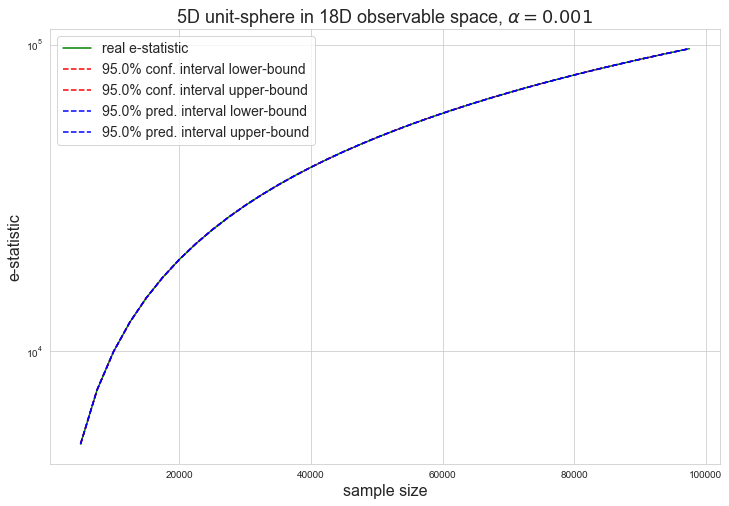

In [62]:
plot_regression_curve(estimator_sphere_5_18, alphas.min(), 
                      rf'5D unit-sphere in 18D observable space, $\alpha={alphas.min()}$')

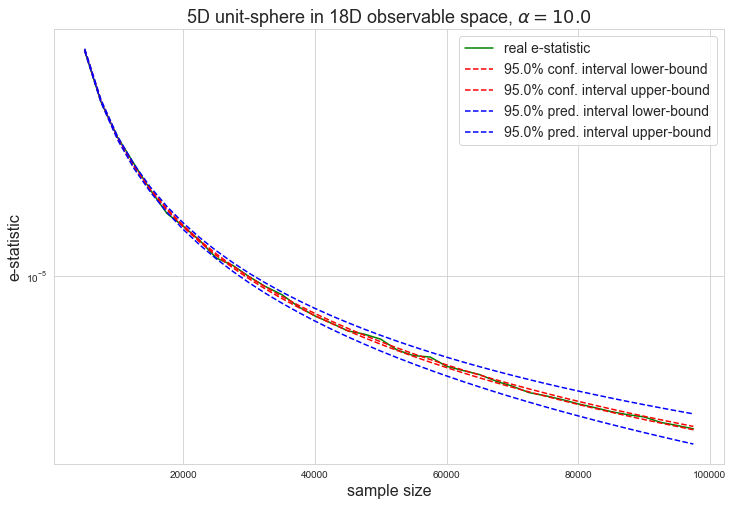

In [63]:
plot_regression_curve(estimator_sphere_5_18, alphas.max(), 
                      rf'5D unit-sphere in 18D observable space, $\alpha={alphas.max()}$')

#### [▲](#content) 3.2.3.4 Истинная топологическая размерность - 8, наблюдаемая размерность - 27 <a class="anchor" id="3.2.3.4-8d-27d"></a>

In [64]:
msts_sphere_8_27 = list()
gen = SampleDataGenerator(True, True)
for size in tqdm(sample_sizes):
    data = gen.unit_sphere(size=size, intrinsic_dimension=8)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_sphere_8_27.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [13:13<00:00, 20.88s/it]


In [65]:
estimator_sphere_8_27 = SchweinhartIntrinsicDimensionEstimator(msts_sphere_8_27, sample_sizes)

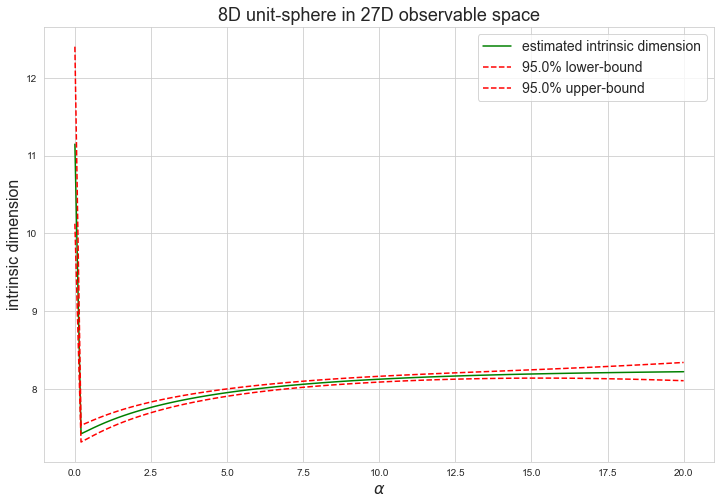

In [66]:
alphas = np.linspace(0.001, 20, 100)
plot_estimation_curve(estimator_sphere_8_27, '8D unit-sphere in 27D observable space', alphas)

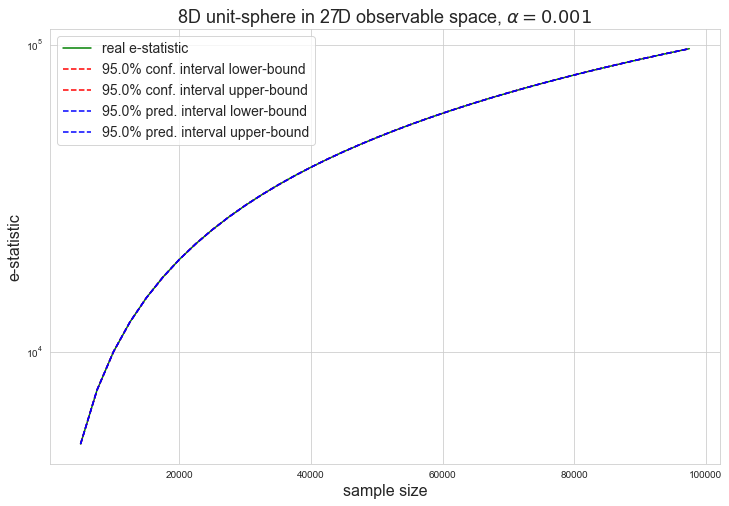

In [67]:
plot_regression_curve(estimator_sphere_8_27, alphas.min(), 
                      rf'8D unit-sphere in 27D observable space, $\alpha={alphas.min()}$')

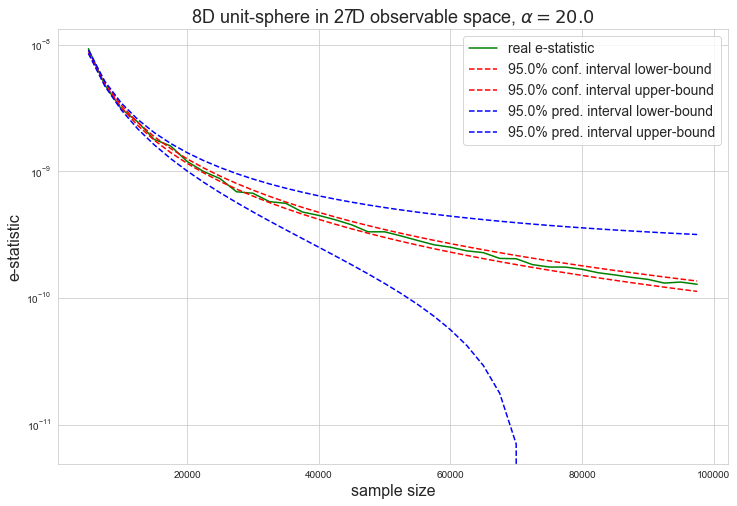

In [68]:
plot_regression_curve(estimator_sphere_8_27, alphas.max(), 
                      rf'8D unit-sphere in 27D observable space, $\alpha={alphas.max()}$')

### [▲](#content) 3.2.4 Эксперимент с предсказанием размерности параболоида <a class="anchor" id="3.2.4-paraboloid"></a>

#### [▲](#content) 3.2.4.1 Истинная топологическая размерность - 2, наблюдаемая размерность - 3 <a class="anchor" id="3.2.4.1-2d-3d"></a>

In [109]:
msts_paraboloid_2_3 = list()
gen = SampleDataGenerator(False, False)
for size in tqdm(sample_sizes):
    data = gen.paraboloid(size=size, intrinsic_dimension=2)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_paraboloid_2_3.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [11:11<00:00, 17.67s/it]


In [110]:
estimator_paraboloid_2_3 = SchweinhartIntrinsicDimensionEstimator(msts_paraboloid_2_3, sample_sizes)

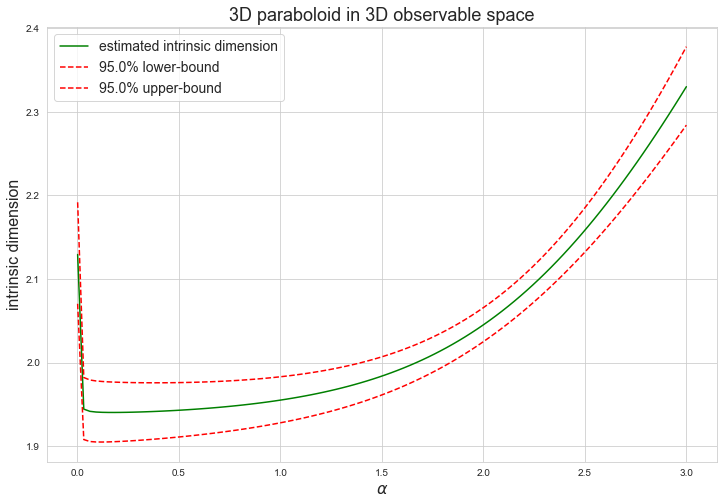

In [111]:
alphas = np.linspace(0.001, 3, 100)
plot_estimation_curve(estimator_paraboloid_2_3, '3D paraboloid in 3D observable space', alphas)

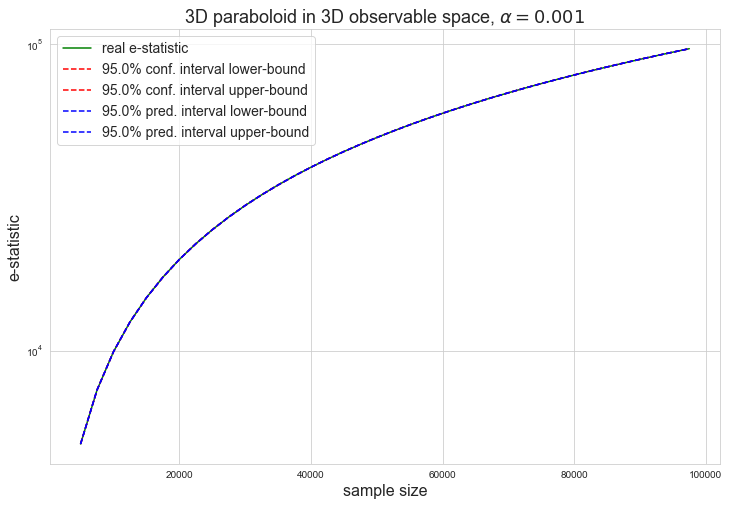

In [72]:
plot_regression_curve(estimator_paraboloid_2_3, alphas.min(), 
                      rf'3D paraboloid in 3D observable space, $\alpha={alphas.min()}$')

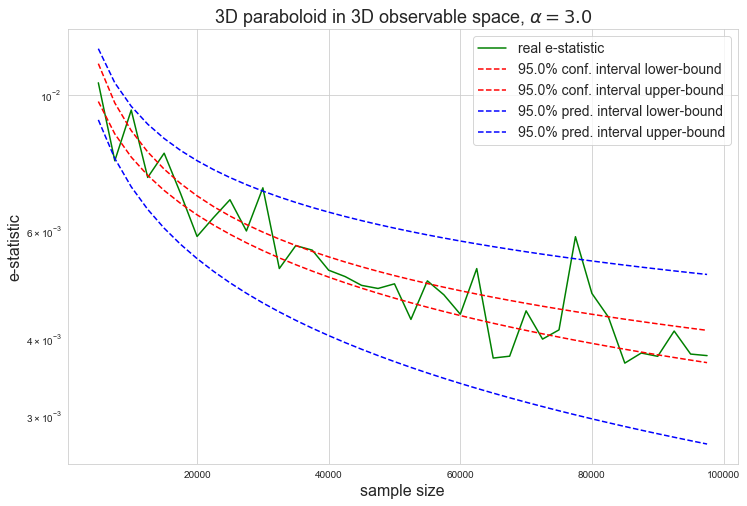

In [73]:
plot_regression_curve(estimator_paraboloid_2_3, alphas.max(), 
                      rf'3D paraboloid in 3D observable space, $\alpha={alphas.max()}$')

#### [▲](#content) 3.2.4.2 Истинная топологическая размерность - 2, наблюдаемая размерность - 9 <a class="anchor" id="3.2.4.2-2d-9d"></a>

In [112]:
msts_paraboloid_2_9 = list()
gen = SampleDataGenerator(True, True)
for size in tqdm(sample_sizes):
    data = gen.paraboloid(size=size, intrinsic_dimension=2)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_paraboloid_2_9.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [11:19<00:00, 17.89s/it]


In [113]:
estimator_paraboloid_2_9 = SchweinhartIntrinsicDimensionEstimator(msts_paraboloid_2_9, sample_sizes)

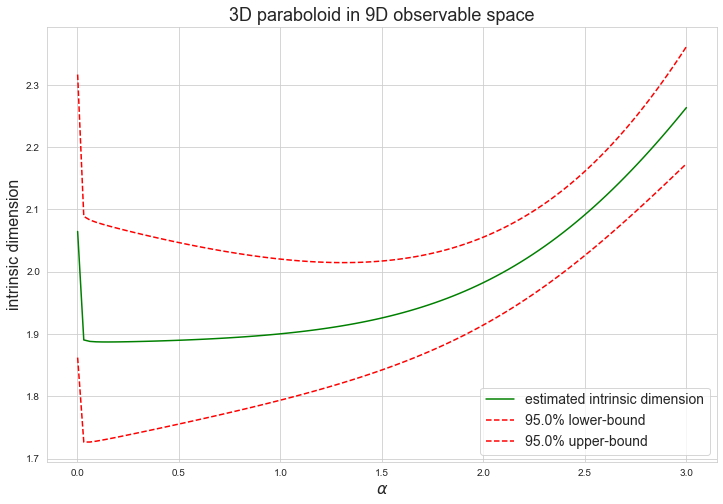

In [114]:
alphas = np.linspace(0.001, 3, 100)
plot_estimation_curve(estimator_paraboloid_2_9, '3D paraboloid in 9D observable space', alphas)

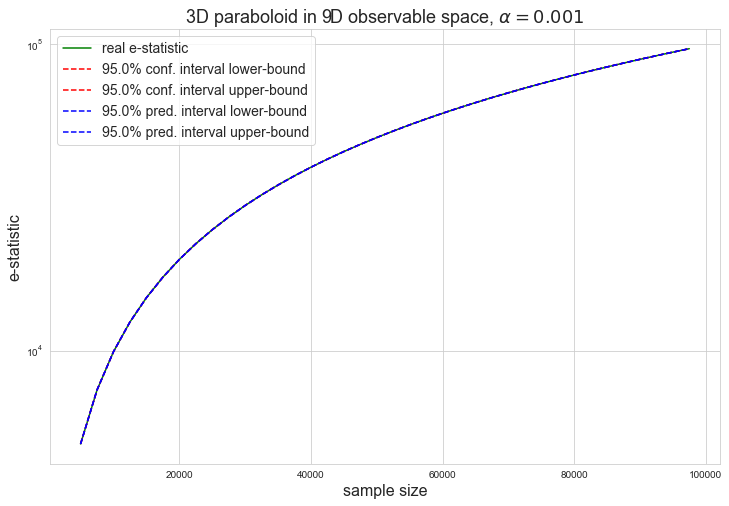

In [77]:
plot_regression_curve(estimator_paraboloid_2_9, alphas.min(), 
                      rf'3D paraboloid in 9D observable space, $\alpha={alphas.min()}$')

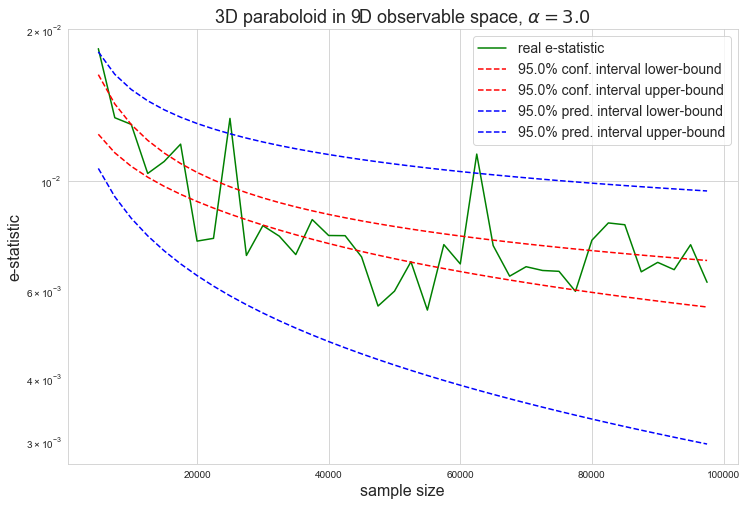

In [78]:
plot_regression_curve(estimator_paraboloid_2_9, alphas.max(), 
                      rf'3D paraboloid in 9D observable space, $\alpha={alphas.max()}$')

#### [▲](#content) 3.2.4.3 Истинная размерность - 8, наблюдаемая - 27 <a class="anchor" id="3.2.4.3-8d-27d"></a>

In [79]:
msts_paraboloid_8_27 = list()
gen = SampleDataGenerator(True, True)
for size in tqdm(sample_sizes):
    data = gen.paraboloid(size=size, intrinsic_dimension=8)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_paraboloid_8_27.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [13:16<00:00, 20.95s/it]


In [80]:
estimator_paraboloid_8_27 = SchweinhartIntrinsicDimensionEstimator(msts_paraboloid_8_27, sample_sizes)

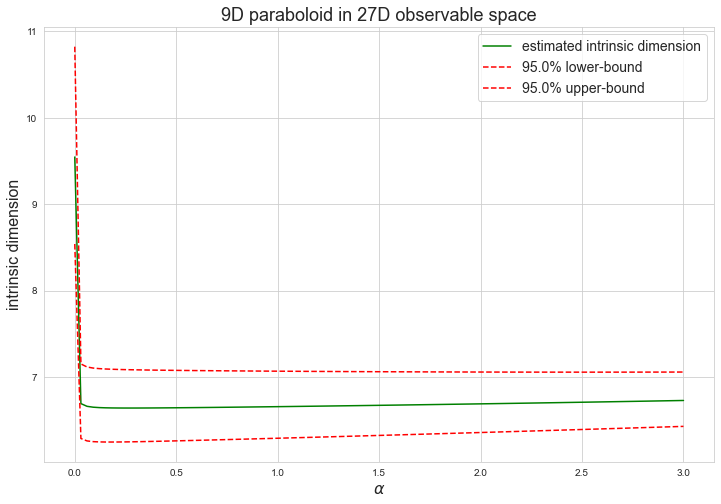

In [81]:
alphas = np.linspace(0.001, 3, 100)
plot_estimation_curve(estimator_paraboloid_8_27, '9D paraboloid in 27D observable space', alphas)

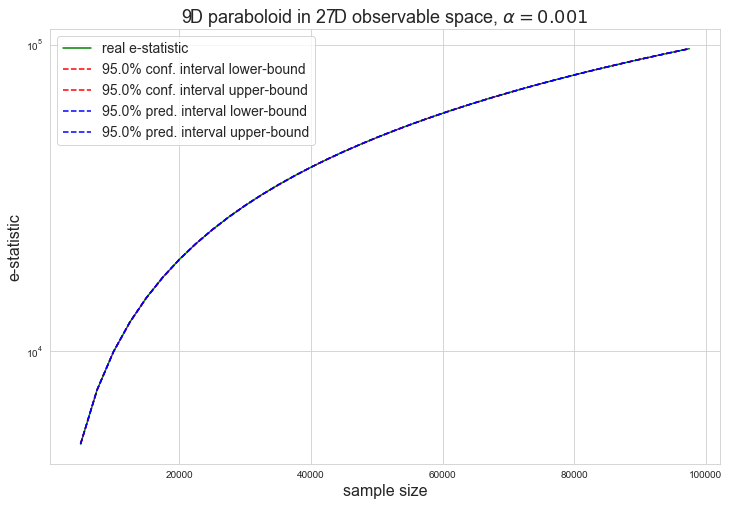

In [82]:
plot_regression_curve(estimator_paraboloid_8_27, alphas.min(),
                      rf'9D paraboloid in 27D observable space, $\alpha={alphas.min()}$')

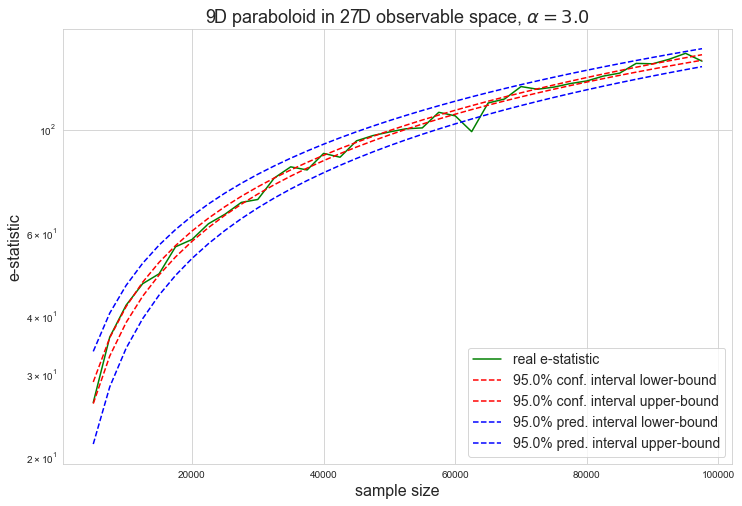

In [83]:
plot_regression_curve(estimator_paraboloid_8_27, alphas.max(), 
                      rf'9D paraboloid in 27D observable space, $\alpha={alphas.max()}$')

### [▲](#content) 3.2.5 Эксперимент с предсказанием размерности множества Кантора <a class="anchor" id="3.2.5-Cantor-set"></a>

#### [▲](#content) 3.2.5.1 Истинная фрактальная размерность ~ 0.63, наблюдаемая размерность - 1 <a class="anchor" id="3.2.5.1-0.63d-1d"></a>

In [115]:
msts_cantor = list()
gen = SampleDataGenerator(False, False)
for size in tqdm(sample_sizes):
    data = gen.cantor_set(size=size)[:, np.newaxis]
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_cantor.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [11:18<00:00, 17.86s/it]


In [116]:
estimator_cantor = SchweinhartIntrinsicDimensionEstimator(msts_cantor, sample_sizes)

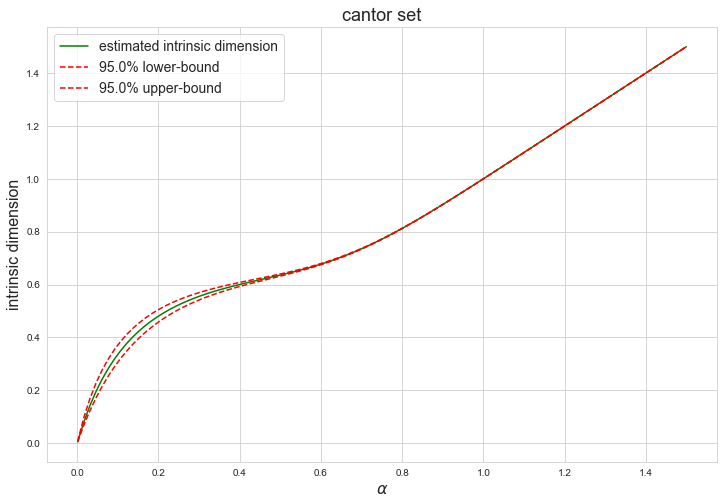

In [117]:
alphas = np.linspace(0.001, 1.5, 100)
plot_estimation_curve(estimator_cantor, 'cantor set', alphas)

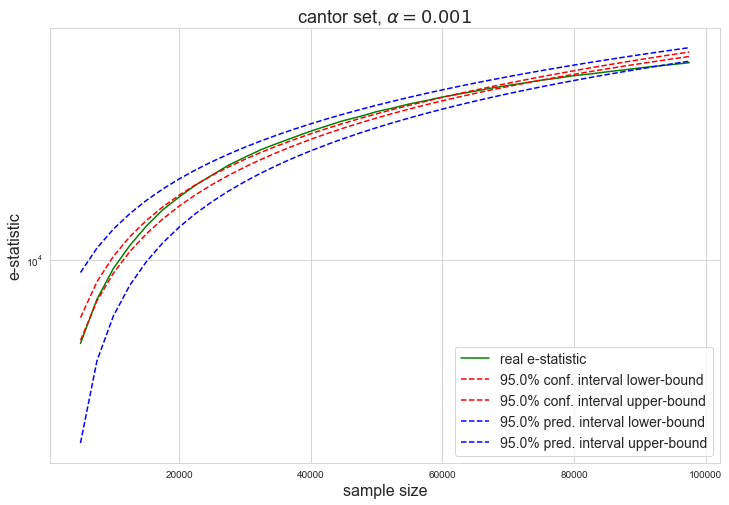

In [87]:
plot_regression_curve(estimator_cantor, alphas.min(), rf'cantor set, $\alpha={alphas.min()}$')

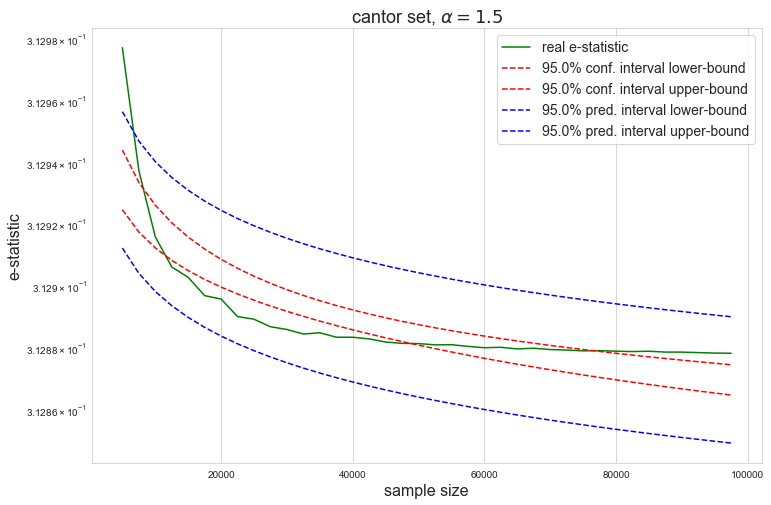

In [88]:
plot_regression_curve(estimator_cantor, alphas.max(), rf'cantor set, $\alpha={alphas.max()}$')

### [▲](#content) 3.2.6 Эксперимент с предсказанием размерности треугольника Серпинского <a class="anchor" id="3.2.6-Sierpinsky-carpet"></a>

#### [▲](#content) 3.2.6.1 Истинная фрактальная размерность ~ 1.58, наблюдаемая размерность - 2 <a class="anchor" id="3.2.6.1-1.58d-2d"></a>

In [89]:
msts_sierpinski = list()
gen = SampleDataGenerator(False, False)
for size in tqdm(sample_sizes):
    data = gen.sierpinski_triangle(size=size)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_sierpinski.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [12:09<00:00, 19.19s/it]


In [90]:
estimator_sierpinski = SchweinhartIntrinsicDimensionEstimator(msts_sierpinski, sample_sizes)

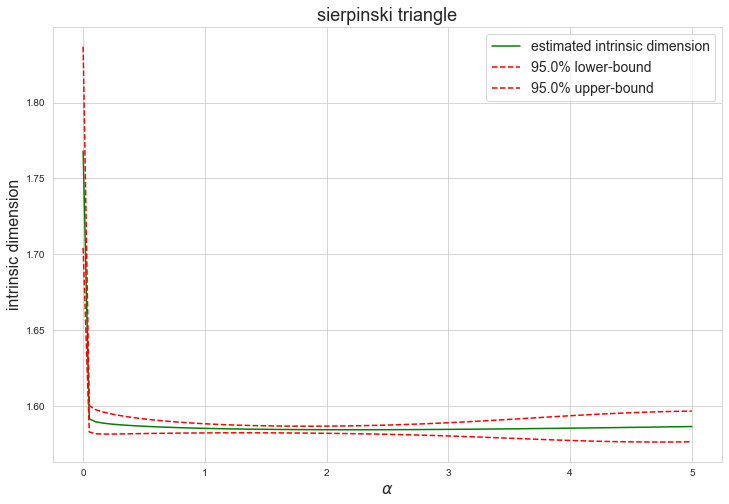

In [91]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator_sierpinski, 'sierpinski triangle', alphas)

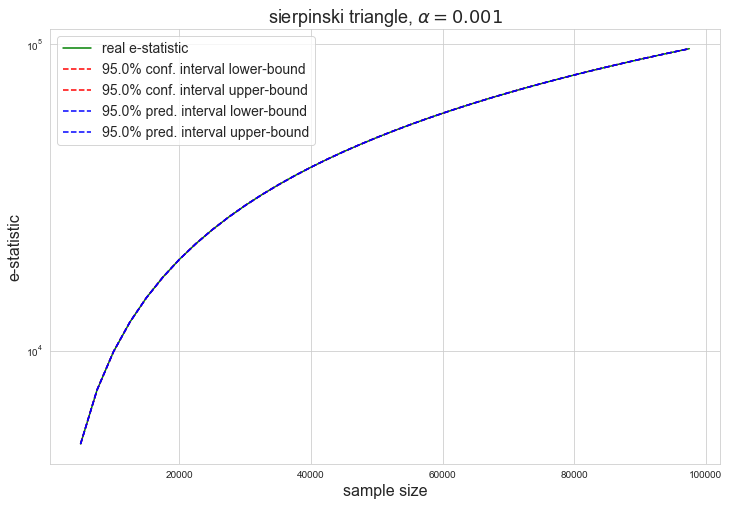

In [92]:
plot_regression_curve(estimator_sierpinski, alphas.min(), rf'sierpinski triangle, $\alpha={alphas.min()}$')

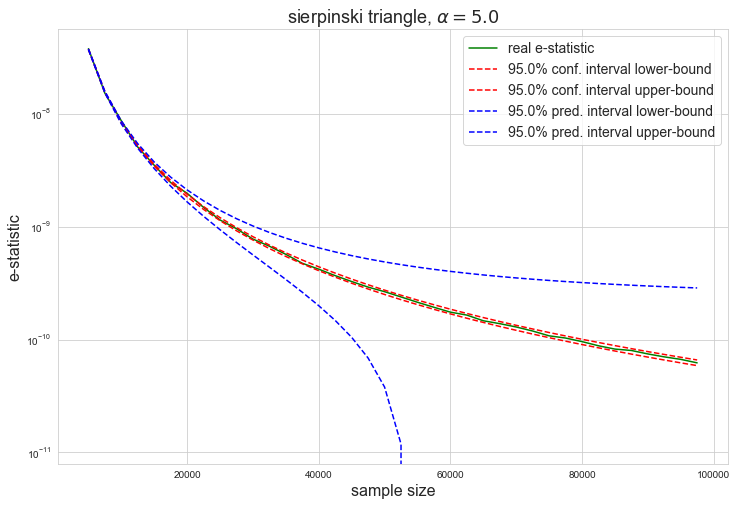

In [93]:
plot_regression_curve(estimator_sierpinski, alphas.max(), rf'sierpinski triangle, $\alpha={alphas.max()}$')

### [▲](#content) 3.2.7 Эксперимент с предсказанием размерности ленты Мёбиуса <a class="anchor" id="3.2.7-Mobius"></a>

#### [▲](#content) 3.2.7.1 Истинная топологическая размерность - 2, наблюдаемая размерность - 3 <a class="anchor" id="3.2.7.1-2d-3d"></a>

In [118]:
msts_mobius = list()
gen = SampleDataGenerator(False, False)
for size in tqdm(sample_sizes):
    data = gen.mobius(size=size)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_mobius.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [11:07<00:00, 17.58s/it]


In [119]:
estimator_mobius = SchweinhartIntrinsicDimensionEstimator(msts_mobius, sample_sizes)

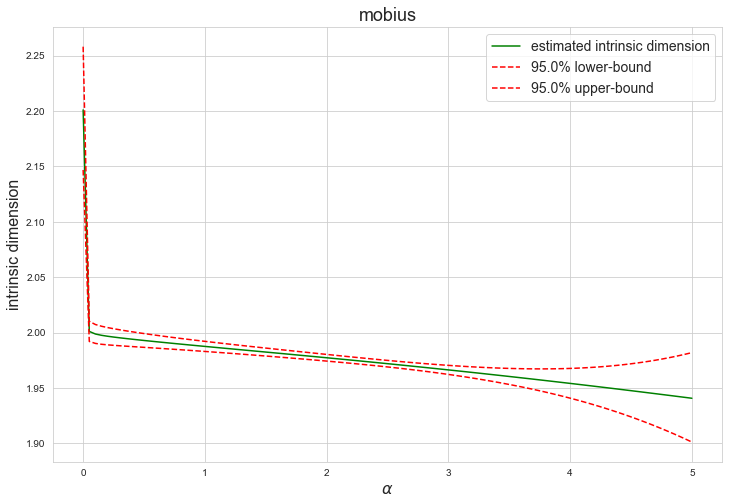

In [120]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator_mobius, 'mobius', alphas)

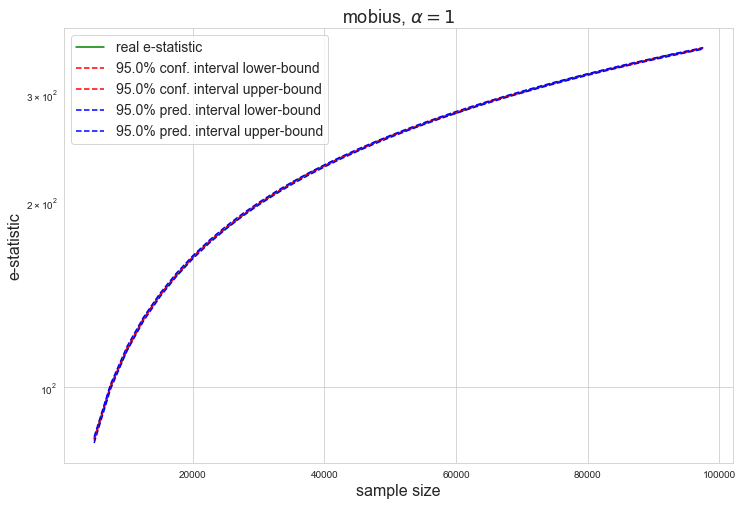

In [97]:
plot_regression_curve(estimator_mobius, 1, r'mobius, $\alpha=1$')

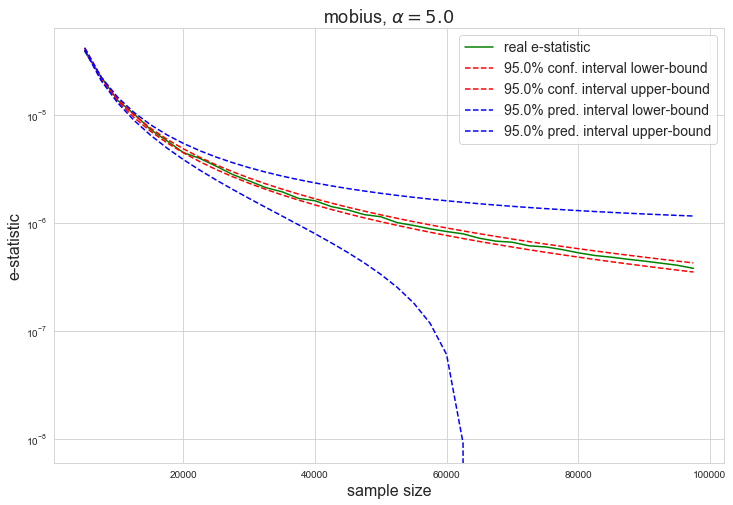

In [98]:
plot_regression_curve(estimator_mobius, alphas.max(), rf'mobius, $\alpha={alphas.max()}$')

### [▲](#content) 3.2.8 Эксперимент с предсказанием размерности "Swiss-roll" <a class="anchor" id="3.2.8-Swiss-roll"></a>

#### [▲](#content) 3.2.8.1 Истинная топологическая размерность - 2, наблюдаемая размерность - 3 <a class="anchor" id="3.2.8.1-2d-3d"></a>

In [121]:
msts_swiss_roll = list()
gen = SampleDataGenerator(False, False)
for size in tqdm(sample_sizes):
    data = gen.swiss_roll(size=size)
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_swiss_roll.append(mst)

100%|█████████████████████████████████████████████████████| 38/38 [11:07<00:00, 17.57s/it]


In [122]:
estimator_swiss_roll = SchweinhartIntrinsicDimensionEstimator(msts_swiss_roll, sample_sizes)

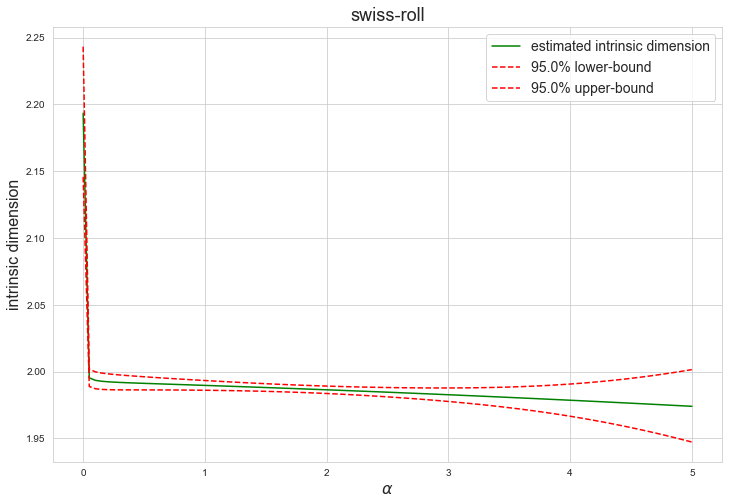

In [123]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator_swiss_roll, 'swiss-roll', alphas)

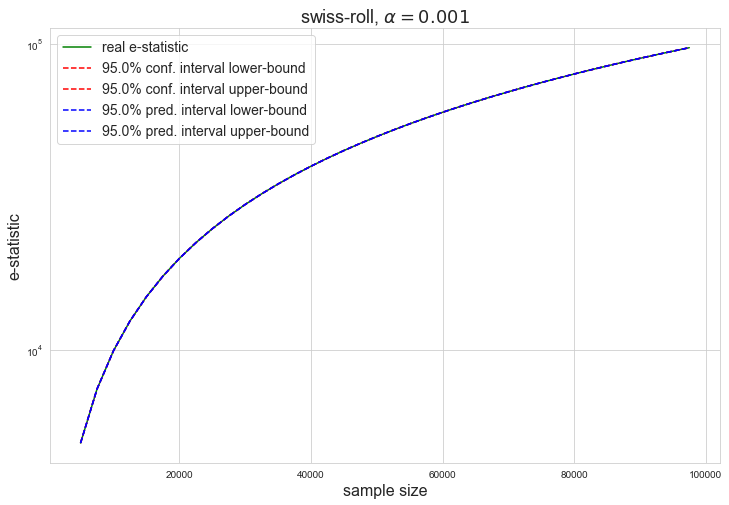

In [102]:
plot_regression_curve(estimator_swiss_roll, alphas.min(), rf'swiss-roll, $\alpha={alphas.min()}$')

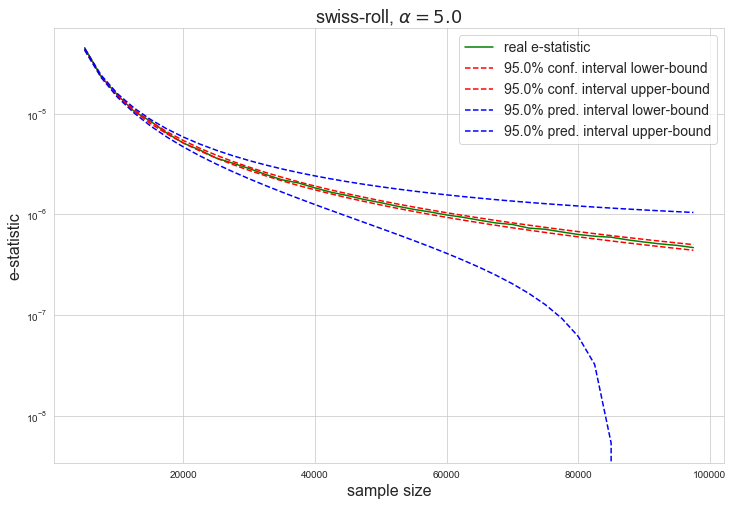

In [103]:
plot_regression_curve(estimator_swiss_roll, alphas.max(), rf'swiss-roll, $\alpha={alphas.max()}$')

### [▲](#content) 3.2.9 Тестирование в динамике <a class="anchor" id="3.2.9-Dynamic-testing"></a>

#### [▲](#content) 3.2.9.1 Эксперимент №1<a class="anchor" id="3.2.9.1-Experiment-1"></a>

In [3]:
intrinsic_dim = 8
container_dims = np.arange(intrinsic_dim, 27)
sample_sizes = np.arange(5000, 100000, 2500)
conf_coefficient = 0.05

In [ ]:
estimators = list()
for index, container_dim in enumerate(tqdm(container_dims)):
    msts_edges_weights = list()
    for size in sample_sizes:
        dataset = SampleDataGenerator(container_dim - intrinsic_dim).unit_sphere(size, intrinsic_dim)
        mst = MstBuilder(dataset.tolist()).build(workers_count=6, distance_measure=DistanceMeasure.EUCLIDEAN)
        msts_edges_weights.append(SchweinhartIntrinsicDimensionEstimator.get_mst_weights(mst))
        
    estimators.append(SchweinhartIntrinsicDimensionEstimator(
        [None] * len(sample_sizes), 
        sample_sizes,
        msts_edges_weights=msts_edges_weights, 
        save_stats=False
    ))
    
alphas = np.linspace(0.001, 10, 100)

In [34]:
%matplotlib inline

figure = plt.figure(figsize=(12, 8))
plot_estimated = plt.plot([], 'g-', label='estimated intrinsic dimension')[0]
plot_conf_intervals_lower = plt.plot([], 'r--', label=f'{(1 - conf_coefficient) * 100}% lower-bound')[0]
plot_conf_intervals_upper = plt.plot([], 'r--', label=f'{(1 - conf_coefficient) * 100}% upper-bound')[0]

plt.xlim(0.9 * alphas.min(), alphas.max() + 0.1 * alphas.min()) 
plt.ylim(7, 12) 
                
plt.legend(fontsize=14)
plt.xlabel('alpha', fontsize=16)
plt.ylabel('estimated intrinsic dimension', fontsize=16)
plt.title('Schweinhart, fixed intrinsic=8, dynamic container=[8; 27]', fontsize=18)

def animation_function(frame):
    estimated_dims = np.zeros(alphas.size)
    dim_conf_intervals = np.zeros((alphas.size, 2))
    for index, alpha in enumerate(alphas):
        estimated_dims[index] = estimators[frame].estimate(alpha)
        dim_conf_intervals[index] = estimators[frame].get_dim_conf_interval(alpha, conf_coefficient)
    plot_estimated.set_data((alphas, estimated_dims))
    plot_conf_intervals_lower.set_data((alphas, dim_conf_intervals[:, 0]))
    plot_conf_intervals_upper.set_data((alphas, dim_conf_intervals[:, 1]))
    
animation = FuncAnimation(figure, animation_function, frames=len(estimators)).to_jshtml()
clear_output()

In [35]:
with open(f'saves/schweinhart-dynamic-test1.jshtml', 'w', encoding='utf-8') as stream_writer:
    stream_writer.write(animation)

In [ ]:
%matplotlib notebook

with open(f'saves/schweinhart-dynamic-test1.jshtml', 'r', encoding='utf-8') as stream_reader:
    animation = stream_reader.read()

%matplotlib notebook
HTML(animation)

#### [▲](#content) 3.2.9.2 Эксперимент №2<a class="anchor" id="3.2.9.2-Experiment-2"></a>

In [342]:
sample_sizes = np.arange(5000, 100000, 2500)
intrinsic_dims = np.arange(2, 17)
conf_coefficient = 0.05

In [343]:
estimators = list()
for index, intrinsic_dim in enumerate(tqdm(intrinsic_dims)):
    msts_edges_weights = list()
    for size in sample_sizes:
        dataset = SampleDataGenerator().unit_sphere(size, intrinsic_dim)
        mst = MstBuilder(dataset.tolist()).build(workers_count=6, distance_measure=DistanceMeasure.EUCLIDEAN)
        msts_edges_weights.append(SchweinhartIntrinsicDimensionEstimator.get_mst_weights(mst))
        
    estimators.append(SchweinhartIntrinsicDimensionEstimator(
        [None] * len(sample_sizes), 
        sample_sizes,
        msts_edges_weights=msts_edges_weights, 
        save_stats=False
    ))

100%|██████████████████████████████████████████████████| 15/15 [3:03:08<00:00, 732.55s/it]


In [355]:
alphas = np.linspace(0.001, 50, 1000)

In [380]:
%matplotlib inline

figure = plt.figure(figsize=(12, 8))
plot_estimated = plt.plot([], 'g-', label='estimated intrinsic dimension')[0]
plot_conf_intervals_lower = plt.plot([], 'r--', label=f'{(1 - conf_coefficient) * 100}% lower-bound')[0]
plot_conf_intervals_upper = plt.plot([], 'r--', label=f'{(1 - conf_coefficient) * 100}% upper-bound')[0]

plt.xlim(0.9 * alphas.min(), alphas.max() + 0.1 * alphas.min()) 
plt.ylim(1, 20) 
                
plt.legend(fontsize=14)
plt.xlabel('alpha', fontsize=16)
plt.ylabel('estimated intrinsic dimension', fontsize=16)
plt.title('Schweinhart, dynamic intrinsic=[2; 16], dynamic container=[3; 17]', fontsize=18)

def animation_function(frame):
    estimated_dims = np.zeros(alphas.size)
    dim_conf_intervals = np.zeros((alphas.size, 2))
    for index, alpha in enumerate(alphas):
        estimated_dims[index] = estimators[frame].estimate(alpha)
        dim_conf_intervals[index] = estimators[frame].get_dim_conf_interval(alpha, conf_coefficient)
    plot_estimated.set_data((alphas, estimated_dims))
    plot_conf_intervals_lower.set_data((alphas, dim_conf_intervals[:, 0]))
    plot_conf_intervals_upper.set_data((alphas, dim_conf_intervals[:, 1]))
    
animation = FuncAnimation(figure, animation_function, frames=len(estimators)).to_jshtml()
clear_output()

In [357]:
with open(f'saves/schweinhart-dynamic-test2.jshtml', 'w', encoding='utf-8') as stream_writer:
    stream_writer.write(animation)

In [ ]:
%matplotlib notebook

with open(f'saves/schweinhart-dynamic-test2.jshtml', 'r', encoding='utf-8') as stream_reader:
    animation = stream_reader.read()

%matplotlib notebook
HTML(animation)

### [▲](#content) 3.2.10 Тест на устойчивость к шуму <a class="anchor" id="3.2.10-Noise-testing"></a>

#### [▲](#content) 3.2.10.1 Двумерное многообразие, std=0.001 <a class="anchor" id="3.2.10.1-Swiss-roll-std-0.001"></a>

In [16]:
sample_sizes = np.arange(5000, 100001, 5000)
noise_stds = np.array([0.001, 0.01, 0.1, 1])
noise = [np.array(list(map(lambda std: np.random.normal(0, std, (size, 3)), noise_stds))) for size in sample_sizes]

In [17]:
msts_swiss_roll = list()
gen = SampleDataGenerator()
for index, size in enumerate(tqdm(sample_sizes)):
    data = gen.swiss_roll(size=size) + noise[index][0]
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    mst = MstBuilder(normalized_data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_swiss_roll.append(mst)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [20:17<00:00, 60.88s/it]


In [19]:
title = "\"Swiss-roll, std=0.001\""

In [ ]:
fig = go.Figure(
    data=[go.Scatter3d(
        x=data[:, 0], 
        y=data[:, 1], 
        z=data[:, 2],
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text=title)
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [255]:
estimator_swiss_roll = SchweinhartIntrinsicDimensionEstimator(msts_swiss_roll, sample_sizes)

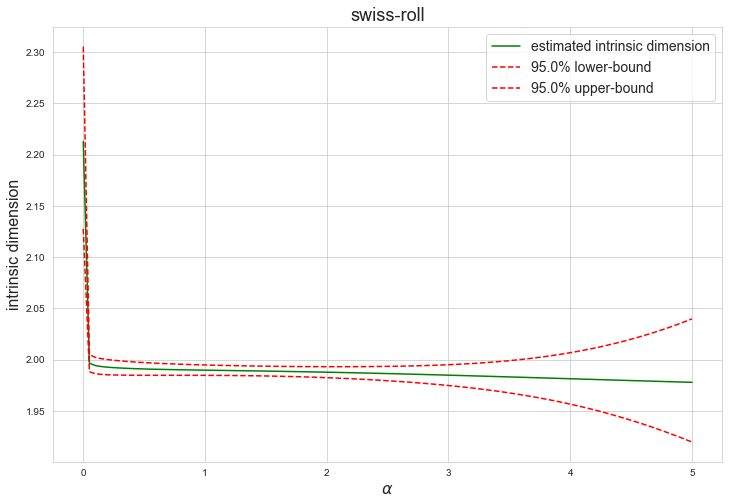

In [256]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator_swiss_roll, 'swiss-roll', alphas)

#### [▲](#content) 3.2.10.2 Двумерное многообразие, std=0.01 <a class="anchor" id="3.2.10.2-Swiss-roll-std-0.01"></a>

In [257]:
msts_swiss_roll = list()
gen = SampleDataGenerator()
for index, size in enumerate(tqdm(sample_sizes)):
    data = gen.swiss_roll(size=size) + noise[index][1]
    mst = MstBuilder(data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_swiss_roll.append(mst)

100%|█████████████████████████████████████████████████████| 20/20 [06:30<00:00, 19.51s/it]


In [ ]:
fig = go.Figure(
    data=[go.Scatter3d(
        x=data[:, 0], 
        y=data[:, 1], 
        z=data[:, 2],
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text="\"Swiss-roll, std=0.01\"")
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [261]:
estimator_swiss_roll = SchweinhartIntrinsicDimensionEstimator(msts_swiss_roll, sample_sizes)

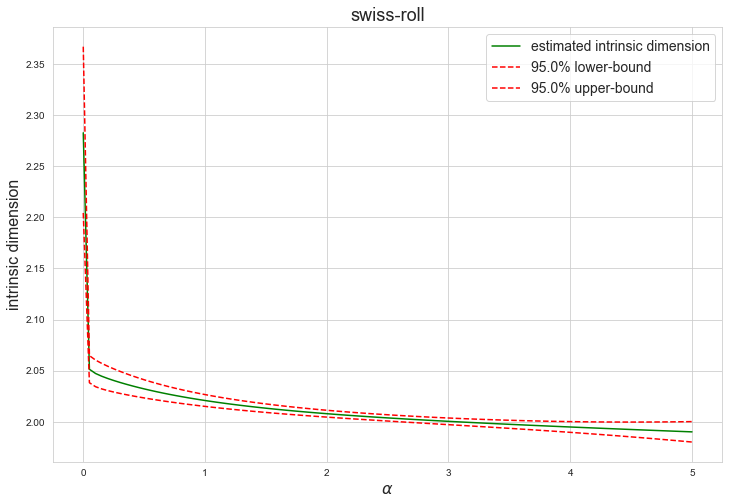

In [262]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator_swiss_roll, 'swiss-roll', alphas)

#### [▲](#content) 3.2.10.3 Двумерное многообразие, std=0.1 <a class="anchor" id="3.2.10.3-Swiss-roll-std-0.1"></a>

In [283]:
msts_swiss_roll = list()
gen = SampleDataGenerator()
for index, size in enumerate(tqdm(sample_sizes)):
    data = gen.swiss_roll(size=size) + noise[index][2]
    mst = MstBuilder(data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_swiss_roll.append(mst)

100%|█████████████████████████████████████████████████████| 20/20 [06:46<00:00, 20.33s/it]


In [ ]:
fig = go.Figure(
    data=[go.Scatter3d(
        x=data[:, 0], 
        y=data[:, 1], 
        z=data[:, 2],
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text="\"Swiss-roll, std=0.1\"")
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [285]:
estimator_swiss_roll = SchweinhartIntrinsicDimensionEstimator(msts_swiss_roll, sample_sizes)

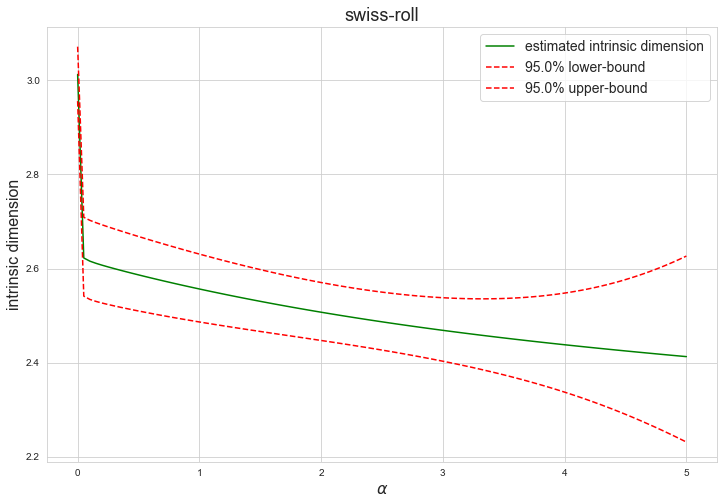

In [286]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator_swiss_roll, 'swiss-roll', alphas)

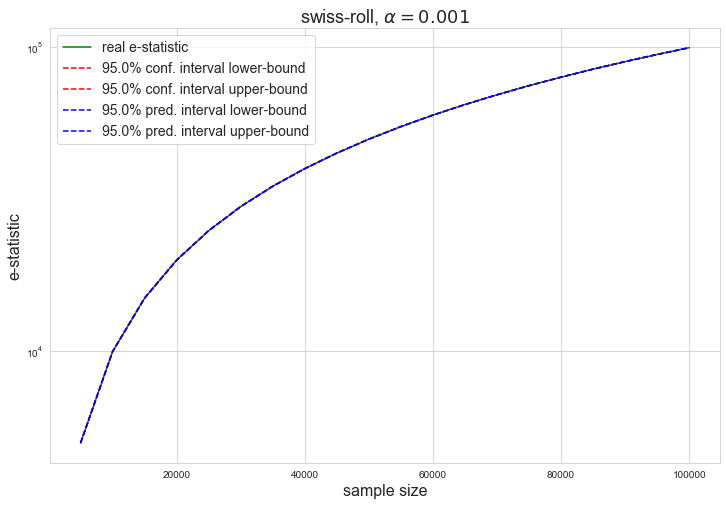

In [287]:
plot_regression_curve(estimator_swiss_roll, alphas.min(), rf'swiss-roll, $\alpha={alphas.min()}$')

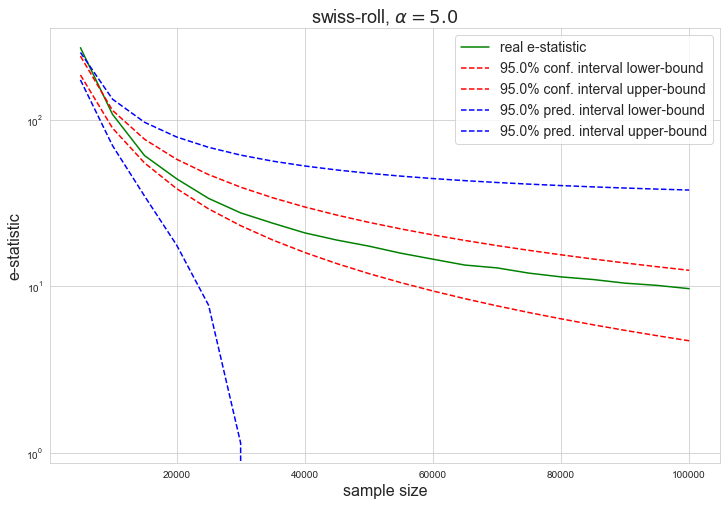

In [290]:
plot_regression_curve(estimator_swiss_roll, alphas.max(), rf'swiss-roll, $\alpha={alphas.max()}$')

#### [▲](#content) 3.2.10.4 Двумерное многообразие, std=1 <a class="anchor" id="3.2.10.4-Swiss-roll-std-1"></a>

In [272]:
msts_swiss_roll = list()
gen = SampleDataGenerator()
for index, size in enumerate(tqdm(sample_sizes)):
    data = gen.swiss_roll(size=size) + noise[index][3]
    mst = MstBuilder(data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_swiss_roll.append(mst)

100%|█████████████████████████████████████████████████████| 20/20 [06:25<00:00, 19.28s/it]


In [ ]:
fig = go.Figure(
    data=[go.Scatter3d(
        x=data[:, 0], 
        y=data[:, 1], 
        z=data[:, 2],
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text="\"Swiss-roll, std=1\"")
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [274]:
estimator_swiss_roll = SchweinhartIntrinsicDimensionEstimator(msts_swiss_roll, sample_sizes)

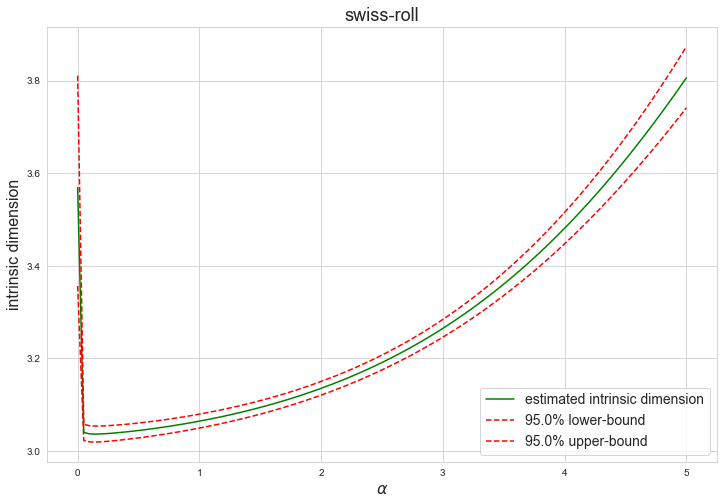

In [280]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator_swiss_roll, 'swiss-roll', alphas)

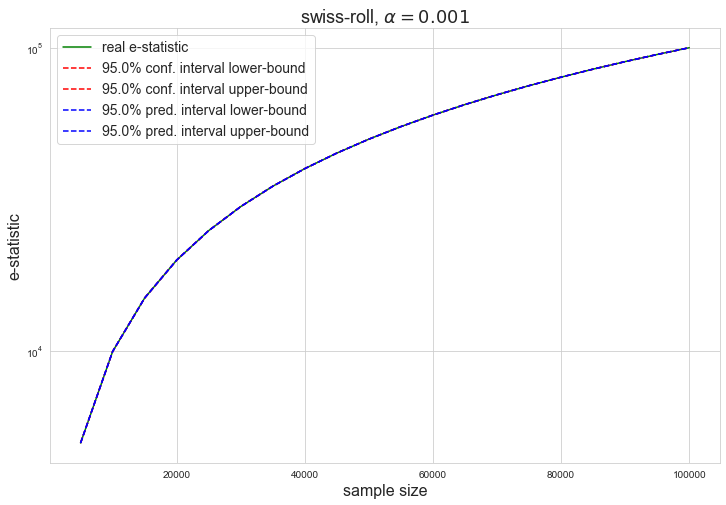

In [281]:
plot_regression_curve(estimator_swiss_roll, alphas.min(), rf'swiss-roll, $\alpha={alphas.min()}$')

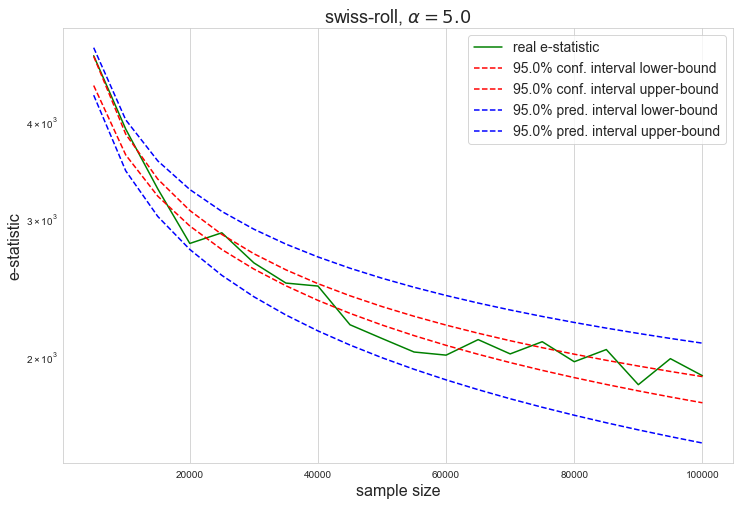

In [282]:
plot_regression_curve(estimator_swiss_roll, alphas.max(), rf'swiss-roll, $\alpha={alphas.max()}$')

#### [▲](#content) 3.2.10.5 Двумерное многообразие, зашумлённое пространство <a class="anchor" id="3.2.10.5-Swiss-roll-clean-noise"></a>

**5% точек - шум**

In [302]:
msts_swiss_roll = list()
gen = SampleDataGenerator()
for index, size in enumerate(tqdm(sample_sizes)):
    data = gen.swiss_roll(size=size)
    data = np.vstack((
        data, 
        np.random.uniform(data.min(), data.max(), (int(0.05 * data.shape[0]), data.shape[1]))
    ))
    mst = MstBuilder(data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_swiss_roll.append(mst)

100%|█████████████████████████████████████████████████████| 20/20 [06:54<00:00, 20.70s/it]


In [ ]:
fig = go.Figure(
    data=[go.Scatter3d(
        x=data[:, 0], 
        y=data[:, 1], 
        z=data[:, 2],
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text="\"Swiss-roll, noise-0.05\"")
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [307]:
estimator_swiss_roll = SchweinhartIntrinsicDimensionEstimator(msts_swiss_roll, sample_sizes)

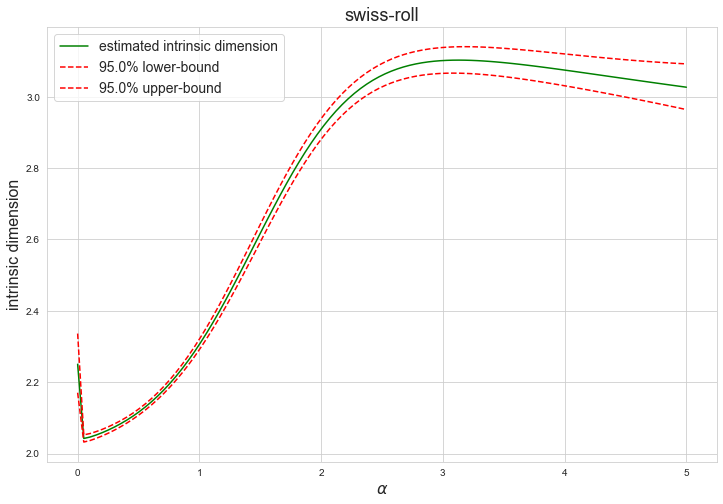

In [308]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator_swiss_roll, 'swiss-roll', alphas)

**20% точек - шум**

In [295]:
msts_swiss_roll = list()
gen = SampleDataGenerator()
for index, size in enumerate(tqdm(sample_sizes)):
    data = gen.swiss_roll(size=size)
    data = np.vstack((
        data, 
        np.random.uniform(data.min(), data.max(), (int(0.2 * data.shape[0]), data.shape[1]))
    ))
    mst = MstBuilder(data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_swiss_roll.append(mst)

100%|█████████████████████████████████████████████████████| 20/20 [08:02<00:00, 24.10s/it]


In [ ]:
fig = go.Figure(
    data=[go.Scatter3d(
        x=data[:, 0], 
        y=data[:, 1], 
        z=data[:, 2],
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text="\"Swiss-roll, noise-0.2\"")
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [297]:
estimator_swiss_roll = SchweinhartIntrinsicDimensionEstimator(msts_swiss_roll, sample_sizes)

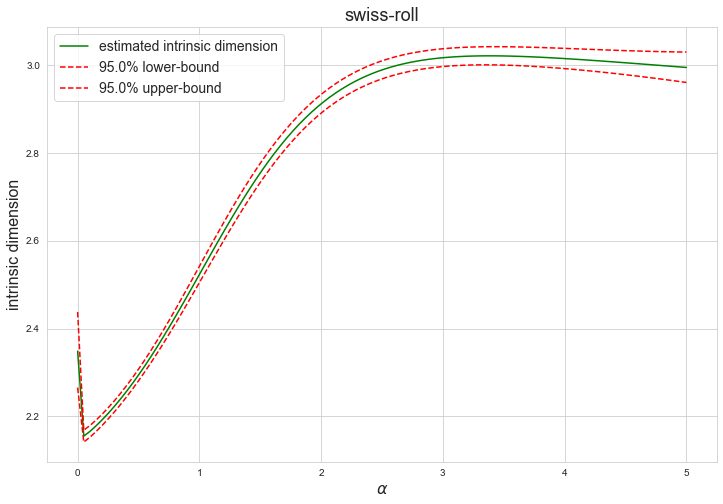

In [298]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator_swiss_roll, 'swiss-roll', alphas)

#### [▲](#content) 3.2.10.6 Фрактал, std=0.001 <a class="anchor" id="3.2.10.6-Sierpinsky-std-0.001"></a>

In [314]:
sample_sizes = np.arange(500, 10001, 500)
noise_stds = np.array([0.001, 0.01, 0.1, 1])
noise = [np.array(list(map(lambda std: np.random.normal(0, std, (size, 2)), noise_stds))) for size in sample_sizes]

In [315]:
msts_sierpinski = list()
gen = SampleDataGenerator(False, False)
for index, size in enumerate(tqdm(sample_sizes)):
    data = gen.sierpinski_triangle(size=size) + noise[index][0]
    mst = MstBuilder(data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_sierpinski.append(mst)

100%|█████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.05it/s]


In [ ]:
fig = go.Figure(
    data=[go.Scatter(
        x=data[:, 0], 
        y=data[:, 1], 
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text="\"Sierpinski triangle, std=0.001\"")
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [319]:
estimator_sierpinski = SchweinhartIntrinsicDimensionEstimator(msts_sierpinski, sample_sizes)

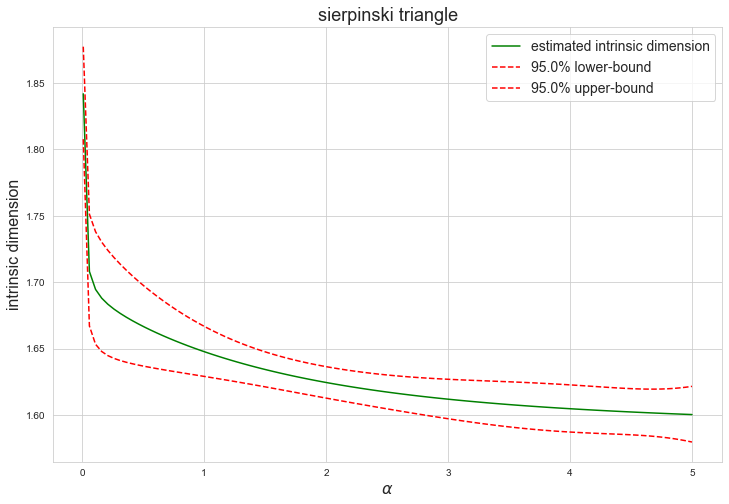

In [322]:
alphas = np.linspace(0.01, 5, 100)
plot_estimation_curve(estimator_sierpinski, 'sierpinski triangle', alphas)

#### [▲](#content) 3.2.10.7 Фрактал, std=0.01 <a class="anchor" id="3.2.10.7-Sierpinsky-std-0.01"></a>

In [323]:
msts_sierpinski = list()
gen = SampleDataGenerator(False, False)
for index, size in enumerate(tqdm(sample_sizes)):
    data = gen.sierpinski_triangle(size=size) + noise[index][1]
    mst = MstBuilder(data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_sierpinski.append(mst)

100%|█████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]


In [ ]:
fig = go.Figure(
    data=[go.Scatter(
        x=data[:, 0], 
        y=data[:, 1], 
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text="\"Sierpinski triangle, std=0.01\"")
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [328]:
estimator_sierpinski = SchweinhartIntrinsicDimensionEstimator(msts_sierpinski, sample_sizes)

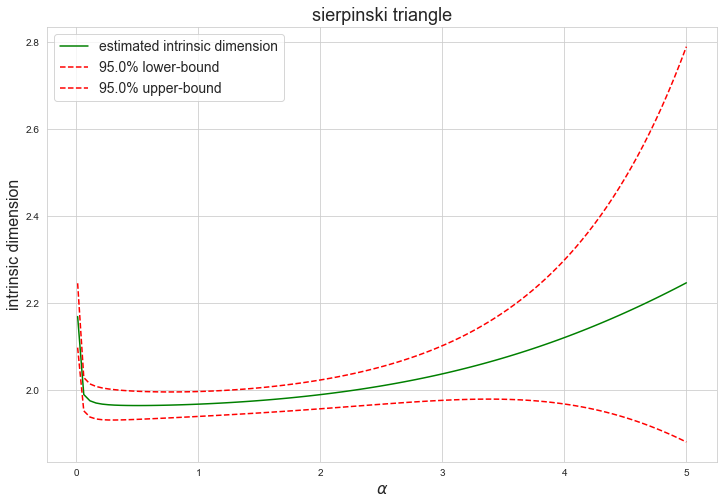

In [331]:
alphas = np.linspace(0.01, 5, 100)
plot_estimation_curve(estimator_sierpinski, 'sierpinski triangle', alphas)

#### [▲](#content) 3.2.10.8 Фрактал, зашумлённое пространство <a class="anchor" id="3.2.10.8-Sierpinsky-clean-noise"></a>

**5% точек - шум**

In [332]:
msts_sierpinski = list()
gen = SampleDataGenerator(False, False)
for index, size in enumerate(tqdm(sample_sizes)):
    data = gen.sierpinski_triangle(size=size)
    data = np.vstack((
        data, 
        np.random.uniform(data.min(), data.max(), (int(0.05 * data.shape[0]), data.shape[1]))
    ))
    mst = MstBuilder(data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_sierpinski.append(mst)

100%|█████████████████████████████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]


In [ ]:
fig = go.Figure(
    data=[go.Scatter(
        x=data[:, 0], 
        y=data[:, 1], 
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text="\"Sierpinski triangle, noise-0.05\"")
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [334]:
estimator_sierpinski = SchweinhartIntrinsicDimensionEstimator(msts_sierpinski, sample_sizes)

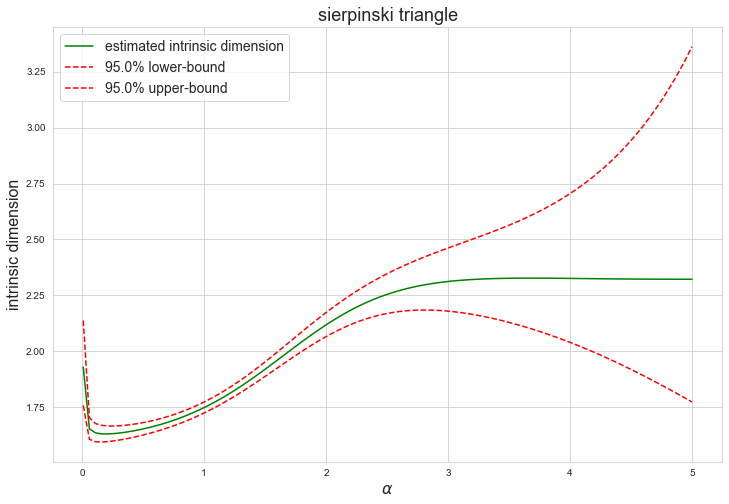

In [335]:
alphas = np.linspace(0.01, 5, 100)
plot_estimation_curve(estimator_sierpinski, 'sierpinski triangle', alphas)

**20% точек - шум**

In [337]:
msts_sierpinski = list()
gen = SampleDataGenerator(False, False)
for index, size in enumerate(tqdm(sample_sizes)):
    data = gen.sierpinski_triangle(size=size)
    data = np.vstack((
        data, 
        np.random.uniform(data.min(), data.max(), (int(0.2 * data.shape[0]), data.shape[1]))
    ))
    mst = MstBuilder(data.tolist()).build(
        workers_count=6, 
        distance_measure=DistanceMeasure.EUCLIDEAN
    )
    msts_sierpinski.append(mst)

100%|█████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.19s/it]


In [ ]:
fig = go.Figure(
    data=[go.Scatter(
        x=data[:, 0], 
        y=data[:, 1], 
        mode='markers',
        marker=dict(size=1)
    )],
    layout=go.Layout(
        title=go.layout.Title(text="\"Sierpinski triangle, noise-0.2\"")
    )
)
fig.update_layout(
    width=500,
    height=500
)
fig.show()

In [339]:
estimator_sierpinski = SchweinhartIntrinsicDimensionEstimator(msts_sierpinski, sample_sizes)

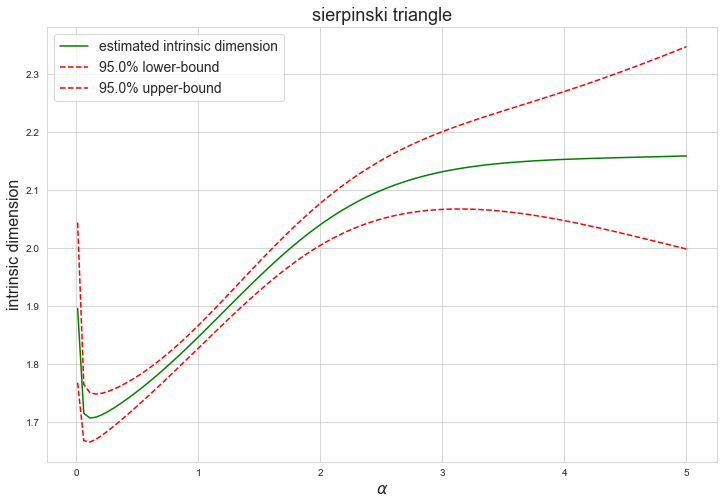

In [340]:
alphas = np.linspace(0.01, 5, 100)
plot_estimation_curve(estimator_sierpinski, 'sierpinski triangle', alphas)

# [▲](#content) 4 Размерность выборок SVD (2-8) биграмм русского языка <a class="anchor" id="4-SVD-Russian-uniform"></a>

In [14]:
candidate_dimensions = np.arange(2, 17)

## [▲](#content) 4.1 Литературный датасет <a class="anchor" id="4.1-literature"></a>

### [▲](#content) 4.1.1 BQY, KNN <a class="anchor" id="4.1.1-BQY-KNN"></a>

In [ ]:
# Работы по KNN приостановлены в связи с низкой робастностью.

### [▲](#content) 4.1.2 BQY, MST <a class="anchor" id="4.1.2-BQY-MST"></a>

In [3]:
precomputed_mst_files = sorted(Path('russian-svd-literature/mst-2-8').rglob('*.npy'))
sizes = np.fromiter(
    map(lambda path: np.int64(re.sub('batch_indexes_', '', re.sub('_mst.npy', '', path.name))), precomputed_mst_files),
    dtype=np.int64
)

In [7]:
mst_stats = np.zeros(sizes.size)
for index, mst_file in tqdm(enumerate(precomputed_mst_files), desc='Computing...', total=sizes.size):
    mst = SpanningForest.load(mst_file)
    mst_stats[index] = BqyIntrinsicDimensionEstimator.compute_mst_stat(mst)[0]
np.save('russian-svd-literature/saves/2-8-mst_stats.npy', mst_stats)

Computing...: 100%|███████████████████████████████████████| 88/88 [45:07<00:00, 30.77s/it]


In [8]:
np.save('russian-svd-literature/saves/2-8-mst_stats.npy', mst_stats)

In [10]:
mst_stats = np.load('russian-svd-literature/saves/2-8-mst_stats.npy')

#### [▲](#content) 4.1.2.1 Размер выборки для подсчёта статистики - 1000 <a class="anchor" id="4.1.2.1-1000"></a>

In [15]:
sample_size = 1000

In [16]:
# estimator = BqyIntrinsicDimensionEstimator(candidate_dimensions, sample_size=sample_size, workers_count=6)
# np.save(f'saves/mst-estimator-means-{sample_size}-2-17', estimator.candidate_dim_means)
# np.save(f'saves/mst-estimator-vars-{sample_size}-2-17', estimator.candidate_dim_vars)

In [17]:
mst_candidate_dim_means = np.load(f'saves/mst-estimator-means-{sample_size}-2-17.npy')
mst_candidate_dim_vars = np.load(f'saves/mst-estimator-vars-{sample_size}-2-17.npy')

estimator = BqyIntrinsicDimensionEstimator(
    candidate_dimensions, 
    mst_candidate_dim_means=mst_candidate_dim_means, mst_candidate_dim_vars=mst_candidate_dim_vars,
    stat_types=[BqyIntrinsicDimensionEstimator.StatType.MST]
)

In [18]:
estimated = np.zeros(sizes.size)

for index in tqdm(np.arange(estimated.size), desc='Estimating...'):
    try:
        estimated[index] = estimator.estimate_by_stat(
            mst_stats[index], sizes[index], estimator.StatType.MST, round_result=False)
    except AssertionError as _:
        continue

Estimating...: 100%|█████████████████████████████████████| 88/88 [00:00<00:00, 104.13it/s]


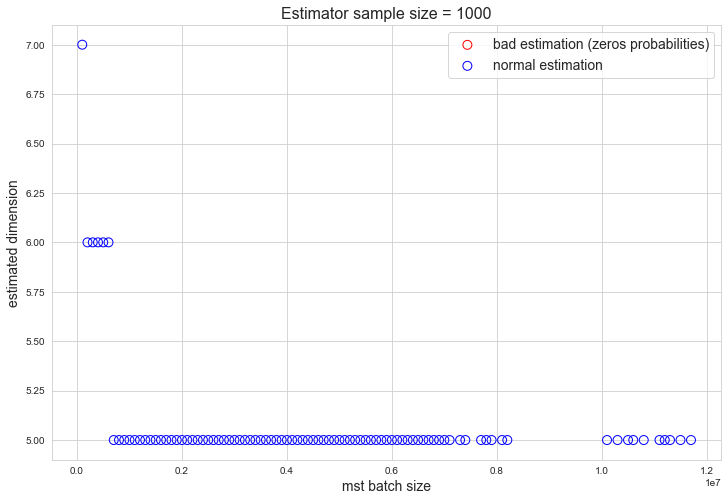

In [19]:
fig = plt.figure(figsize=(12, 8))

bad_indexes = estimated == 0

plt.scatter(sizes[bad_indexes], estimated[bad_indexes], s=80, facecolors='none', edgecolors='r', 
            label='bad estimation (zeros probabilities)')
plt.scatter(sizes[~bad_indexes], estimated[~bad_indexes], s=80, facecolors='none', edgecolors='b',
           label='normal estimation')

plt.xlabel('mst batch size', fontsize=14)
plt.ylabel('estimated dimension', fontsize=14)
plt.title(f'Estimator sample size = {sample_size}', fontsize=16)

plt.legend(fontsize=14)

plt.show()

#### [▲](#content) 4.1.2.2 Размер выборки для подсчёта статистики - 10000 <a class="anchor" id="4.1.2.2-10000"></a>

In [20]:
sample_size = 10000

In [21]:
# estimator = BqyIntrinsicDimensionEstimator(candidate_dimensions, sample_size=sample_size, workers_count=6)
# np.save(f'saves/mst-estimator-means-{sample_size}-2-17', estimator.candidate_dim_means)
# np.save(f'saves/mst-estimator-vars-{sample_size}-2-17', estimator.candidate_dim_vars)

In [22]:
mst_candidate_dim_means = np.load(f'saves/mst-estimator-means-{sample_size}-2-17.npy')
mst_candidate_dim_vars = np.load(f'saves/mst-estimator-vars-{sample_size}-2-17.npy')

estimator = BqyIntrinsicDimensionEstimator(
    candidate_dimensions, 
    mst_candidate_dim_means=mst_candidate_dim_means, mst_candidate_dim_vars=mst_candidate_dim_vars,
    stat_types=[BqyIntrinsicDimensionEstimator.StatType.MST]
)

In [23]:
estimated = np.zeros(sizes.size)

for index in tqdm(np.arange(estimated.size), desc='Estimating...'):
    try:
        estimated[index] = estimator.estimate_by_stat(
            mst_stats[index], sizes[index], estimator.StatType.MST, round_result=False)
    except AssertionError as _:
        continue

Estimating...: 100%|█████████████████████████████████████| 88/88 [00:00<00:00, 105.62it/s]


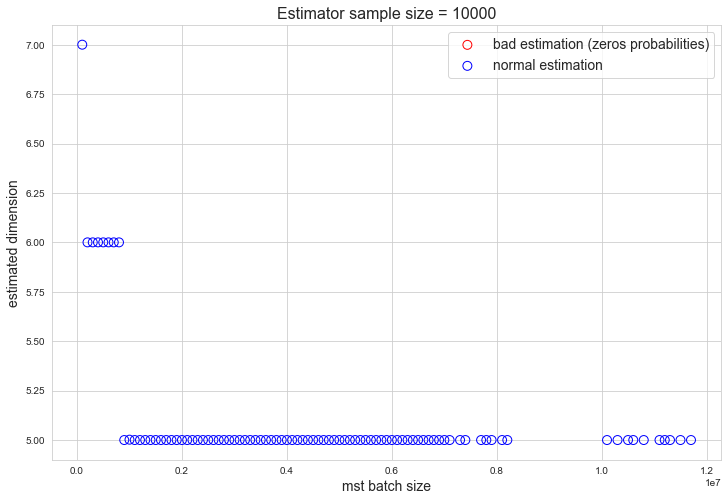

In [24]:
fig = plt.figure(figsize=(12, 8))

bad_indexes = estimated == 0

plt.scatter(sizes[bad_indexes], estimated[bad_indexes], s=80, facecolors='none', edgecolors='r', 
            label='bad estimation (zeros probabilities)')
plt.scatter(sizes[~bad_indexes], estimated[~bad_indexes], s=80, facecolors='none', edgecolors='b',
           label='normal estimation')

plt.xlabel('mst batch size', fontsize=14)
plt.ylabel('estimated dimension', fontsize=14)
plt.title(f'Estimator sample size = {sample_size}', fontsize=16)

plt.legend(fontsize=14)

plt.show()

#### [▲](#content) 4.1.2.3 Размер выборки для подсчёта статистики - 100000 <a class="anchor" id="4.1.2.3-100000"></a>

In [25]:
sample_size = 100000

In [26]:
# estimator = BqyIntrinsicDimensionEstimator(candidate_dimensions, sample_size=sample_size, workers_count=6)
# np.save(f'saves/mst-estimator-means-{sample_size}-2-17', estimator.candidate_dim_means)
# np.save(f'saves/mst-estimator-vars-{sample_size}-2-17', estimator.candidate_dim_vars)

In [27]:
mst_candidate_dim_means = np.load(f'saves/mst-estimator-means-{sample_size}-2-17.npy')
mst_candidate_dim_vars = np.load(f'saves/mst-estimator-vars-{sample_size}-2-17.npy')

estimator = BqyIntrinsicDimensionEstimator(
    candidate_dimensions, 
    mst_candidate_dim_means=mst_candidate_dim_means, mst_candidate_dim_vars=mst_candidate_dim_vars,
    stat_types=[BqyIntrinsicDimensionEstimator.StatType.MST]
)

In [28]:
estimated = np.zeros(sizes.size)

for index in tqdm(np.arange(estimated.size), desc='Estimating...'):
    try:
        estimated[index] = estimator.estimate_by_stat(
            mst_stats[index], sizes[index], estimator.StatType.MST, round_result=False)
    except AssertionError as _:
        continue

Estimating...: 100%|█████████████████████████████████████| 88/88 [00:00<00:00, 102.03it/s]


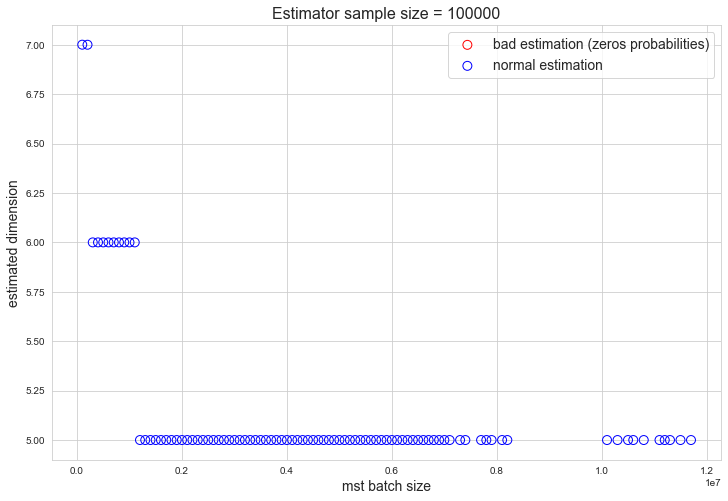

In [29]:
fig = plt.figure(figsize=(12, 8))

bad_indexes = estimated == 0

plt.scatter(sizes[bad_indexes], estimated[bad_indexes], s=80, facecolors='none', edgecolors='r', 
            label='bad estimation (zeros probabilities)')
plt.scatter(sizes[~bad_indexes], estimated[~bad_indexes], s=80, facecolors='none', edgecolors='b',
           label='normal estimation')

plt.xlabel('mst batch size', fontsize=14)
plt.ylabel('estimated dimension', fontsize=14)
plt.title(f'Estimator sample size = {sample_size}', fontsize=16)

plt.legend(fontsize=14)

plt.show()

#### [▲](#content) 4.1.2.4 Размер выборки для подсчёта статистики - 1000000 <a class="anchor" id="4.1.2.4-1000000"></a>

In [30]:
sample_size = 1000000

In [31]:
# estimator = BqyIntrinsicDimensionEstimator(candidate_dimensions, sample_size=sample_size, workers_count=6)
# np.save(f'saves/mst-estimator-means-{sample_size}-2-17', estimator.candidate_dim_means)
# np.save(f'saves/mst-estimator-vars-{sample_size}-2-17', estimator.candidate_dim_vars)

In [32]:
mst_candidate_dim_means = np.load(f'saves/mst-estimator-means-{sample_size}-2-17.npy')
mst_candidate_dim_vars = np.load(f'saves/mst-estimator-vars-{sample_size}-2-17.npy')

estimator = BqyIntrinsicDimensionEstimator(
    candidate_dimensions, 
    mst_candidate_dim_means=mst_candidate_dim_means, mst_candidate_dim_vars=mst_candidate_dim_vars,
    stat_types=[BqyIntrinsicDimensionEstimator.StatType.MST]
)

In [33]:
estimated = np.zeros(sizes.size)

for index in tqdm(np.arange(estimated.size), desc='Estimating...'):
    try:
        estimated[index] = estimator.estimate_by_stat(
            mst_stats[index], sizes[index], estimator.StatType.MST, round_result=False)
    except AssertionError as _:
        continue

Estimating...: 100%|█████████████████████████████████████| 88/88 [00:00<00:00, 102.87it/s]


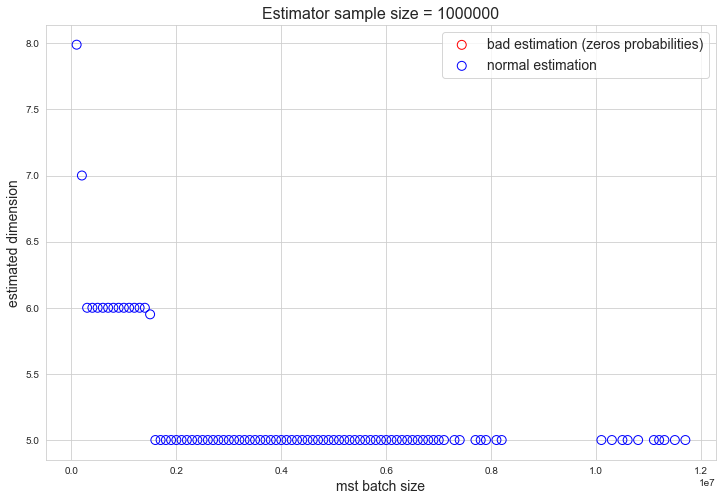

In [34]:
fig = plt.figure(figsize=(12, 8))

bad_indexes = estimated == 0

plt.scatter(sizes[bad_indexes], estimated[bad_indexes], s=80, facecolors='none', edgecolors='r', 
            label='bad estimation (zeros probabilities)')
plt.scatter(sizes[~bad_indexes], estimated[~bad_indexes], s=80, facecolors='none', edgecolors='b',
           label='normal estimation')

plt.xlabel('mst batch size', fontsize=14)
plt.ylabel('estimated dimension', fontsize=14)
plt.title(f'Estimator sample size = {sample_size}', fontsize=16)

plt.legend(fontsize=14)

plt.show()

### [▲](#content) 4.1.3 BQY, SOI <a class="anchor" id="4.1.3-BQY-SOI"></a>

#### [▲](#content) 4.1.3.1 Размер выборки для подсчёта статистики - 1000 <a class="anchor" id="4.1.3.1-1000"></a>

In [ ]:
# Для будущих исследований.

#### [▲](#content) 4.1.3.2 Размер выборки для подсчёта статистики - 10000 <a class="anchor" id="4.1.3.2-10000"></a>

In [ ]:
# Для будущих исследований.

#### [▲](#content) 4.1.3.3 Размер выборки для подсчёта статистики - 100000 <a class="anchor" id="4.1.3.2-10000"></a>

In [ ]:
# Для будущих исследований.

#### [▲](#content) 4.1.3.4 Размер выборки для подсчёта статистики - 1000000 <a class="anchor" id="4.1.3.2-10000"></a>

In [ ]:
# Для будущих исследований.

### [▲](#content) 4.1.4 Schweinhart <a class="anchor" id="4.1.4-Schweinhart"></a>

In [36]:
msts_edges_weights = list()
for index, mst_file in tqdm(enumerate(precomputed_mst_files), desc='Extracting weights of edges...'):
    mst = SpanningForest.load(mst_file)
    msts_edges_weights.append(SchweinhartIntrinsicDimensionEstimator.get_mst_weights(mst))

Extracting weights of edges...: 88it [43:48, 29.87s/it]


In [37]:
np.save('russian-svd-literature/saves/2-8-mst-edges-weights.npy', msts_edges_weights)

In [38]:
msts_edges_weights = np.load('russian-svd-literature/saves/2-8-mst-edges-weights.npy', allow_pickle=True)

In [43]:
estimator = SchweinhartIntrinsicDimensionEstimator(
    [None] * len(precomputed_mst_files), 
    sizes,
    msts_edges_weights=msts_edges_weights, 
    save_stats=False
)

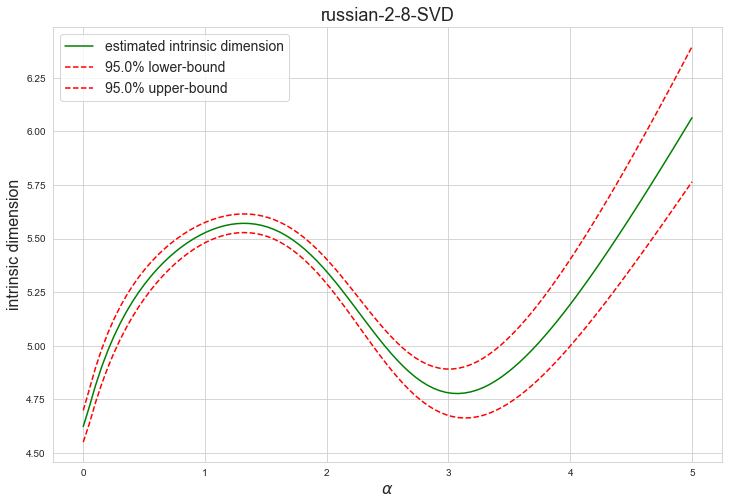

In [44]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator, 'russian-2-8-SVD', alphas)

Проверка значимости по гистограмме:

In [45]:
from numba import njit

@njit
def get_exp_bins(selection, bins_count):
    R = (selection.max() / selection.min()) ** (1 / bins_count)
    c = selection.min() / R
    linspace = np.arange(bins_count) * ((bins_count) / (bins_count - 1)) + 1
    bins = c * R ** linspace
    return bins

In [46]:
data = np.load('russian-svd-literature/saves/2-8-mst-edges-weights.npy', allow_pickle=True)[-1]

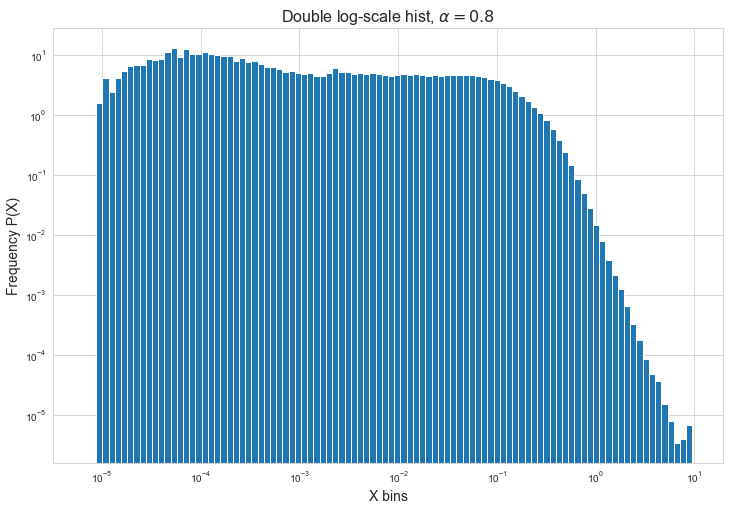

In [54]:
ALPHA = 0.8
x = data ** ALPHA

exp_bins_count = 100
x_exp_bins = get_exp_bins(x, exp_bins_count)

pdf = np.array([np.sum([(x >= bin_start) & (x < bin_end)]) for bin_start, bin_end in zip(x_exp_bins[:-1], x_exp_bins[1:])]) / x.shape[0]
pdf_exp = pdf / (x_exp_bins[1:] - x_exp_bins[:-1])

plt.figure(figsize=(12, 8))
plt.hist(x_exp_bins[:-1], x_exp_bins[1:], weights=pdf_exp)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('X bins', fontsize=14)
plt.ylabel('Frequency P(X)', fontsize=14)
plt.title(rf"Double log-scale hist, $\alpha={ALPHA}$", fontsize=16)

plt.show()

## [▲](#content) 4.2 Датасет с большим количеством лирики <a class="anchor" id="4.2-lyrics"></a>

### [▲](#content) 4.2.1 BQY, KNN <a class="anchor" id="4.2.1-BQY-KNN"></a>

In [ ]:
# Работы по KNN приостановлены в связи с низкой робастностью.

### [▲](#content) 4.2.2 BQY, MST <a class="anchor" id="4.2.2-BQY-MST"></a>

In [147]:
precomputed_mst_files = sorted(Path('russian-svd-lyrics/mst').rglob('*.npy'))
sizes = np.fromiter(
    map(lambda path: np.int64(re.sub('batch_', '', re.sub('_mst.npy', '', path.name))), precomputed_mst_files),
    dtype=np.int64
)

In [148]:
# mst_stats = np.zeros(sizes.size)
# for index, mst_file in tqdm(enumerate(precomputed_mst_files), desc='Computing...', total=sizes.size):
#     mst = SpanningForest.load(mst_file)
#     mst_stats[index] = BqyIntrinsicDimensionEstimator.compute_mst_stat(mst)[0]
# np.save('saves/mst_stats', mst_stats)

In [149]:
mst_stats = np.load('russian-svd-lyrics/saves/mst_stats.npy')

#### [▲](#content) 4.2.2.1 Размер выборки для подсчёта статистики - 1000 <a class="anchor" id="4.2.2.1-1000"></a>

In [150]:
sample_size = 1000

In [151]:
# estimator = BqyIntrinsicDimensionEstimator(candidate_dimensions, sample_size=sample_size, workers_count=6)
# np.save(f'saves/mst-estimator-means-{sample_size}-2-17', estimator.candidate_dim_means)
# np.save(f'saves/mst-estimator-vars-{sample_size}-2-17', estimator.candidate_dim_vars)

In [152]:
mst_candidate_dim_means = np.load(f'saves/mst-estimator-means-{sample_size}-2-17.npy')
mst_candidate_dim_vars = np.load(f'saves/mst-estimator-vars-{sample_size}-2-17.npy')

estimator = BqyIntrinsicDimensionEstimator(
    candidate_dimensions, 
    mst_candidate_dim_means=mst_candidate_dim_means, mst_candidate_dim_vars=mst_candidate_dim_vars,
    stat_types=[BqyIntrinsicDimensionEstimator.StatType.MST]
)

In [153]:
estimated = np.zeros(sizes.size)

for index in tqdm(np.arange(estimated.size), desc='Estimating...'):
    try:
        estimated[index] = estimator.estimate_by_stat(
            mst_stats[index], sizes[index], estimator.StatType.MST, round_result=False)
    except AssertionError as _:
        continue

Estimating...: 100%|█████████████████████████████████| 1260/1260 [00:11<00:00, 106.02it/s]


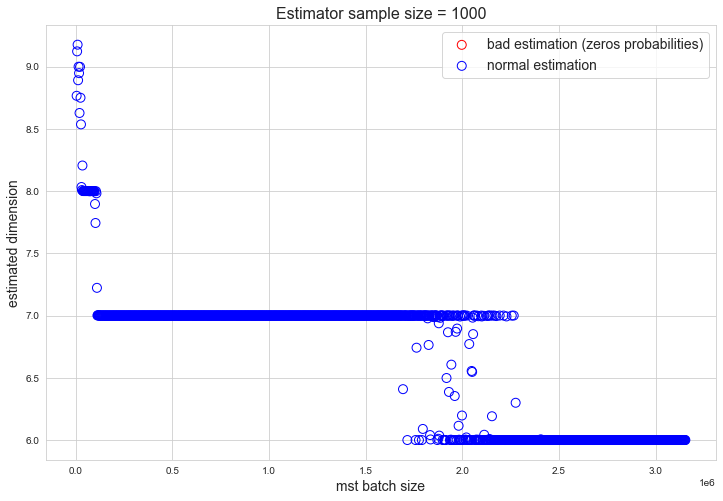

In [154]:
fig = plt.figure(figsize=(12, 8))

bad_indexes = estimated == 0

plt.scatter(sizes[bad_indexes], estimated[bad_indexes], s=80, facecolors='none', edgecolors='r', 
            label='bad estimation (zeros probabilities)')
plt.scatter(sizes[~bad_indexes], estimated[~bad_indexes], s=80, facecolors='none', edgecolors='b',
           label='normal estimation')

plt.xlabel('mst batch size', fontsize=14)
plt.ylabel('estimated dimension', fontsize=14)
plt.title(f'Estimator sample size = {sample_size}', fontsize=16)

plt.legend(fontsize=14)

plt.show()

#### [▲](#content) 4.2.2.2 Размер выборки для подсчёта статистики - 10000 <a class="anchor" id="4.2.2.2-10000"></a>

In [155]:
sample_size = 10000

In [156]:
# estimator = BqyIntrinsicDimensionEstimator(candidate_dimensions, sample_size=sample_size, workers_count=6)
# np.save(f'saves/mst-estimator-means-{sample_size}-2-17', estimator.candidate_dim_means)
# np.save(f'saves/mst-estimator-vars-{sample_size}-2-17', estimator.candidate_dim_vars)

In [157]:
mst_candidate_dim_means = np.load(f'saves/mst-estimator-means-{sample_size}-2-17.npy')
mst_candidate_dim_vars = np.load(f'saves/mst-estimator-vars-{sample_size}-2-17.npy')

estimator = BqyIntrinsicDimensionEstimator(
    candidate_dimensions, 
    mst_candidate_dim_means=mst_candidate_dim_means, mst_candidate_dim_vars=mst_candidate_dim_vars,
    stat_types=[BqyIntrinsicDimensionEstimator.StatType.MST]
)

In [158]:
estimated = np.zeros(sizes.size)

for index in tqdm(np.arange(estimated.size), desc='Estimating...'):
    try:
        estimated[index] = estimator.estimate_by_stat(
            mst_stats[index], sizes[index], estimator.StatType.MST, round_result=False)
    except AssertionError as _:
        continue

Estimating...: 100%|█████████████████████████████████| 1260/1260 [00:11<00:00, 108.20it/s]


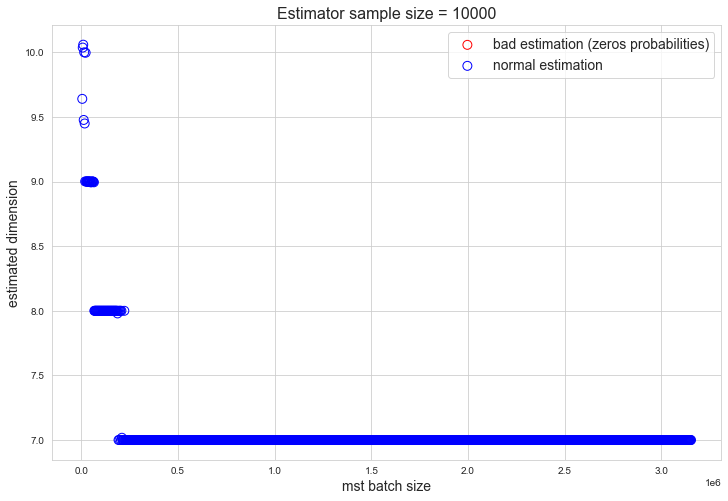

In [159]:
fig = plt.figure(figsize=(12, 8))

bad_indexes = estimated == 0

plt.scatter(sizes[bad_indexes], estimated[bad_indexes], s=80, facecolors='none', edgecolors='r', 
            label='bad estimation (zeros probabilities)')
plt.scatter(sizes[~bad_indexes], estimated[~bad_indexes], s=80, facecolors='none', edgecolors='b',
           label='normal estimation')

plt.xlabel('mst batch size', fontsize=14)
plt.ylabel('estimated dimension', fontsize=14)
plt.title(f'Estimator sample size = {sample_size}', fontsize=16)

plt.legend(fontsize=14)

plt.show()

#### [▲](#content) 4.2.2.3 Размер выборки для подсчёта статистики - 100000 <a class="anchor" id="4.2.2.3-100000"></a>

In [160]:
sample_size = 100000

In [161]:
# estimator = BqyIntrinsicDimensionEstimator(candidate_dimensions, sample_size=sample_size, samples_count=25, 
#                                         workers_count=6)
# np.save(f'saves/mst-estimator-means-{sample_size}-2-17', estimator.candidate_dim_means)
# np.save(f'saves/mst-estimator-vars-{sample_size}-2-17', estimator.candidate_dim_vars)

In [162]:
mst_candidate_dim_means = np.load(f'saves/mst-estimator-means-{sample_size}-2-17.npy')
mst_candidate_dim_vars = np.load(f'saves/mst-estimator-vars-{sample_size}-2-17.npy')

estimator = BqyIntrinsicDimensionEstimator(
    candidate_dimensions, 
    mst_candidate_dim_means=mst_candidate_dim_means, mst_candidate_dim_vars=mst_candidate_dim_vars,
    stat_types=[BqyIntrinsicDimensionEstimator.StatType.MST]
)

In [163]:
estimated = np.zeros(sizes.size)

for index in tqdm(np.arange(estimated.size), desc='Estimating...'):
    try:
        estimated[index] = estimator.estimate_by_stat(
            mst_stats[index], sizes[index], estimator.StatType.MST, round_result=False)
    except AssertionError as _:
        continue

Estimating...: 100%|█████████████████████████████████| 1260/1260 [00:11<00:00, 107.70it/s]


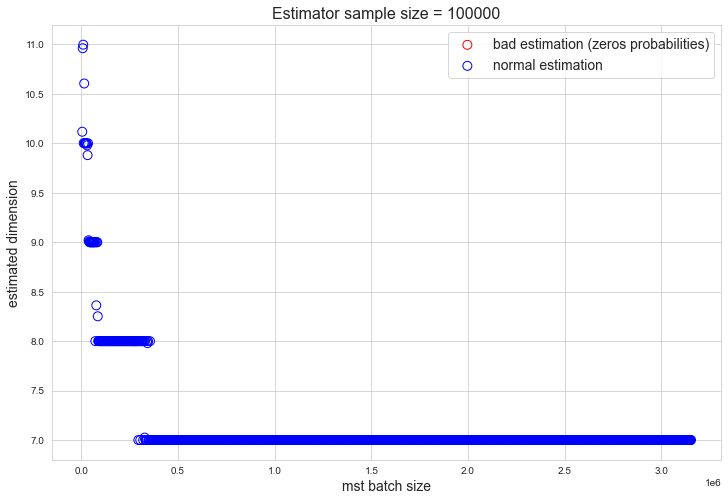

In [164]:
fig = plt.figure(figsize=(12, 8))

bad_indexes = estimated == 0

plt.scatter(sizes[bad_indexes], estimated[bad_indexes], s=80, facecolors='none', edgecolors='r', 
            label='bad estimation (zeros probabilities)')
plt.scatter(sizes[~bad_indexes], estimated[~bad_indexes], s=80, facecolors='none', edgecolors='b',
           label='normal estimation')

plt.xlabel('mst batch size', fontsize=14)
plt.ylabel('estimated dimension', fontsize=14)
plt.title(f'Estimator sample size = {sample_size}', fontsize=16)

plt.legend(fontsize=14)

plt.show()

#### [▲](#content) 4.2.2.4 Размер выборки для подсчёта статистики - 1000000 <a class="anchor" id="4.2.2.4-1000000"></a>

In [165]:
sample_size = 1000000

In [166]:
# estimator = BqyIntrinsicDimensionEstimator(candidate_dimensions, sample_size=sample_size, samples_count=25, 
#                                         workers_count=6)
# np.save(f'saves/mst-estimator-means-{sample_size}-2-17', estimator.candidate_dim_means)
# np.save(f'saves/mst-estimator-vars-{sample_size}-2-17', estimator.candidate_dim_vars)

In [167]:
mst_candidate_dim_means = np.load(f'saves/mst-estimator-means-{sample_size}-2-17.npy')
mst_candidate_dim_vars = np.load(f'saves/mst-estimator-vars-{sample_size}-2-17.npy')

estimator = BqyIntrinsicDimensionEstimator(
    candidate_dimensions, 
    mst_candidate_dim_means=mst_candidate_dim_means, mst_candidate_dim_vars=mst_candidate_dim_vars,
    stat_types=[BqyIntrinsicDimensionEstimator.StatType.MST]
)

In [168]:
estimated = np.zeros(sizes.size)

for index in tqdm(np.arange(estimated.size), desc='Estimating...'):
    try:
        estimated[index] = estimator.estimate_by_stat(
            mst_stats[index], sizes[index], estimator.StatType.MST, round_result=False)
    except AssertionError as _:
        continue

Estimating...: 100%|█████████████████████████████████| 1260/1260 [00:11<00:00, 106.42it/s]


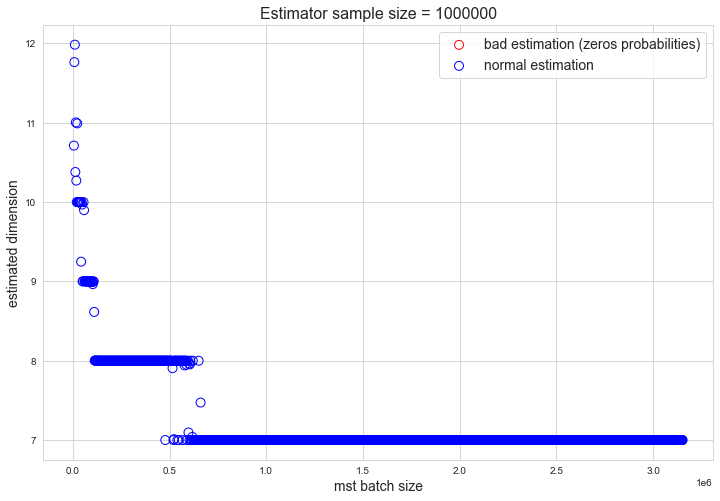

In [169]:
fig = plt.figure(figsize=(12, 8))

bad_indexes = estimated == 0

plt.scatter(sizes[bad_indexes], estimated[bad_indexes], s=80, facecolors='none', edgecolors='r', 
            label='bad estimation (zeros probabilities)')
plt.scatter(sizes[~bad_indexes], estimated[~bad_indexes], s=80, facecolors='none', edgecolors='b',
           label='normal estimation')

plt.xlabel('mst batch size', fontsize=14)
plt.ylabel('estimated dimension', fontsize=14)
plt.title(f'Estimator sample size = {sample_size}', fontsize=16)

plt.legend(fontsize=14)

plt.show()

### [▲](#content) 4.2.3 BQY, SOI <a class="anchor" id="4.2.3-BQY-SOI"></a>

#### [▲](#content) 4.2.3.1 Размер выборки для подсчёта статистики - 1000 <a class="anchor" id="4.2.3.1-1000"></a>

In [ ]:
# Для будущих исследований.

#### [▲](#content) 4.2.3.2 Размер выборки для подсчёта статистики - 10000 <a class="anchor" id="4.2.3.2-10000"></a>

In [ ]:
# Для будущих исследований.

#### [▲](#content) 4.2.3.3 Размер выборки для подсчёта статистики - 100000 <a class="anchor" id="4.2.3.3-100000"></a>

In [ ]:
# Для будущих исследований.

#### [▲](#content) 4.2.3.4 Размер выборки для подсчёта статистики - 10000 <a class="anchor" id="4.1.3.2-10000"></a>

In [ ]:
# Для будущих исследований.

### [▲](#content) 4.2.4 Schweinhart <a class="anchor" id="4.2.4-Schweinhart"></a>

In [6]:
precomputed_mst_files = sorted(Path('mst').rglob('*.npy'))
sizes = np.fromiter(
    map(lambda path: np.int64(re.sub('batch_', '', re.sub('_mst.npy', '', path.name))), precomputed_mst_files),
    dtype=np.int64
)

In [8]:
# msts_edges_weights = list()
# for index, mst_file in tqdm(enumerate(precomputed_mst_files), desc='Extracting weights of edges...'):
#     mst = SpanningForest.load(mst_file)
#     msts_edges_weights.append(SchweinhartIntrinsicDimensionEstimator.get_mst_weights(mst))

In [9]:
# np.save('mst_edges_weights.npy', msts_edges_weights)

In [7]:
msts_edges_weights = np.load('saves/mst_edges_weights.npy', allow_pickle=True)

In [8]:
estimator = SchweinhartIntrinsicDimensionEstimator(
    [None] * 1260, 
    sizes,
    msts_edges_weights=msts_edges_weights, 
    save_stats=False
)

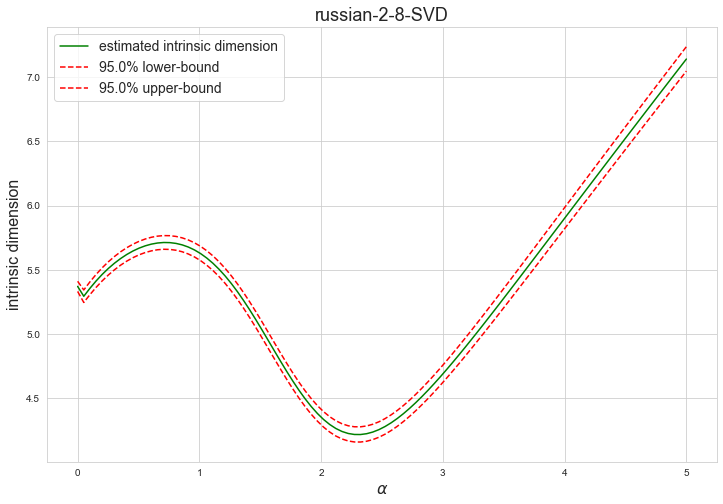

In [9]:
alphas = np.linspace(0.001, 5, 100)
plot_estimation_curve(estimator, 'russian-2-8-SVD', alphas)

Проверка значимости по гистограмме:

In [2]:
from numba import njit

@njit
def get_exp_bins(selection, bins_count):
    R = (selection.max() / selection.min()) ** (1 / bins_count)
    c = selection.min() / R
    linspace = np.arange(bins_count) * ((bins_count) / (bins_count - 1)) + 1
    bins = c * R ** linspace
    return bins

In [3]:
data = np.load('saves/[8D unit-sphere in 27D observable space]-mst_weights.npy', allow_pickle=True)

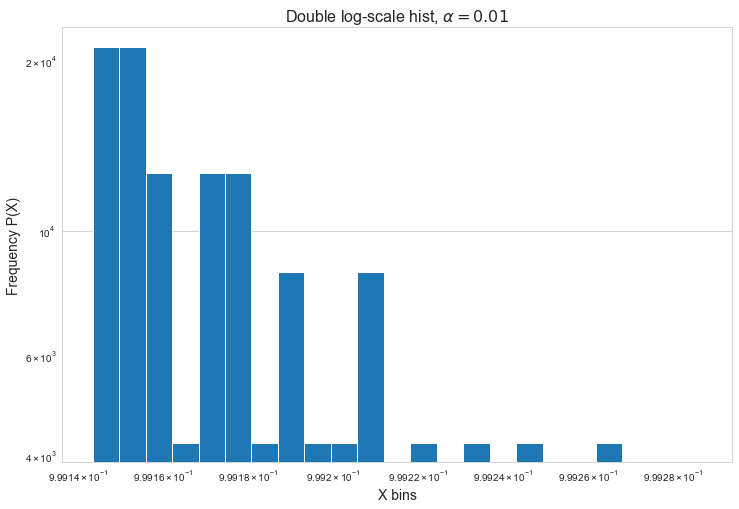

In [5]:
ALPHA = 0.01
agregate = np.vectorize(lambda i: np.log(np.sum(i ** ALPHA)) / np.log(i.size + 1))
x = agregate(data)

exp_bins_count = 25
x_exp_bins = get_exp_bins(x, exp_bins_count)

pdf = np.array([np.sum([(x >= bin_start) & (x < bin_end)]) for bin_start, bin_end in zip(x_exp_bins[:-1], x_exp_bins[1:])]) / x.shape[0]
pdf_exp = pdf / (x_exp_bins[1:] - x_exp_bins[:-1])

plt.figure(figsize=(12, 8))
plt.hist(x_exp_bins[:-1], x_exp_bins[1:], weights=pdf_exp)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('X bins', fontsize=14)
plt.ylabel('Frequency P(X)', fontsize=14)
plt.title(rf"Double log-scale hist, $\alpha={ALPHA}$", fontsize=16)

plt.show()